## **Data Prep**

In [2]:
import pandas as pd
import numpy as np
# database cos-miniLM
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1pD90XJBNH4I8Jkzrx9PdWA26-asGWBJRhahVSCHAPEk/export?format=csv&gid=0")
data

Unnamed: 0 Fakultas                      Jurusan  \
0               0     SITH                 Mikrobiologi   
1               1     SITH                 Mikrobiologi   
2               2     SITH                 Mikrobiologi   
3               3     SITH                 Mikrobiologi   
4               4     SITH                 Mikrobiologi   
...           ...      ...                          ...   
10460       10460      FTI  Manajemen Rekayasa Industri   
10461       10461      FTI  Manajemen Rekayasa Industri   
10462       10462      FTI  Manajemen Rekayasa Industri   
10463       10463      FTI  Manajemen Rekayasa Industri   
10464       10464      FTI  Manajemen Rekayasa Industri   

                                            Competencies  \
0                           Memecahkan Masalah Komplekss   
1                                        Berpikir Kritis   
2                           Inovasi dan/atau Kreatifitas   
3                          Manajemen Diri dan Orang Lain   
4                                            Bekerja Tim   
...                                                  ...   
10460           Kemampuan analisis dan Interpretasi Data   
10461  Kemampuan Administrasi, menuliskan laporan/ Do...   
10462          Kemampuan Menggunakan Teknologi Informasi   
10463  Merancang dan/atau mendesain suatu komponen, s...   
10464                             Kemampuan Bahasa Asing   

                                                      LO    dist  \
0      Every microbiology student have an ability to ...  0,2286   
1      Every microbiology student have an ability to ...  0,1659   
2      Every microbiology student have an ability to ...  0,0593   
3      Every microbiology student have an ability to ...  0,1186   
4      Every microbiology student have an ability to ...  0,1447   
...                                                  ...     ...   
10460  Every industrial engineering management studen...  0,2717   
10461  Every industrial engineering management studen...  0,2267   
10462  Every industrial engineering management studen...  0,2404   
10463  Every industrial engineering management studen...  0,1527   
10464  Every industrial engineering management studen...  0,1309   

      normalized_dist  
0              0,0758  
1               0,055  
2              0,0197  
3              0,0393  
4               0,048  
...               ...  
10460          0,0596  
10461          0,0497  
10462          0,0527  
10463          0,0335  
10464          0,0287  

[10465 rows x 7 columns]

In [3]:
data['Competencies'] = data['Competencies'].replace({'Memecahkan Masalah Komplekss': 'Memecahkan Masalah Kompleks'})
data['Jurusan'] = data['Jurusan'].replace({'Manajemen Rekayasa Industri': 'Manajemen Rekayasa'})

In [4]:
listprodi = data['Jurusan'].unique()
competencies = data["Competencies"].unique()

In [5]:
data['dist'] = data['dist'].str.replace(',', '.')
data['dist'] = pd.to_numeric(data['dist'])

data['normalized_dist'] = data['normalized_dist'].str.replace(',', '.')
data['normalized_dist'] = pd.to_numeric(data['normalized_dist'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10465 entries, 0 to 10464
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10465 non-null  int64  
 1   Fakultas         10465 non-null  object 
 2   Jurusan          10465 non-null  object 
 3   Competencies     10465 non-null  object 
 4   LO               10465 non-null  object 
 5   dist             10465 non-null  float64
 6   normalized_dist  10465 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 572.4+ KB


In [24]:
data.head()

Unnamed: 0 Fakultas       Jurusan                   Competencies  \
0           0     SITH  Mikrobiologi    Memecahkan Masalah Kompleks   
1           1     SITH  Mikrobiologi                Berpikir Kritis   
2           2     SITH  Mikrobiologi   Inovasi dan/atau Kreatifitas   
3           3     SITH  Mikrobiologi  Manajemen Diri dan Orang Lain   
4           4     SITH  Mikrobiologi                    Bekerja Tim   

                                                  LO    dist  normalized_dist  
0  Every microbiology student have an ability to ...  0.2286           0.0758  
1  Every microbiology student have an ability to ...  0.1659           0.0550  
2  Every microbiology student have an ability to ...  0.0593           0.0197  
3  Every microbiology student have an ability to ...  0.1186           0.0393  
4  Every microbiology student have an ability to ...  0.1447           0.0480

In [6]:
translate = {}
# https://docs.google.com/spreadsheets/d/1SlzxU-xPxfU5-sMbJpogpQEmXb4ntX-gi4kqCAcqh0o/edit?gid=0#gid=0
data_translate = pd.read_csv("https://docs.google.com/spreadsheets/d/1SlzxU-xPxfU5-sMbJpogpQEmXb4ntX-gi4kqCAcqh0o/export?format=csv&gid=0")
for i in range(len(data_translate)):
  row = data_translate.iloc[i]
  translate[row["Inggris"]] = row["Indo"]

In [7]:
translate

{'Every microbiology student have an ability to Understand the fundamentals of microbiology and its connections to mathematics and natural sciences.': 'Memahami dasar-dasar mikrobiologi dan keterkaitannya dengan matematika dan ilmu pengetahuan alam',
 'Every microbiology student have an ability to Recognize the connections between microbiology and big data analysis, artificial intelligence, and computational thinking.': 'Mengenal keterkaitan antara mikrobiologi dengan big data analysis, artificial intellegence, dan computational thinking',
 'Every microbiology student have an ability to Understand the evolution of prokaryotic cells, adaptation processes, resilience, diversity, and their impact on the environment.': 'Memahami evolusi pada sel prokariot, proses adaptasi, ketahanan dan diversitasnya, serta dampaknya bagi lingkungan',
 'Every microbiology student have an ability to Understand the structure and function of cells.': 'Memahami struktur dan fungsi pada sel',
 'Every microbiolo

In [12]:
data['LO'] = data['LO'].replace(translate)

In [13]:
data.head()

Unnamed: 0 Fakultas       Jurusan                   Competencies  \
0           0     SITH  Mikrobiologi    Memecahkan Masalah Kompleks   
1           1     SITH  Mikrobiologi                Berpikir Kritis   
2           2     SITH  Mikrobiologi   Inovasi dan/atau Kreatifitas   
3           3     SITH  Mikrobiologi  Manajemen Diri dan Orang Lain   
4           4     SITH  Mikrobiologi                    Bekerja Tim   

                                                  LO    dist  normalized_dist  
0  Memahami dasar-dasar mikrobiologi dan keterkai...  0.2286           0.0758  
1  Memahami dasar-dasar mikrobiologi dan keterkai...  0.1659           0.0550  
2  Memahami dasar-dasar mikrobiologi dan keterkai...  0.0593           0.0197  
3  Memahami dasar-dasar mikrobiologi dan keterkai...  0.1186           0.0393  
4  Memahami dasar-dasar mikrobiologi dan keterkai...  0.1447           0.0480

## **Top 3 Competencies**

In [14]:
# NGAMBIL JURUSAN

buatbaru = []
buattop3 = []

for jurusan in listprodi:
  # NGAMBIL LO di Jurusan
  los = data[data['Jurusan'] == jurusan]["LO"].unique()
  for lo in los:
    data2 = data[(data['Jurusan'] == jurusan) & (data["LO"] == lo)].sort_values('dist',ascending=False)
    buatbaru.append(data2)
    buattop3.append(data2.iloc[:3])

baru = pd.concat(buatbaru)
top3 = pd.concat(buattop3)

In [15]:
# Buat nyari top three Copmetencies untuk setiap LO di jurusan input
def top_three(jurusan):
  ret = []
  los = data[data['Jurusan'] == jurusan]["LO"].unique()
  for lo in los:
    data2 = data[(data['Jurusan'] == jurusan) & (data["LO"] == lo)].sort_values('dist',ascending=False)
    ret.append(data2.iloc[:3])
  return pd.concat(ret)

In [16]:
top3results = []
for jurusan in listprodi:
  top3results.append(top_three(jurusan))
topthree = pd.concat(top3results)
topthree

Unnamed: 0 Fakultas             Jurusan  \
18             18     SITH        Mikrobiologi   
16             16     SITH        Mikrobiologi   
0               0     SITH        Mikrobiologi   
41             41     SITH        Mikrobiologi   
39             39     SITH        Mikrobiologi   
...           ...      ...                 ...   
10422       10422      FTI  Manajemen Rekayasa   
10437       10437      FTI  Manajemen Rekayasa   
10452       10452      FTI  Manajemen Rekayasa   
10445       10445      FTI  Manajemen Rekayasa   
10459       10459      FTI  Manajemen Rekayasa   

                                          Competencies  \
18            Kemampuan analisis dan Interpretasi Data   
16     Pengetahuan dan Penerapan Bidang/ Disiplin Ilmu   
0                          Memecahkan Masalah Kompleks   
41            Kemampuan analisis dan Interpretasi Data   
39     Pengetahuan dan Penerapan Bidang/ Disiplin Ilmu   
...                                                ...   
10422                    Manajemen Diri dan Orang Lain   
10437         Kemampuan analisis dan Interpretasi Data   
10452                Kemampuan Belajar Sepanjang Hayat   
10445                    Manajemen Diri dan Orang Lain   
10459        Pengetahuan di luar Bidang/ Disiplin Ilmu   

                                                      LO    dist  \
18     Memahami dasar-dasar mikrobiologi dan keterkai...  0.3041   
16     Memahami dasar-dasar mikrobiologi dan keterkai...  0.2868   
0      Memahami dasar-dasar mikrobiologi dan keterkai...  0.2286   
41     Mengenal keterkaitan antara mikrobiologi denga...  0.3871   
39     Mengenal keterkaitan antara mikrobiologi denga...  0.2551   
...                                                  ...     ...   
10422  Kemampuan untuk memahami dan menjalankan tangg...  0.3976   
10437  Kemampuan untuk memahami dan menjalankan tangg...  0.3320   
10452  Kemampuan untuk memahami kebutuhan dan terliba...  0.3484   
10445  Kemampuan untuk memahami kebutuhan dan terliba...  0.3019   
10459  Kemampuan untuk memahami kebutuhan dan terliba...  0.2813   

       normalized_dist  
18              0.1009  
16              0.0951  
0               0.0758  
41              0.1154  
39              0.0761  
...                ...  
10422           0.0706  
10437           0.0590  
10452           0.0764  
10445           0.0662  
10459           0.0617  

[1365 rows x 7 columns]

In [17]:
topthree.to_csv('topthree-indo.csv')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def show_competencies_count(jurusan):
  topkompetensi = topthree[topthree['Jurusan'] == jurusan]['Competencies'].value_counts().sort_values(ascending=False)
  # topkompetensi.plot(kind="barh")
  val = list(topkompetensi)
  index = list(topkompetensi.index)

  spaces = []
  index2 = []
  for idx,lo in enumerate(index):
    k = len(lo)
    spaces = []
    for i in range(k):
      if lo[i] == " ":
        spaces.append(i)

    for i in range(len(spaces)-1,-1,-4):
      lo = lo[:spaces[i]] + "\n" + lo[spaces[i]+1:]
    index2.append(lo)
  plt.figure(figsize=[16,10])

  sns.barplot(x=val, y=index2, palette="viridis")
  plt.title(f"Urutan Kompetensi Program Studi {jurusan}", fontsize=14)
  plt.xlabel("Frekuensi")
  plt.ylabel("Kompetensi")
  plt.legend([f"Kompetensi di {jurusan}"], loc="lower right")

  # # Save the figure
  # save_directory = '/content/drive/My Drive'  # 'My Drive' refers to your Google Drive root directory
  # # file_name = f"{jurusan}_TopCompetencies.png"
  # save_path = os.path.join(save_directory)

  # Save the figure
  plt.savefig(f"{jurusan}_TopCompetencies.png",bbox_inches='tight')
  plt.show()

visualisasi menggunakan seaborn

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_competencies_count2(jurusan):
    topkompetensi = topthree[topthree['Jurusan'] == jurusan]['Competencies'].value_counts().sort_values(ascending=True)
    idx = list(topkompetensi.index)
    val = list(topkompetensi)

    # Use seaborn to plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x=val, y=idx, palette="viridis")
    plt.title(f"Top Competencies for {jurusan}", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel("Competencies")
    plt.legend([f"Competencies in {jurusan}"], loc="lower right")
    plt.show()

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


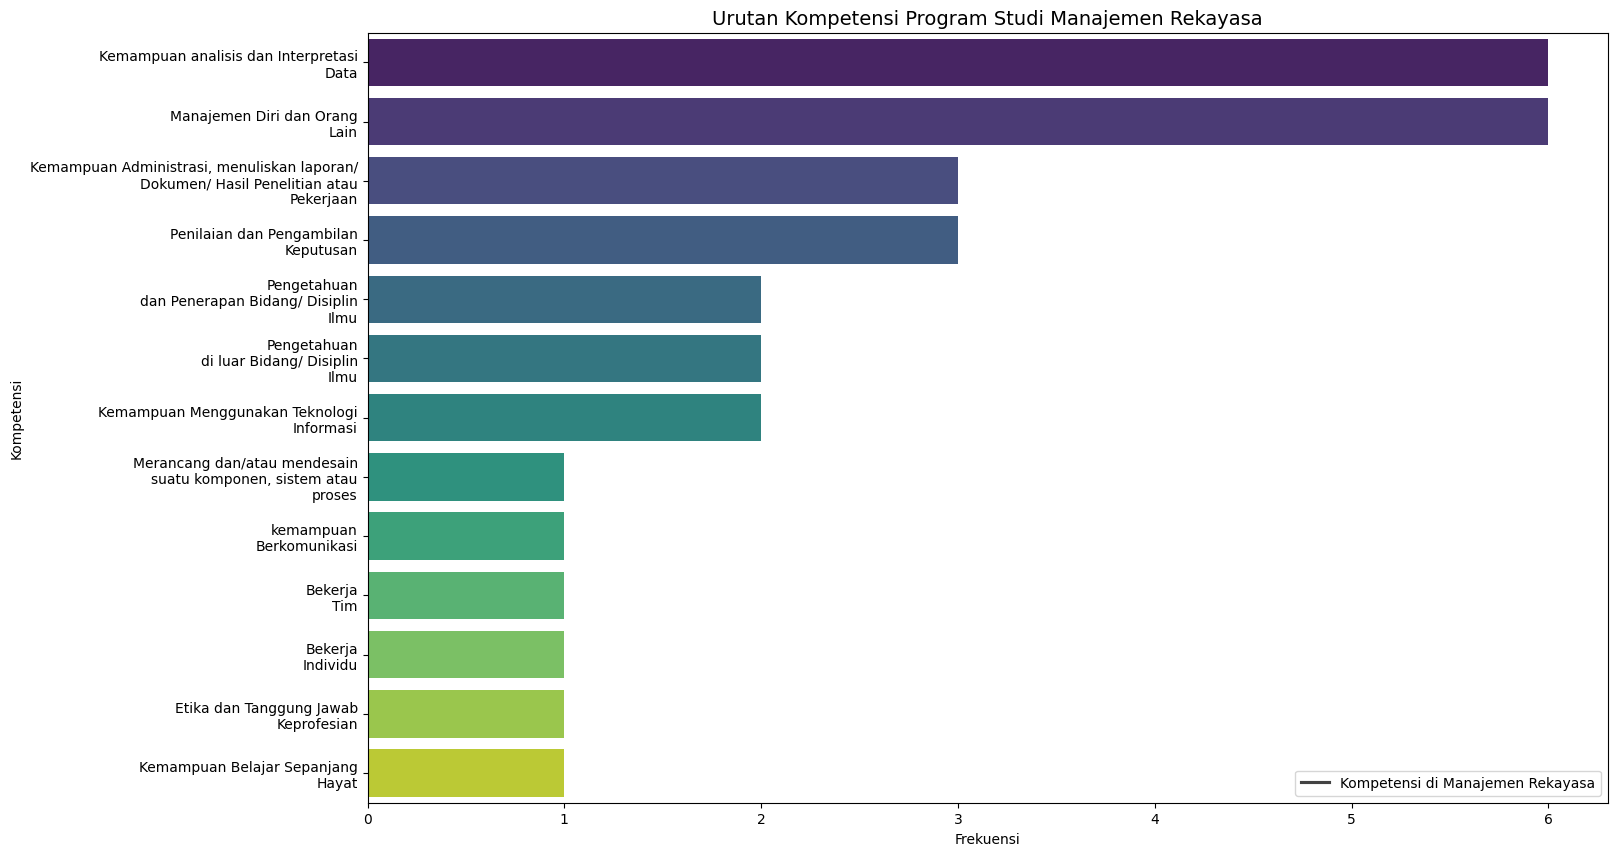

In [31]:
# show_competencies_count('Manajemen Rekayasa')

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


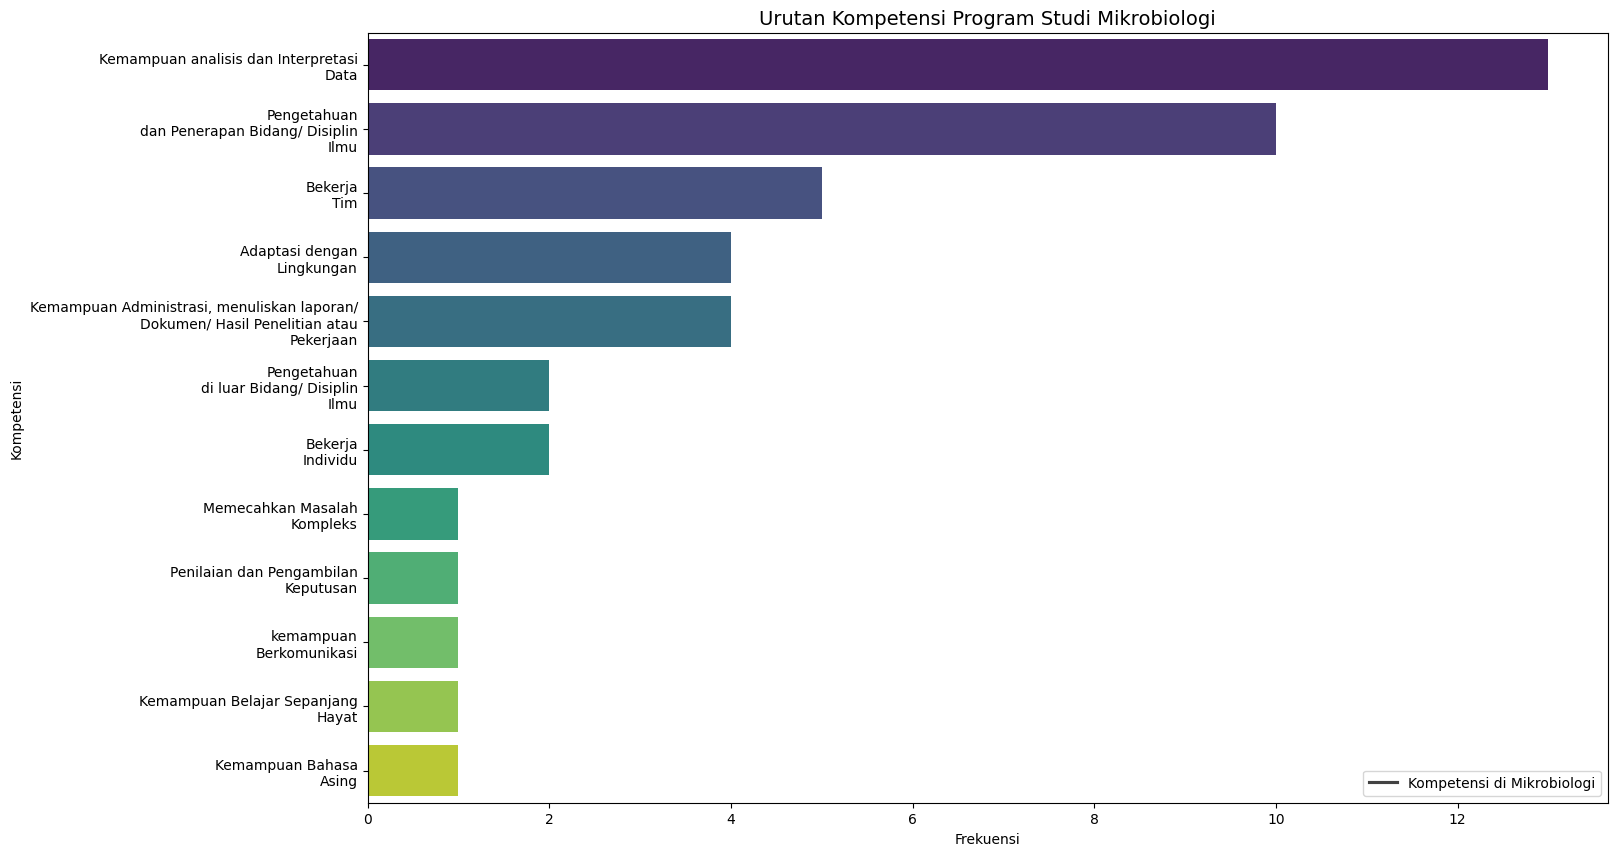

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


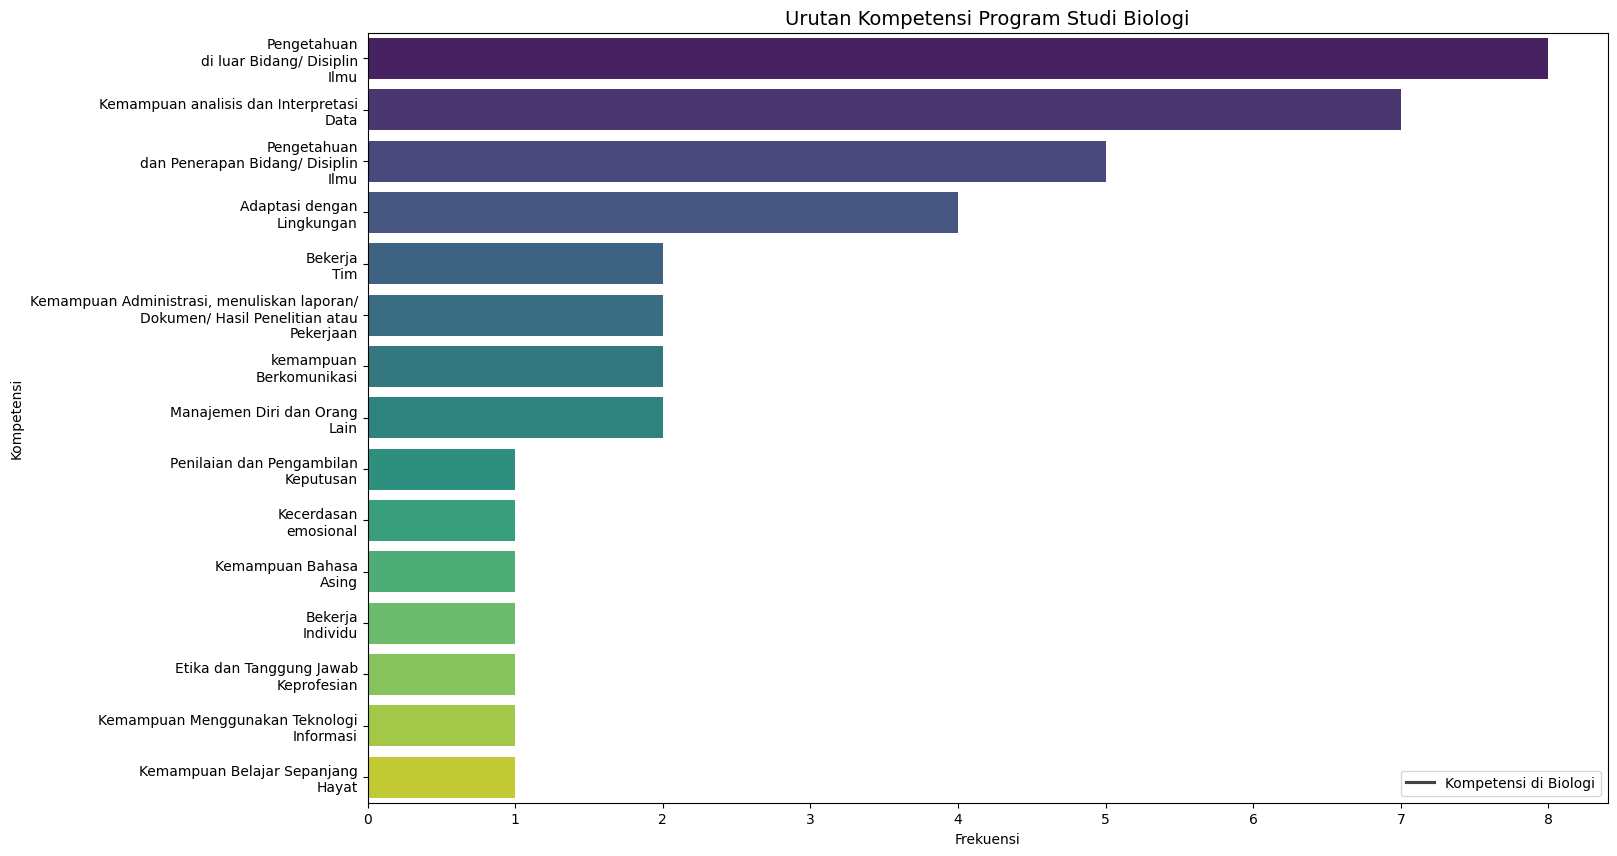

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


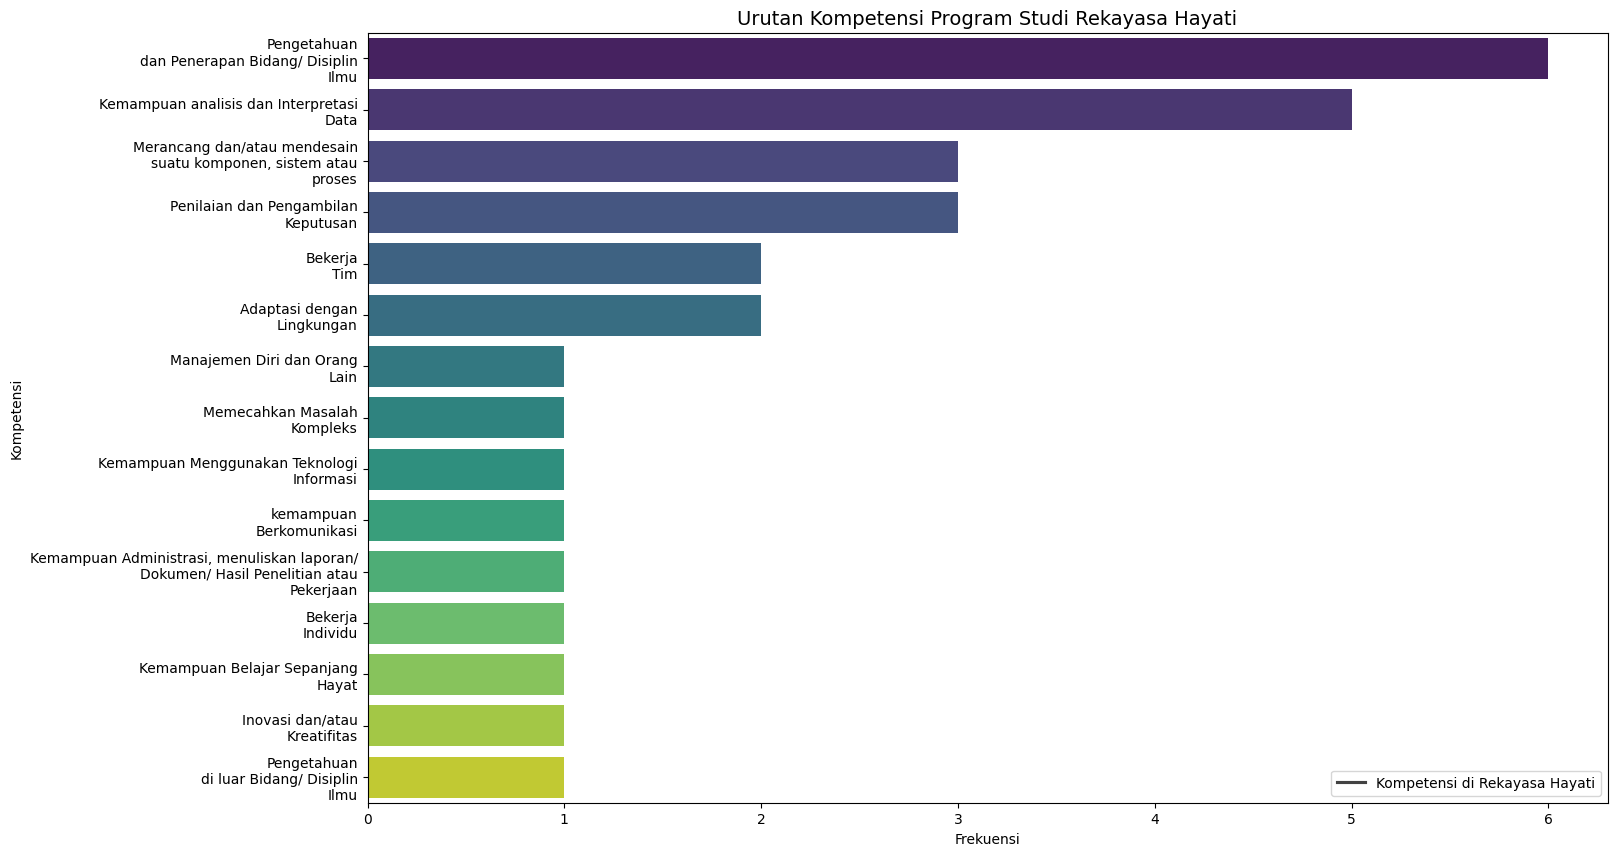

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


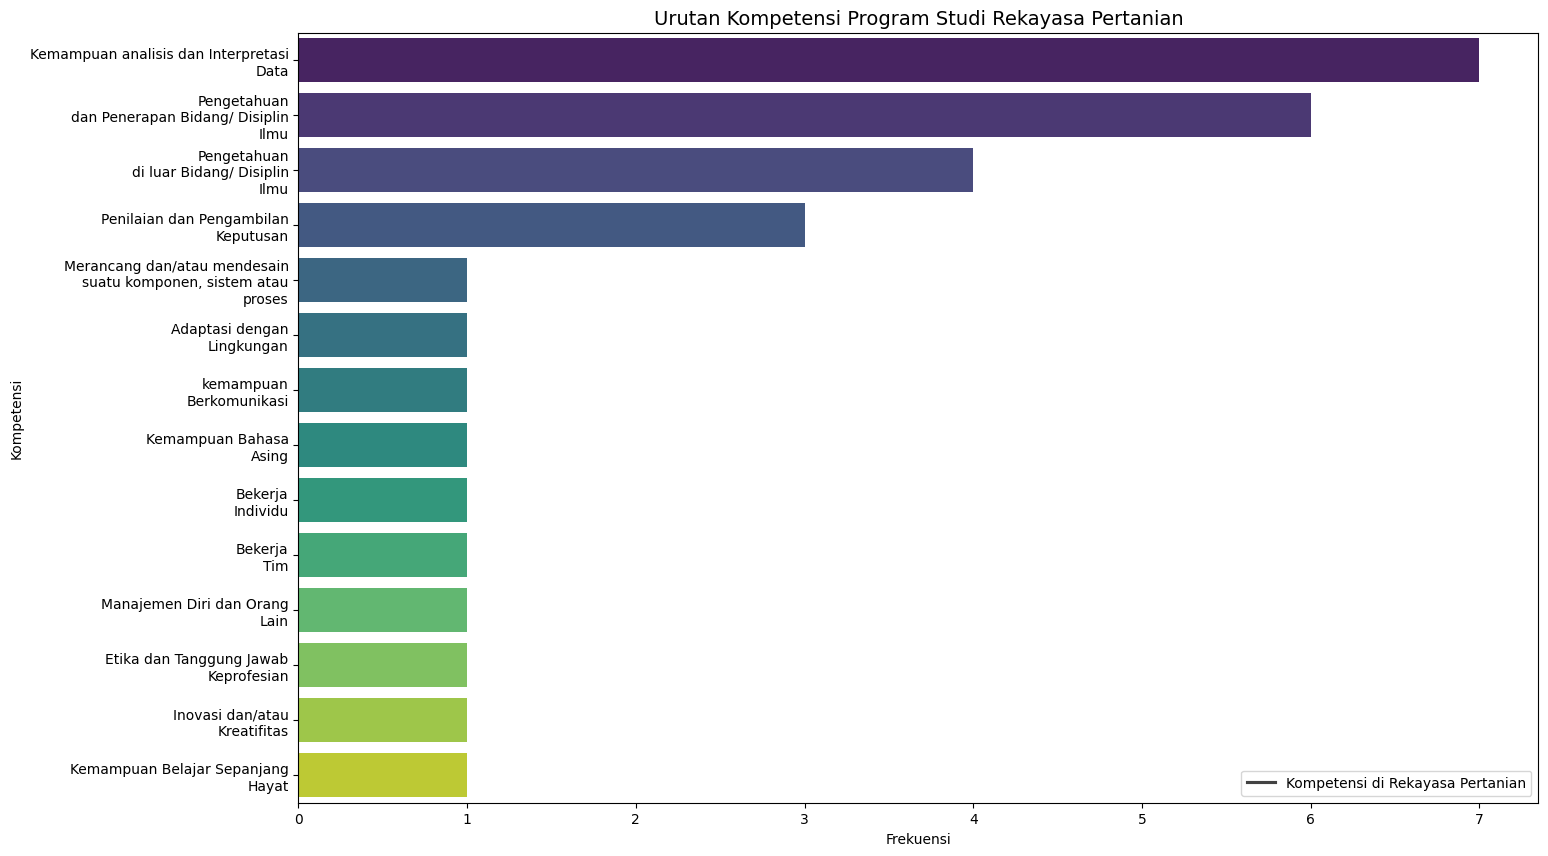

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


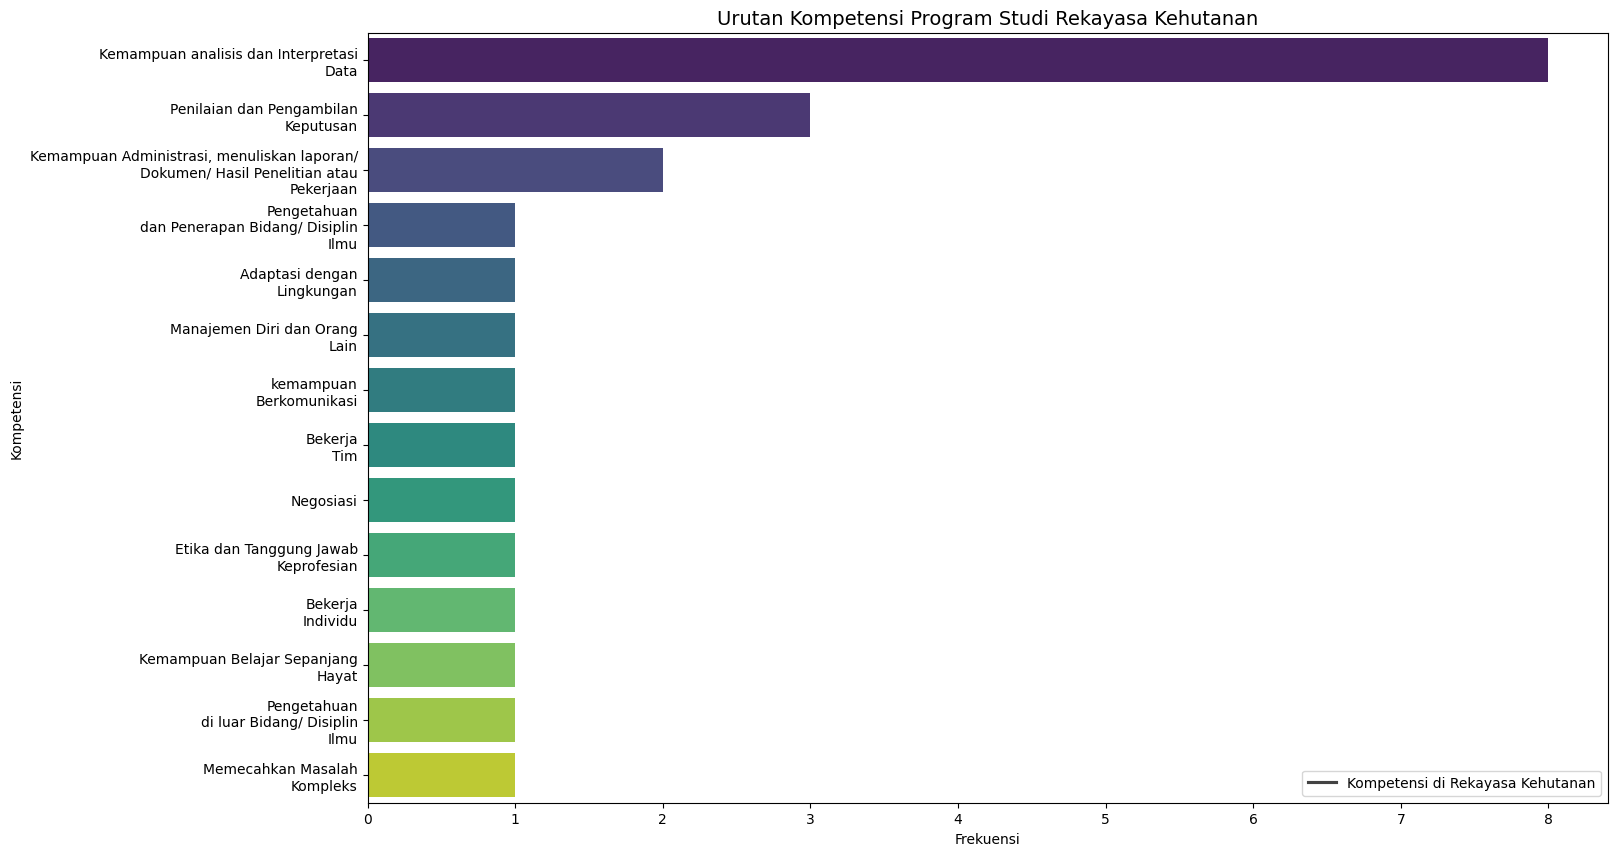

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


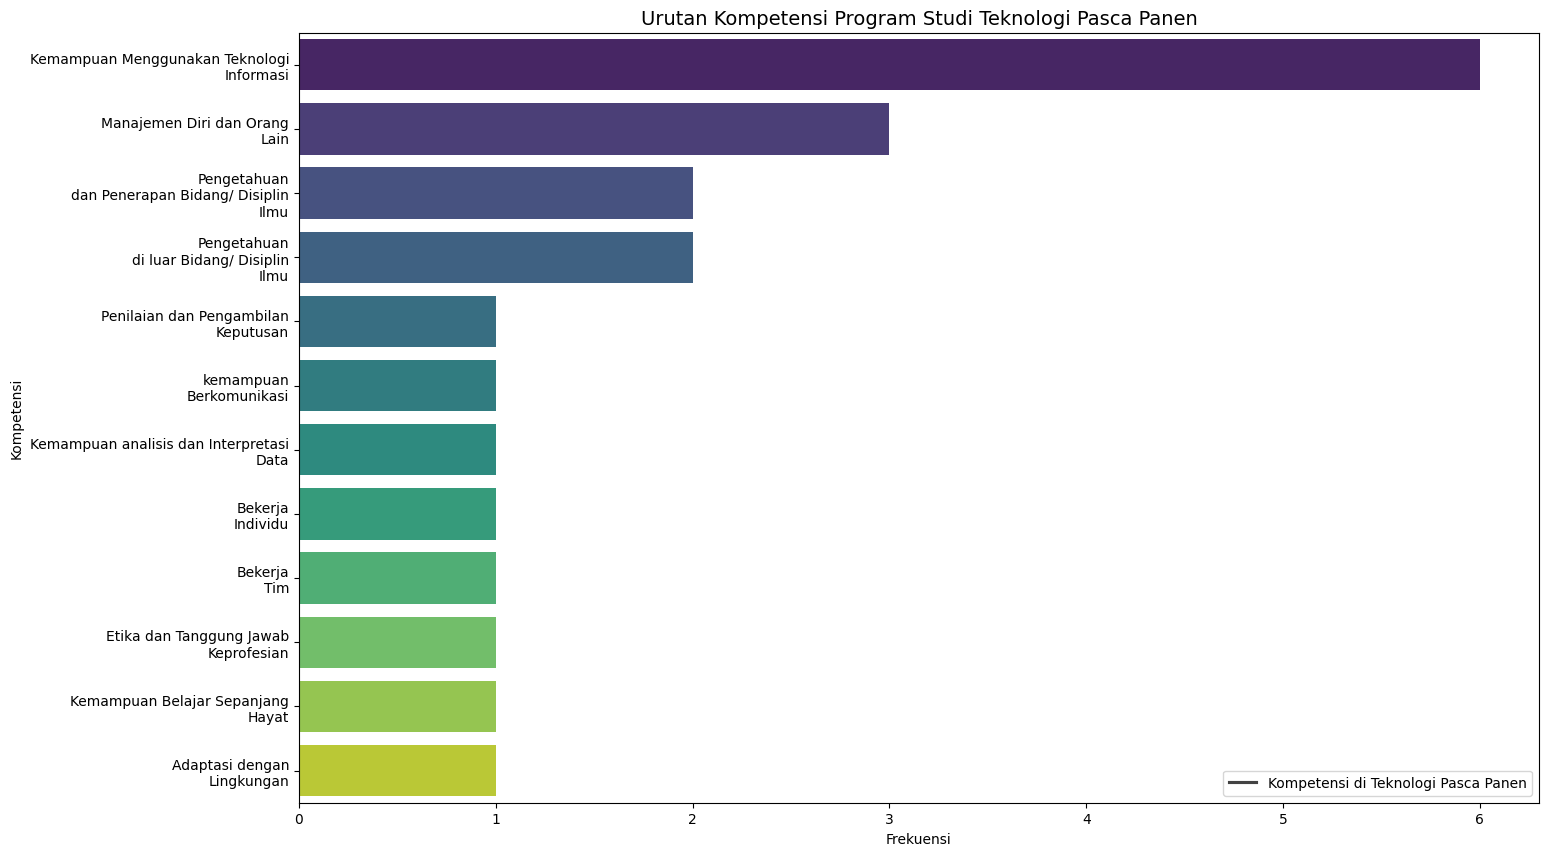

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


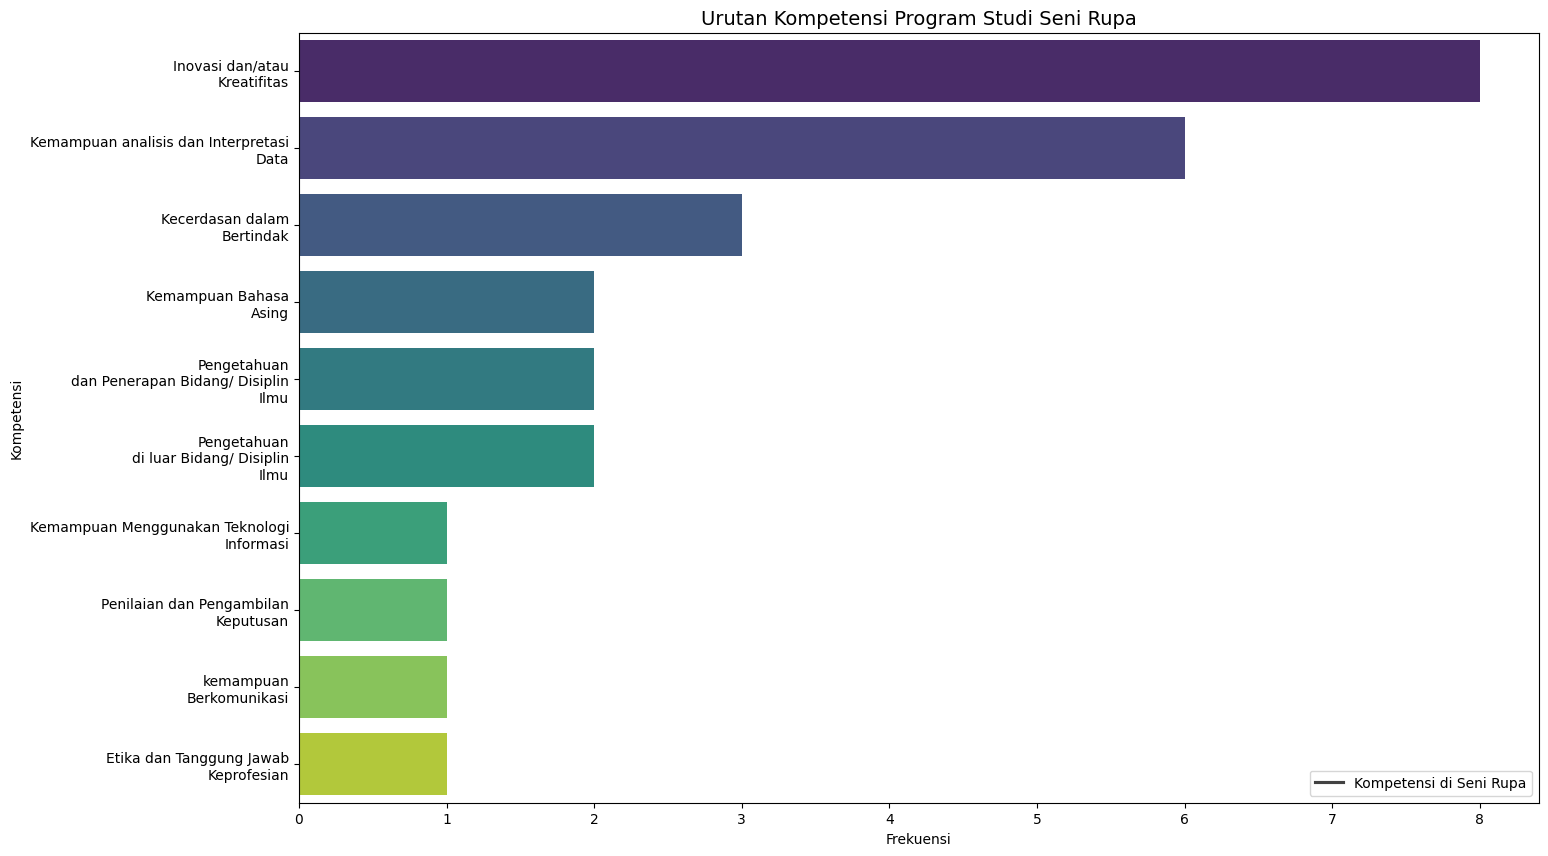

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


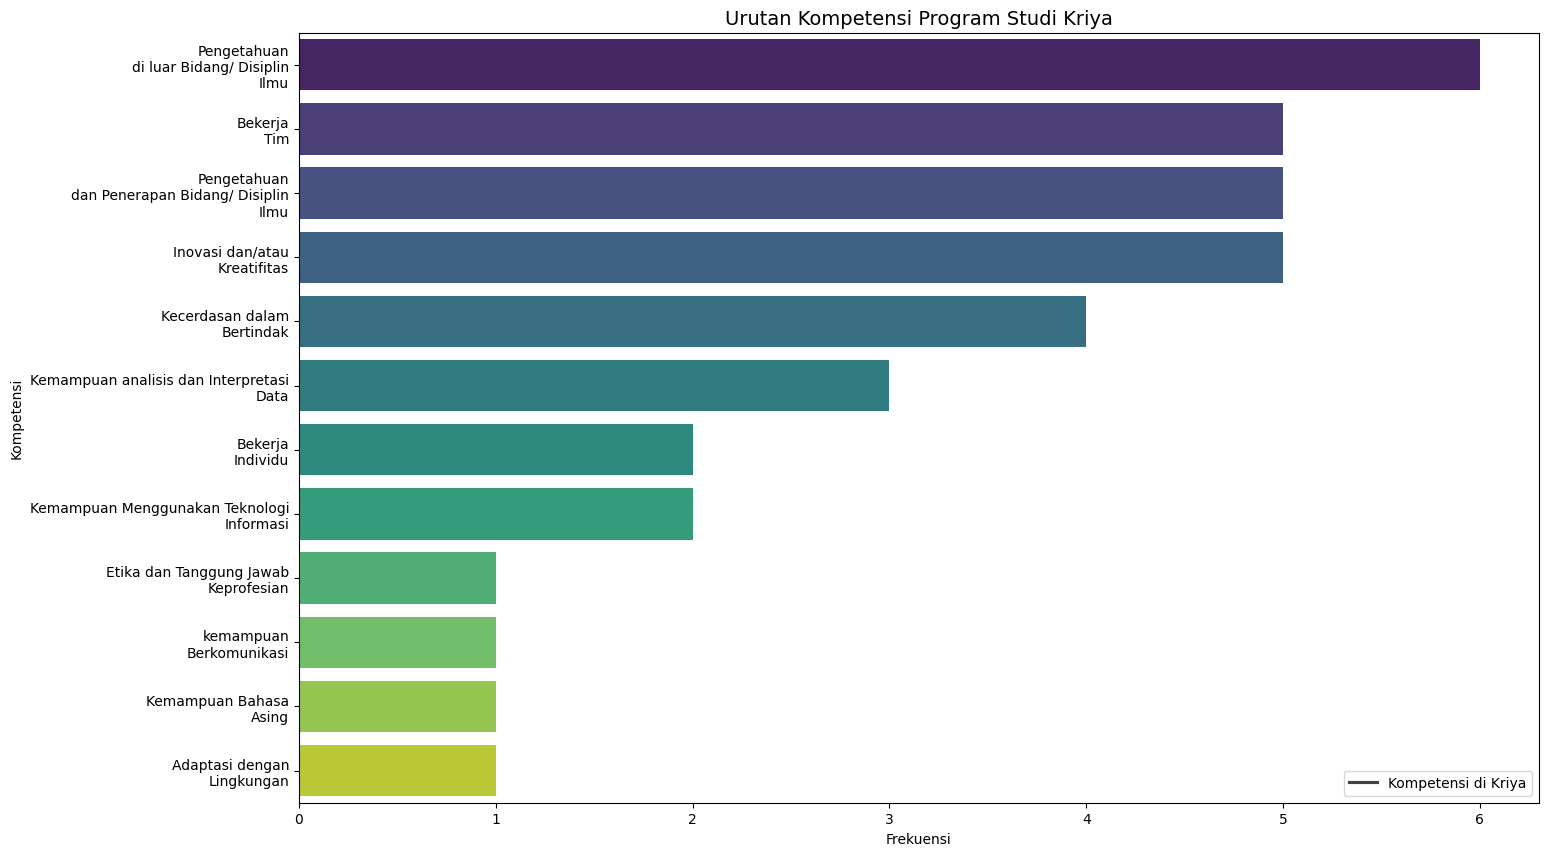

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


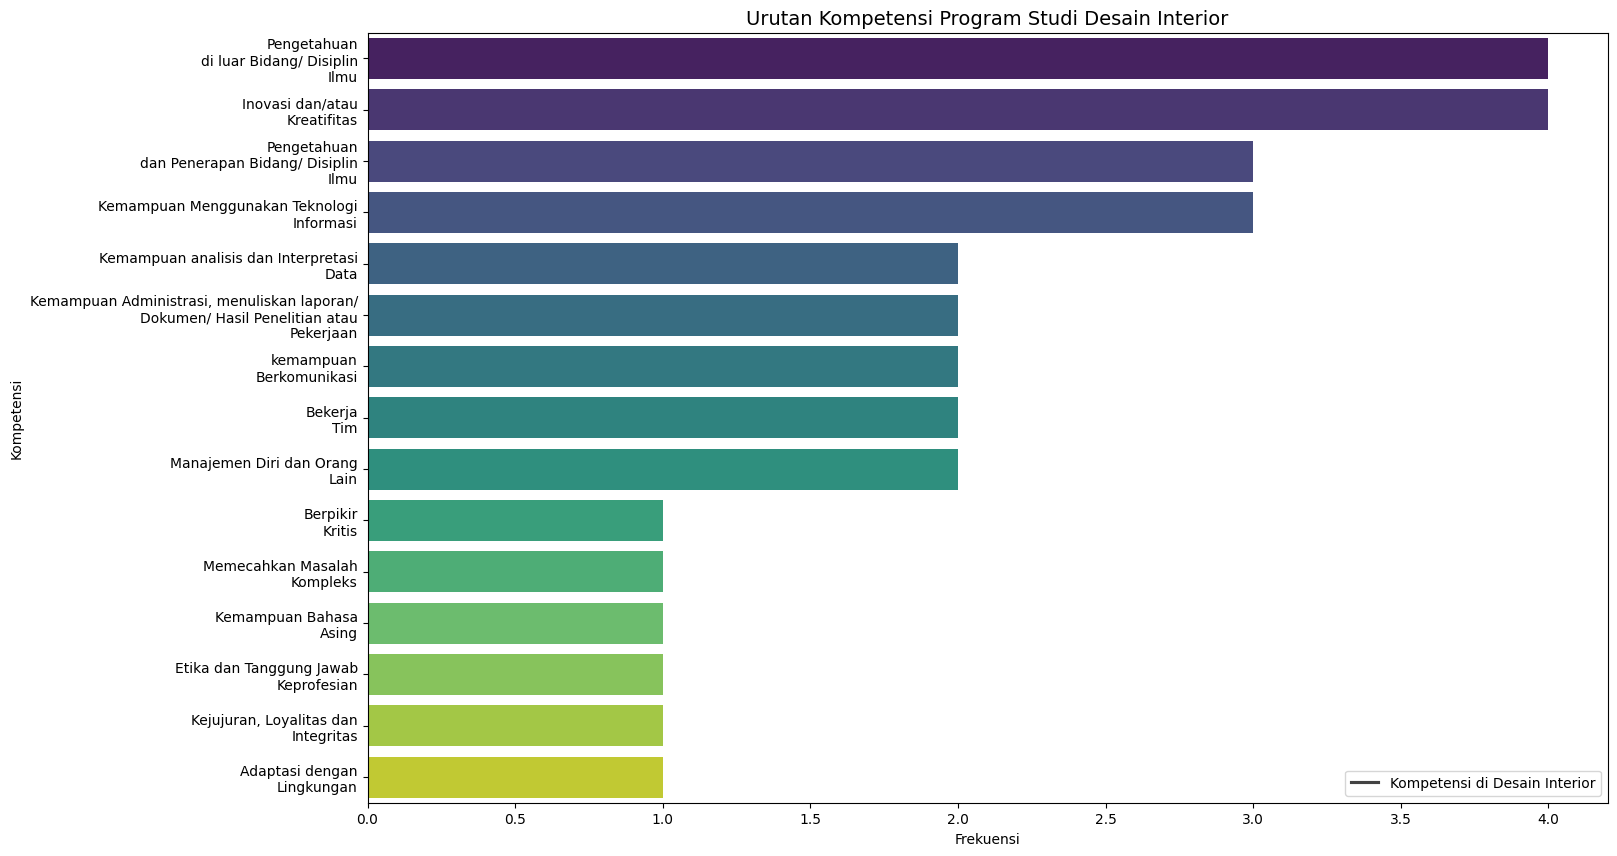

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


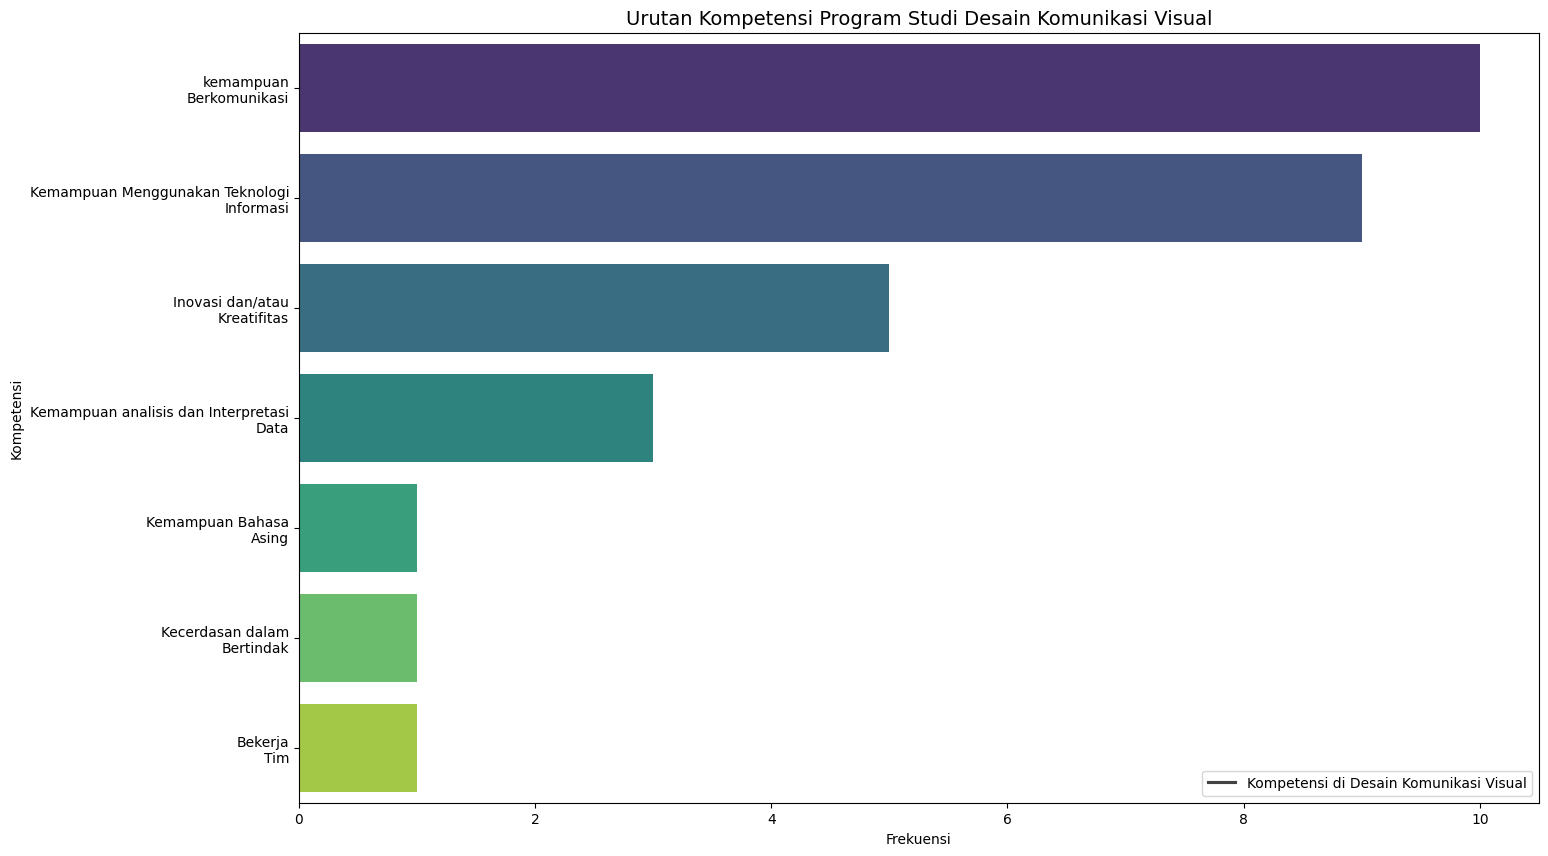

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


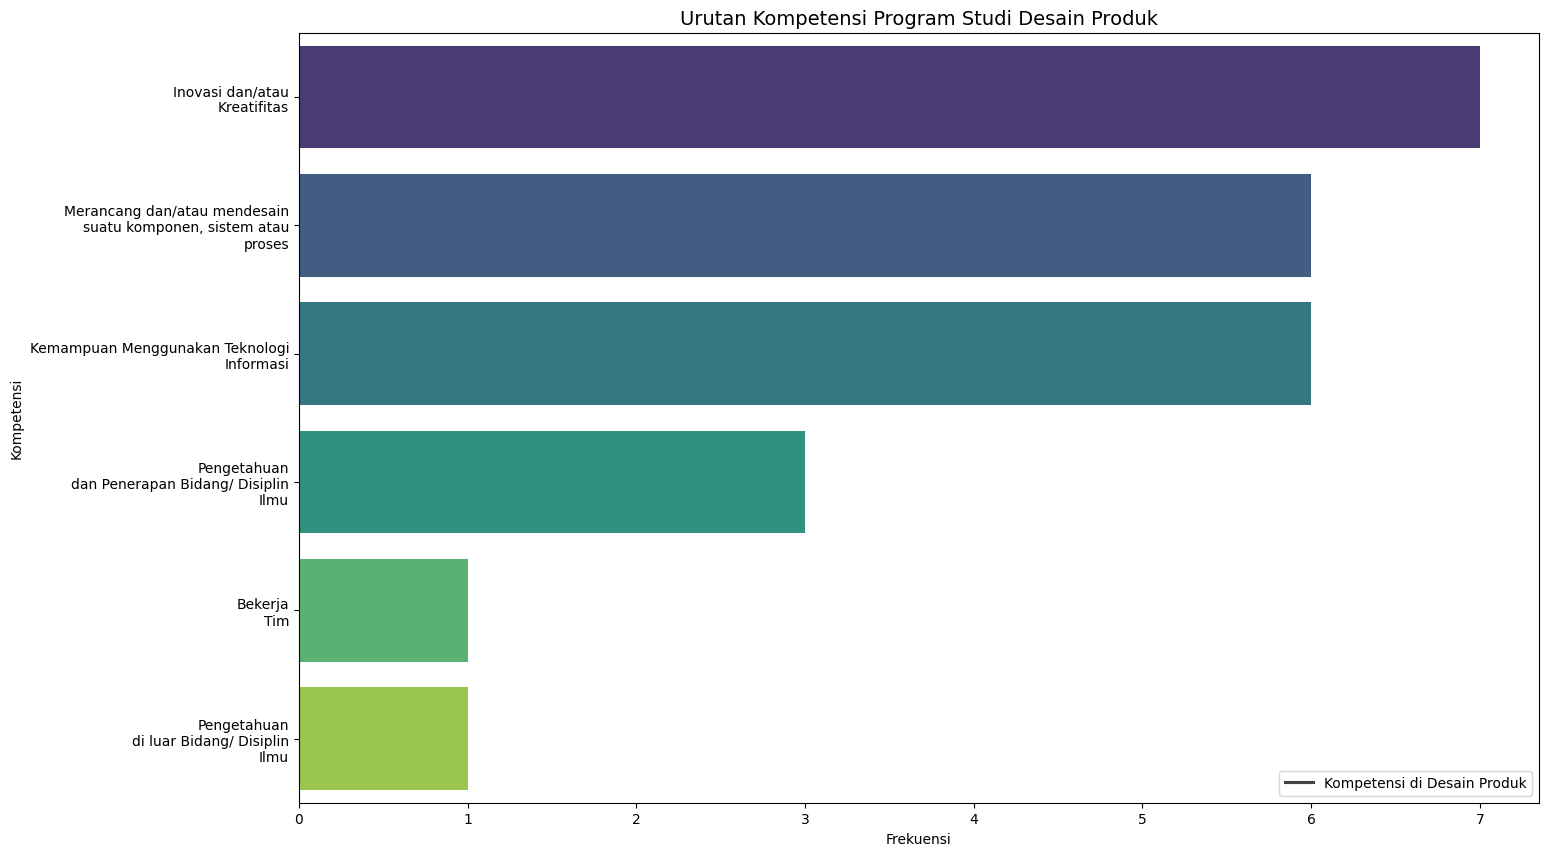

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


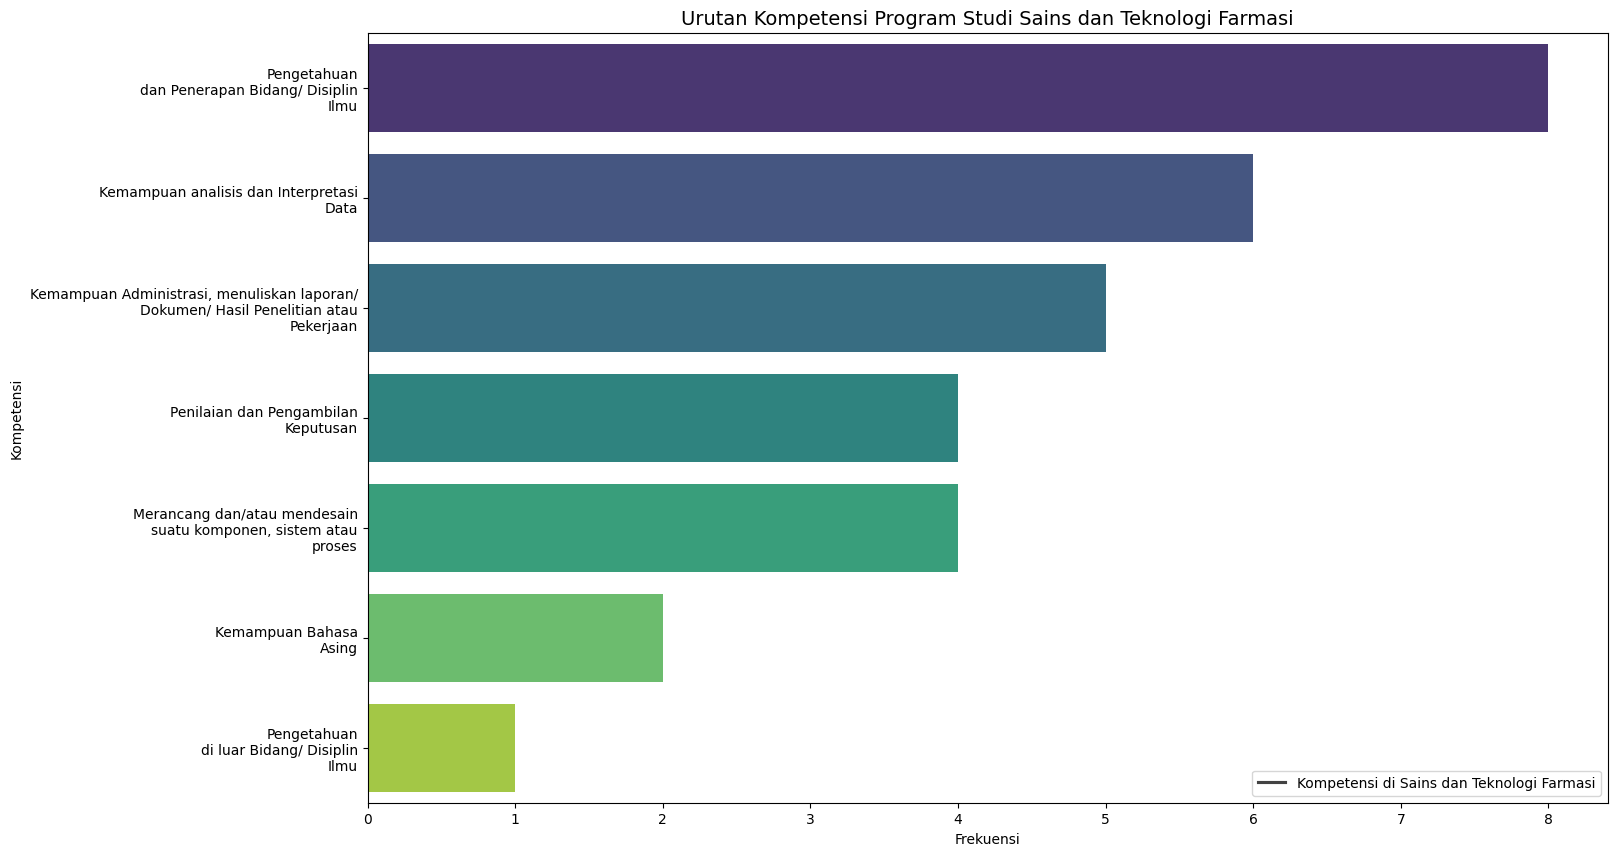

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


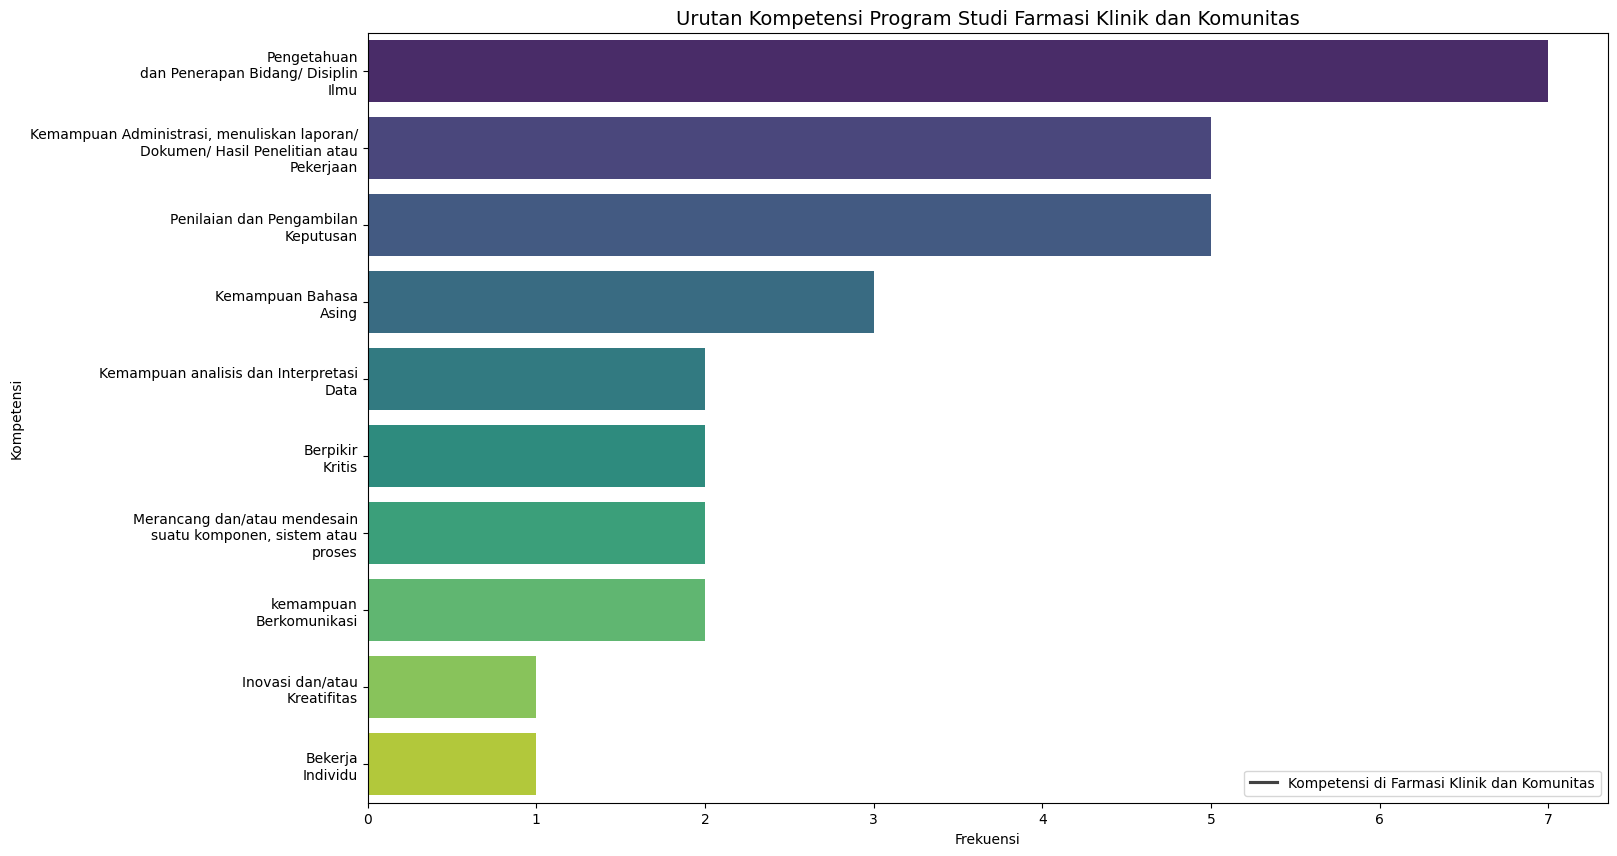

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


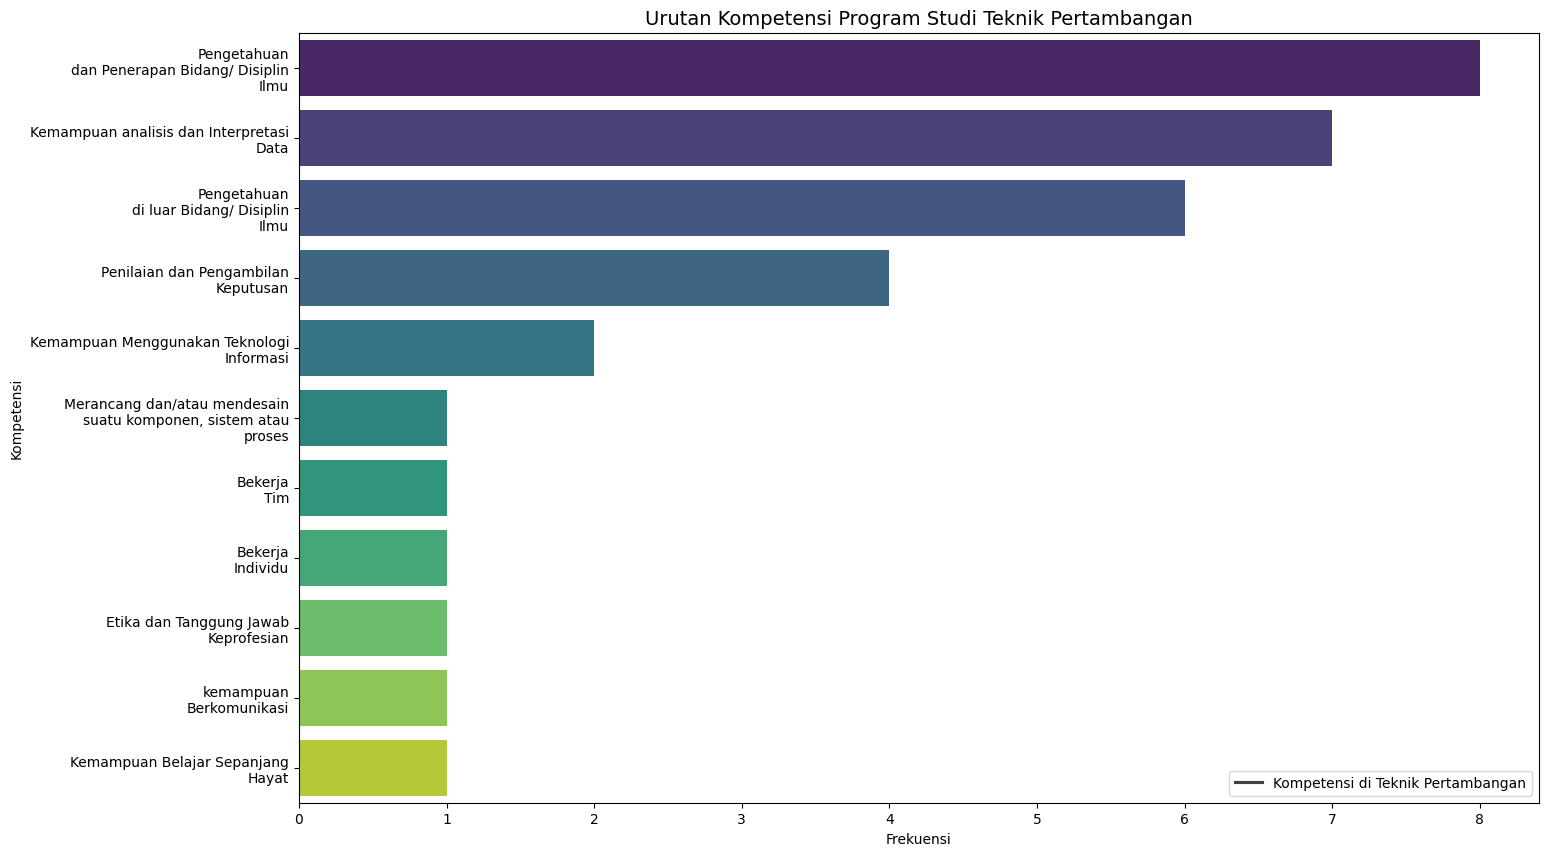

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


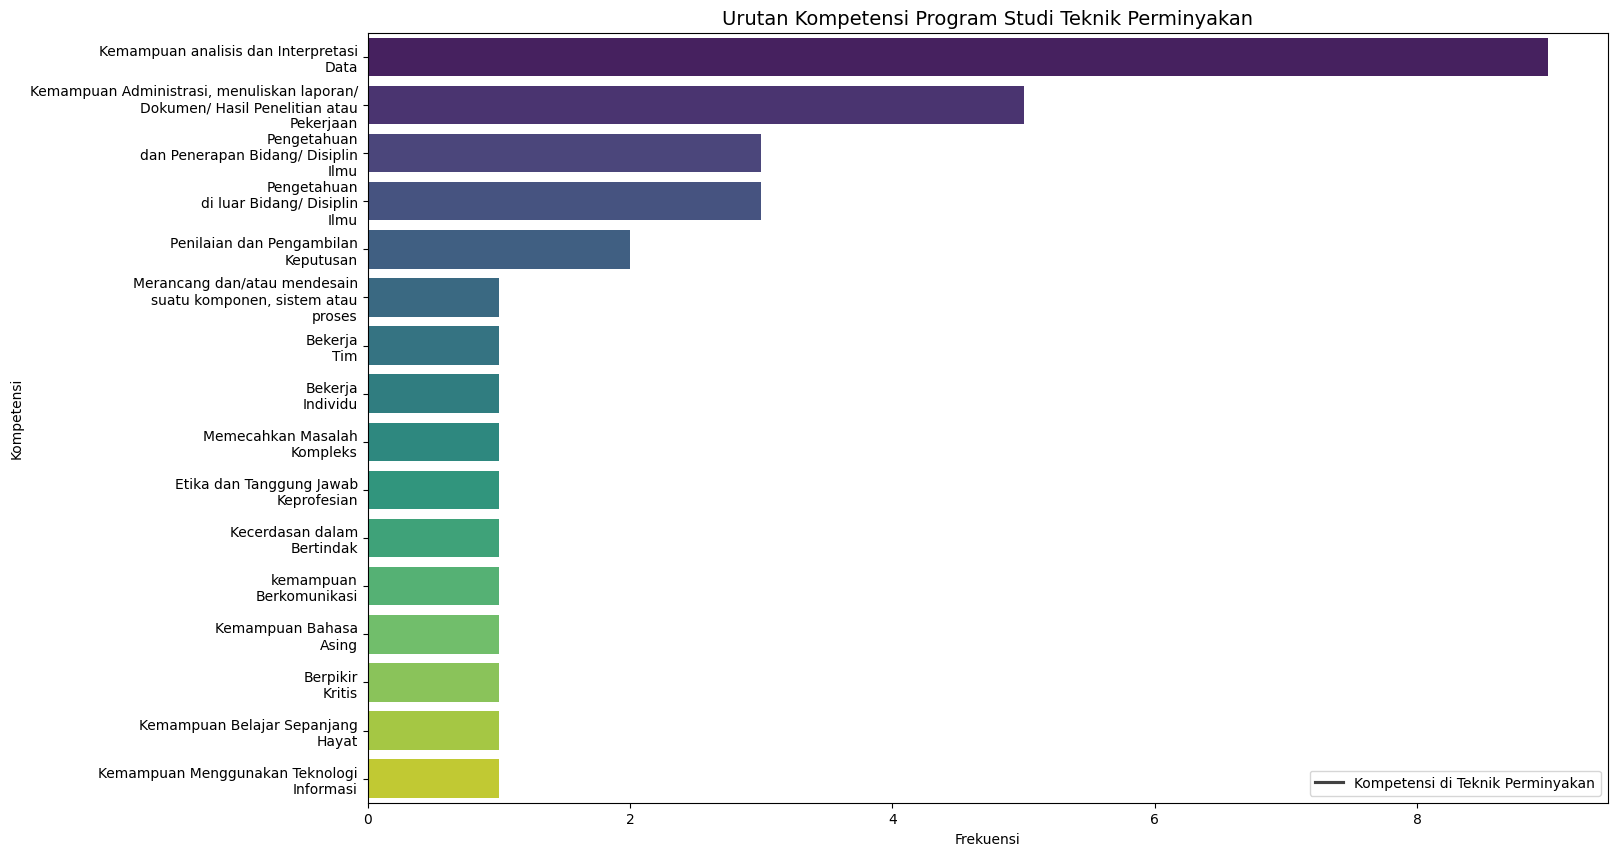

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


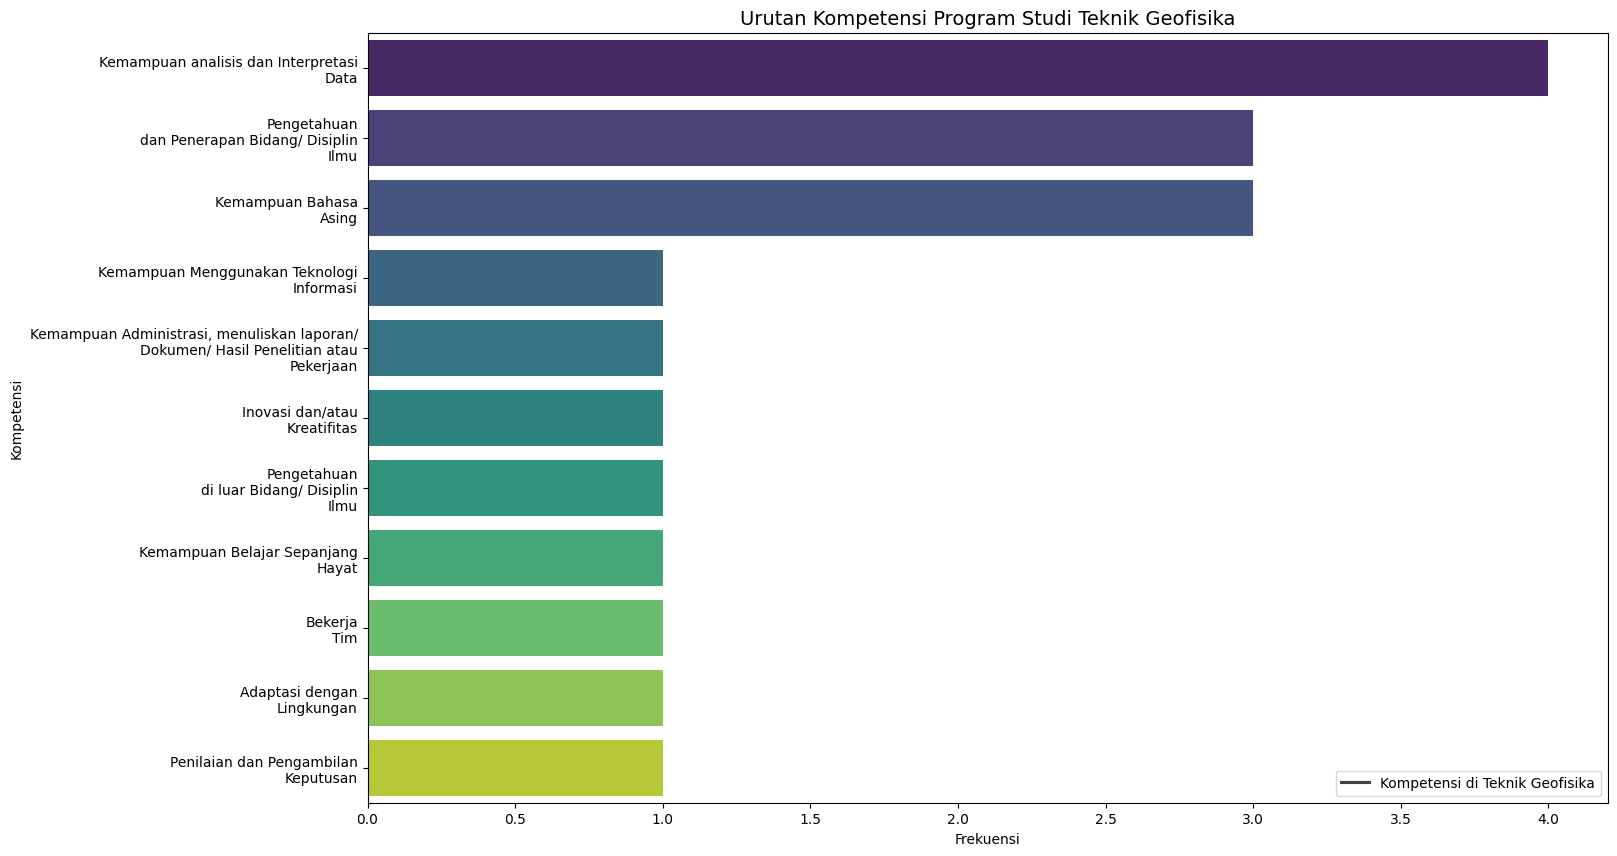

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


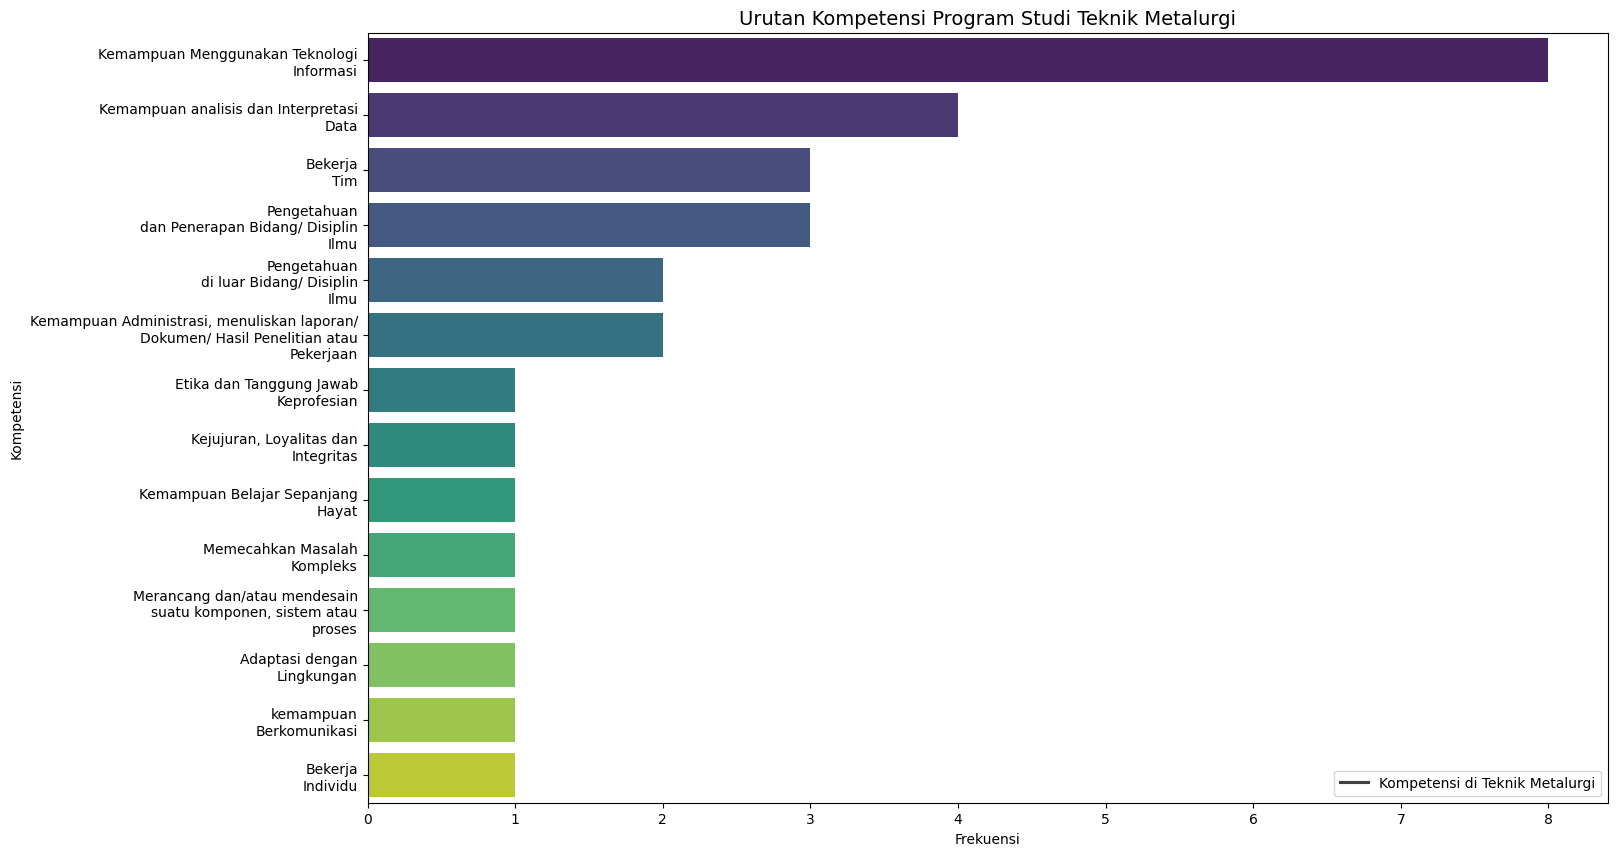

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


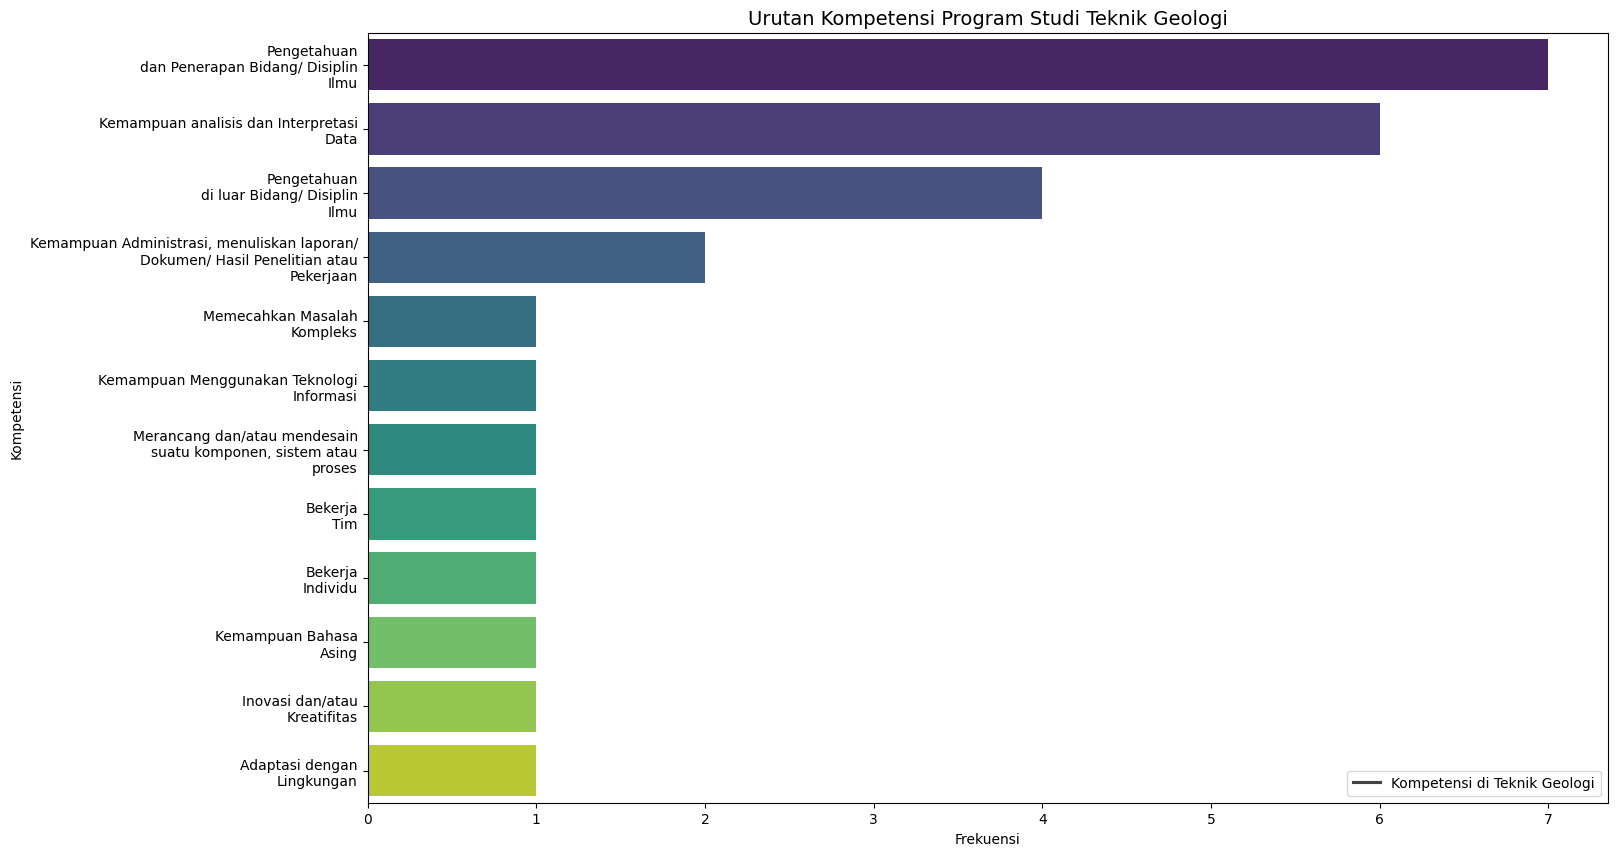

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


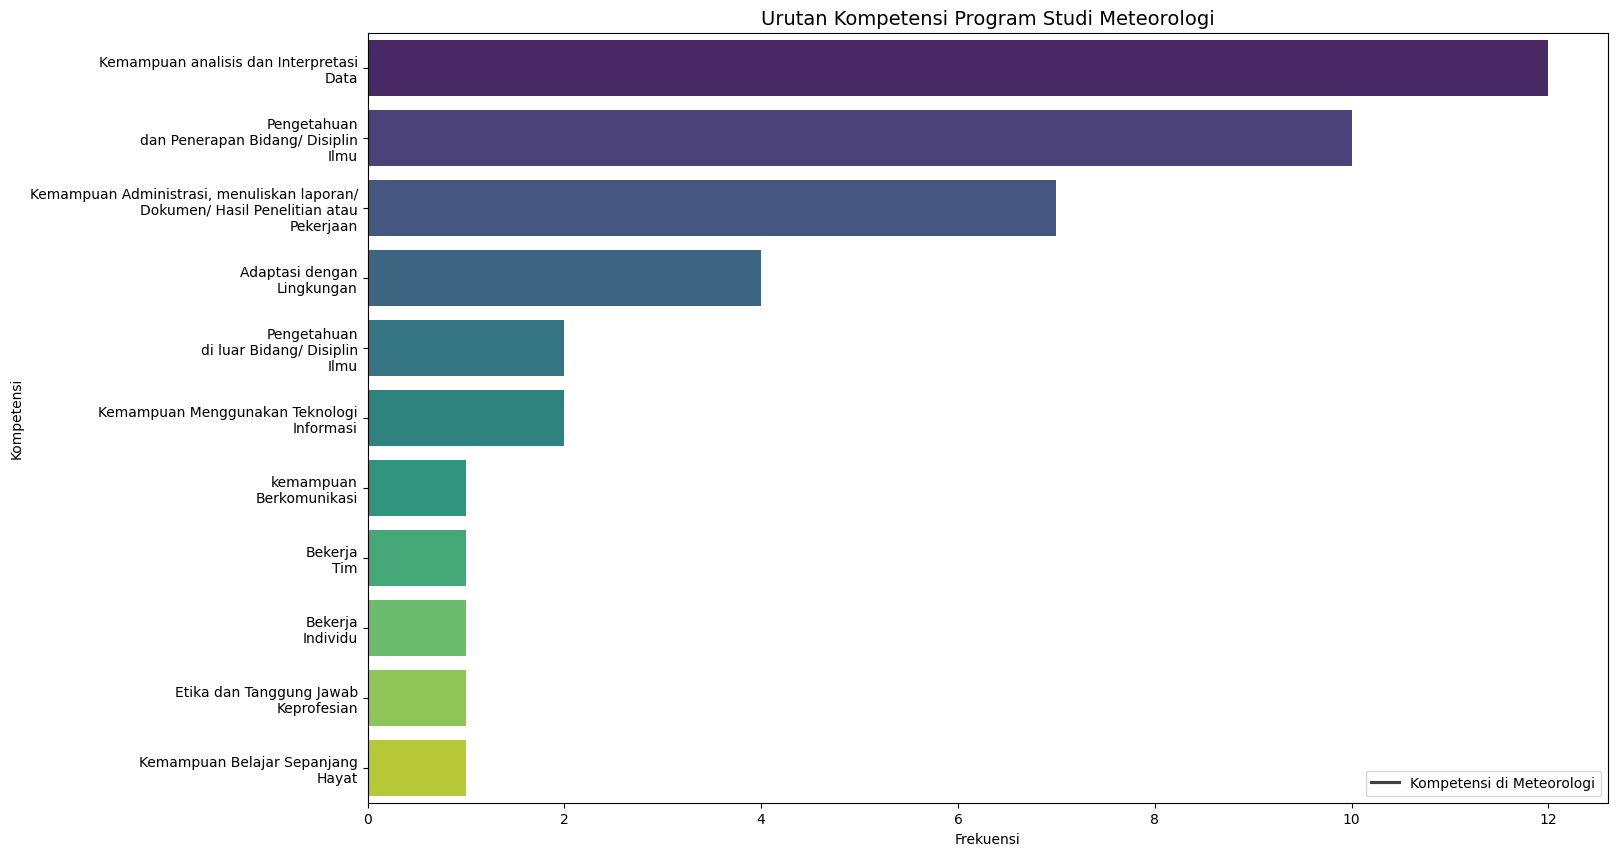

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


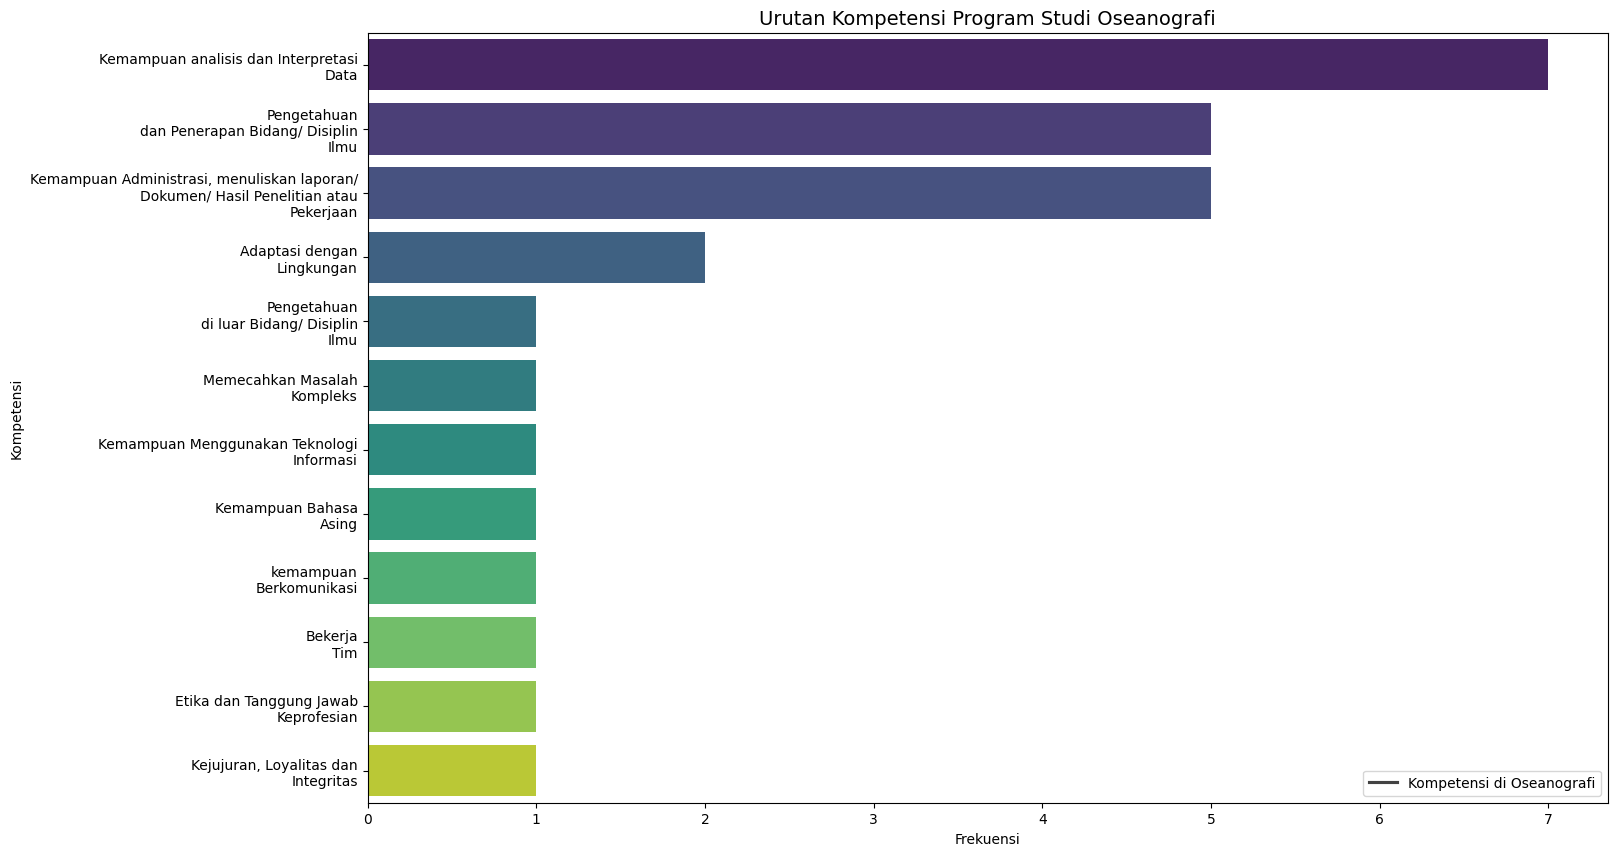

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


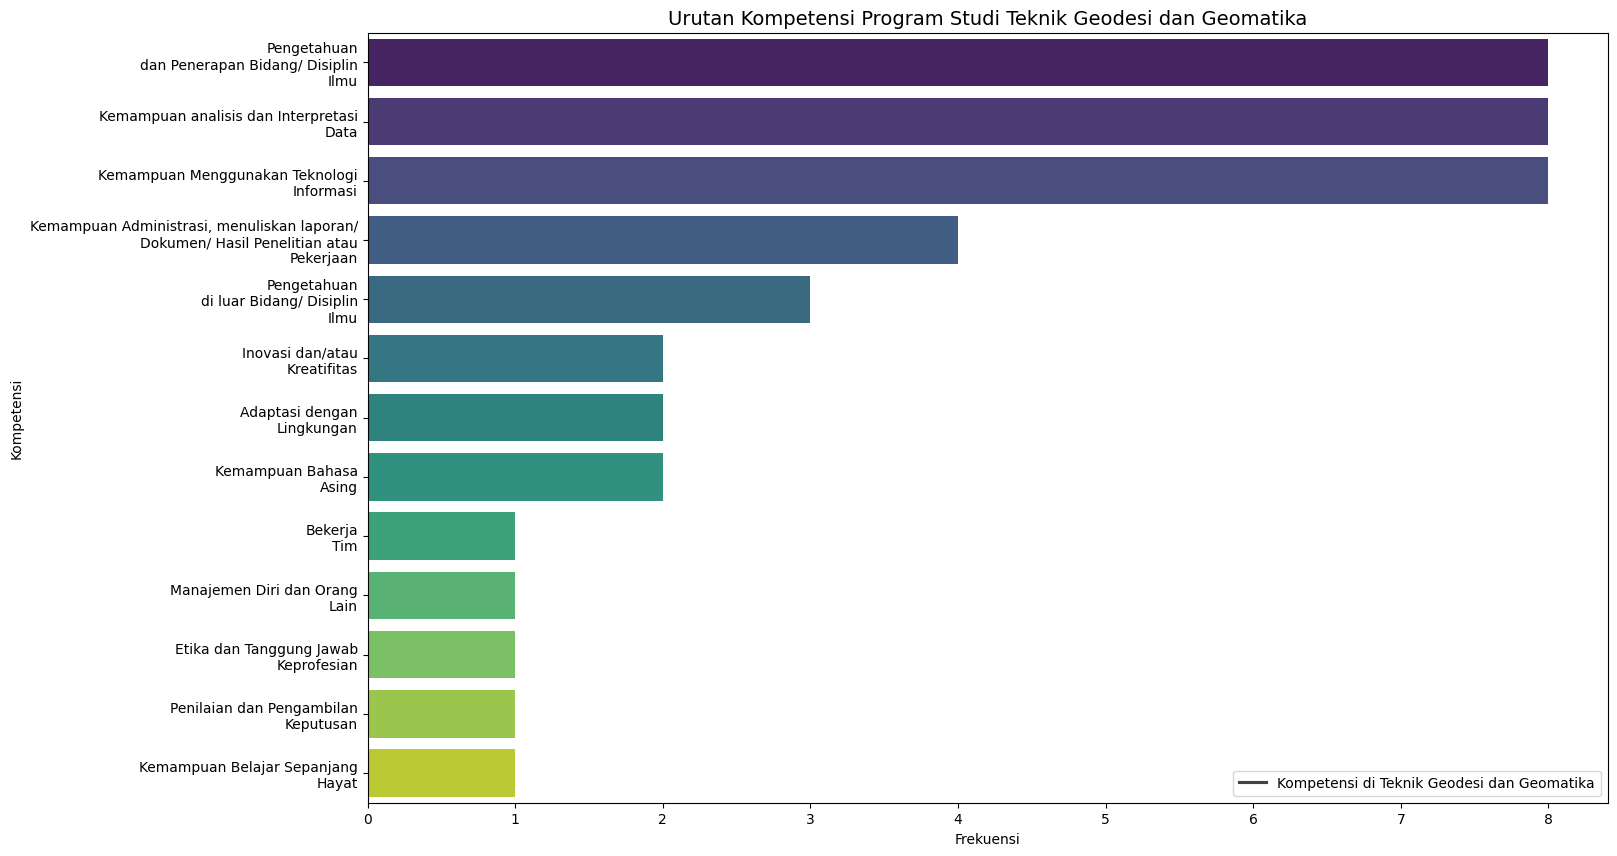

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


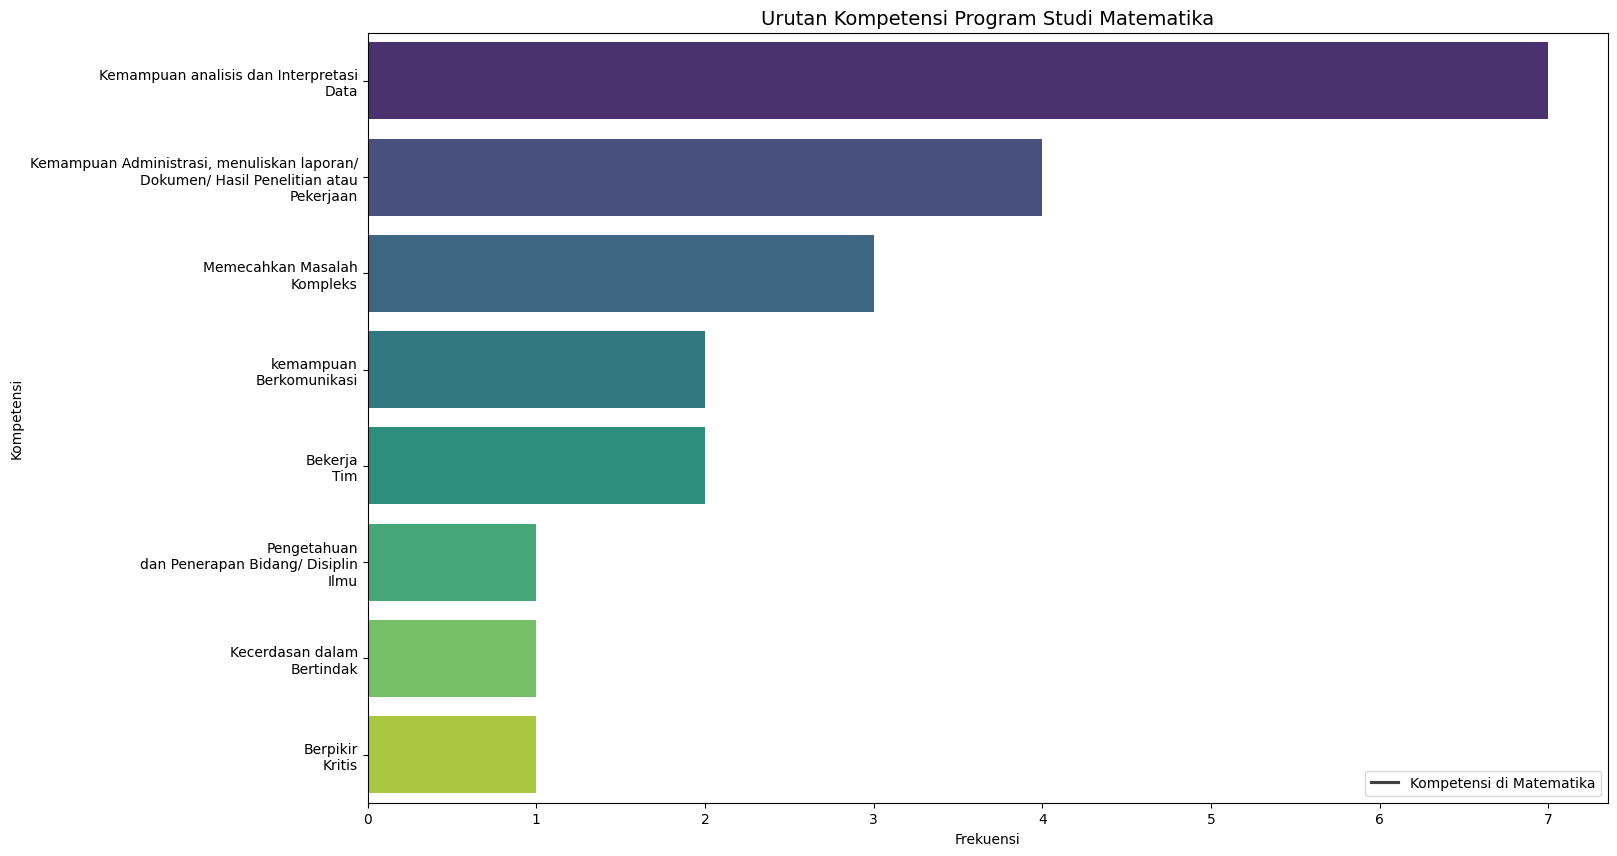

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


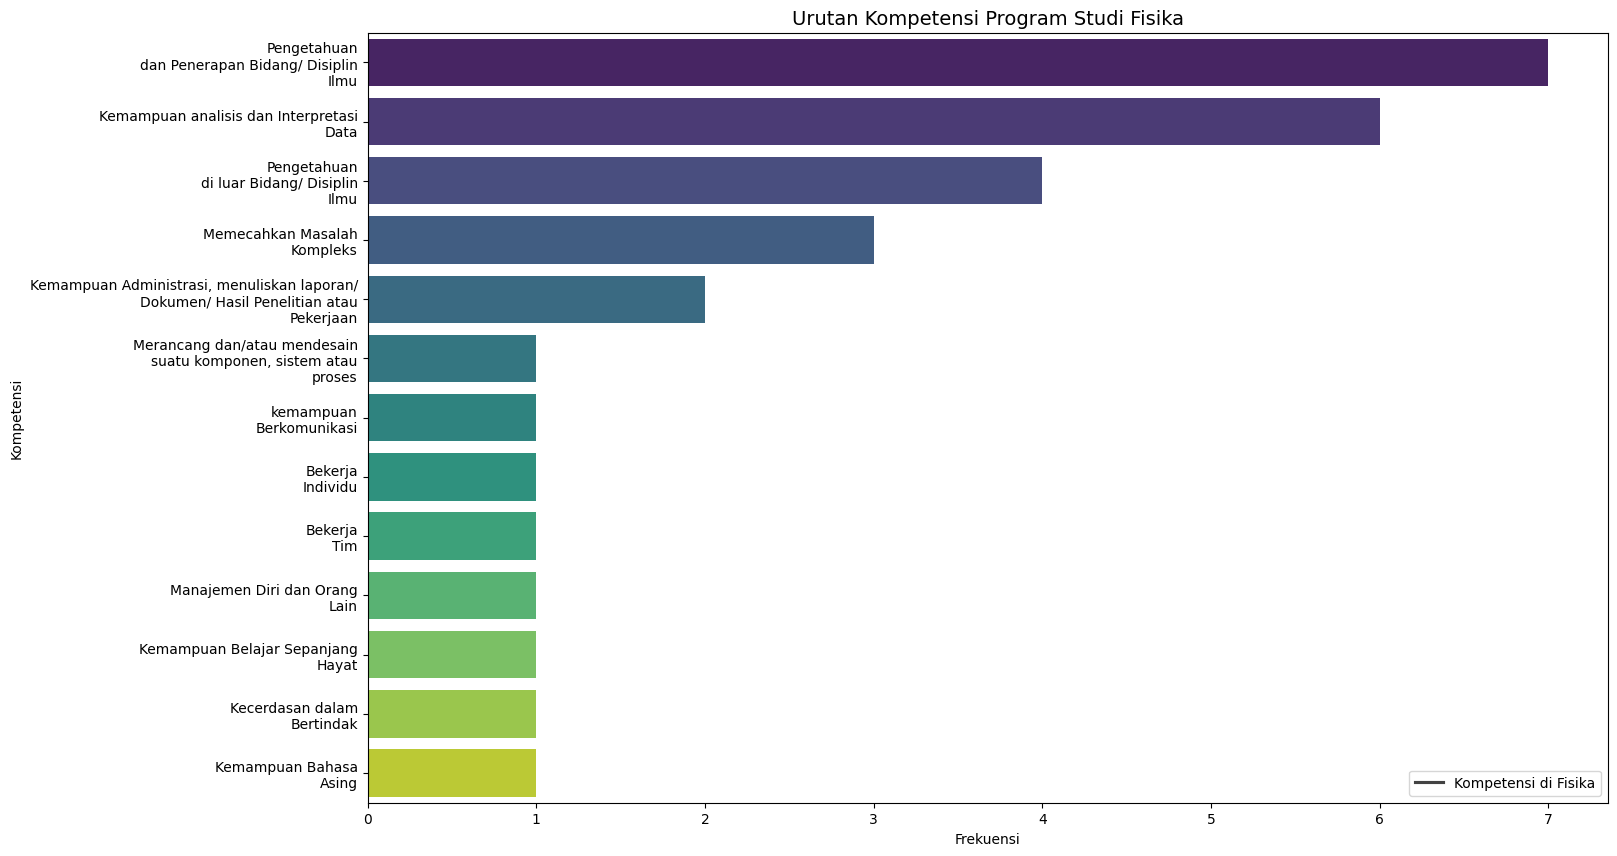

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


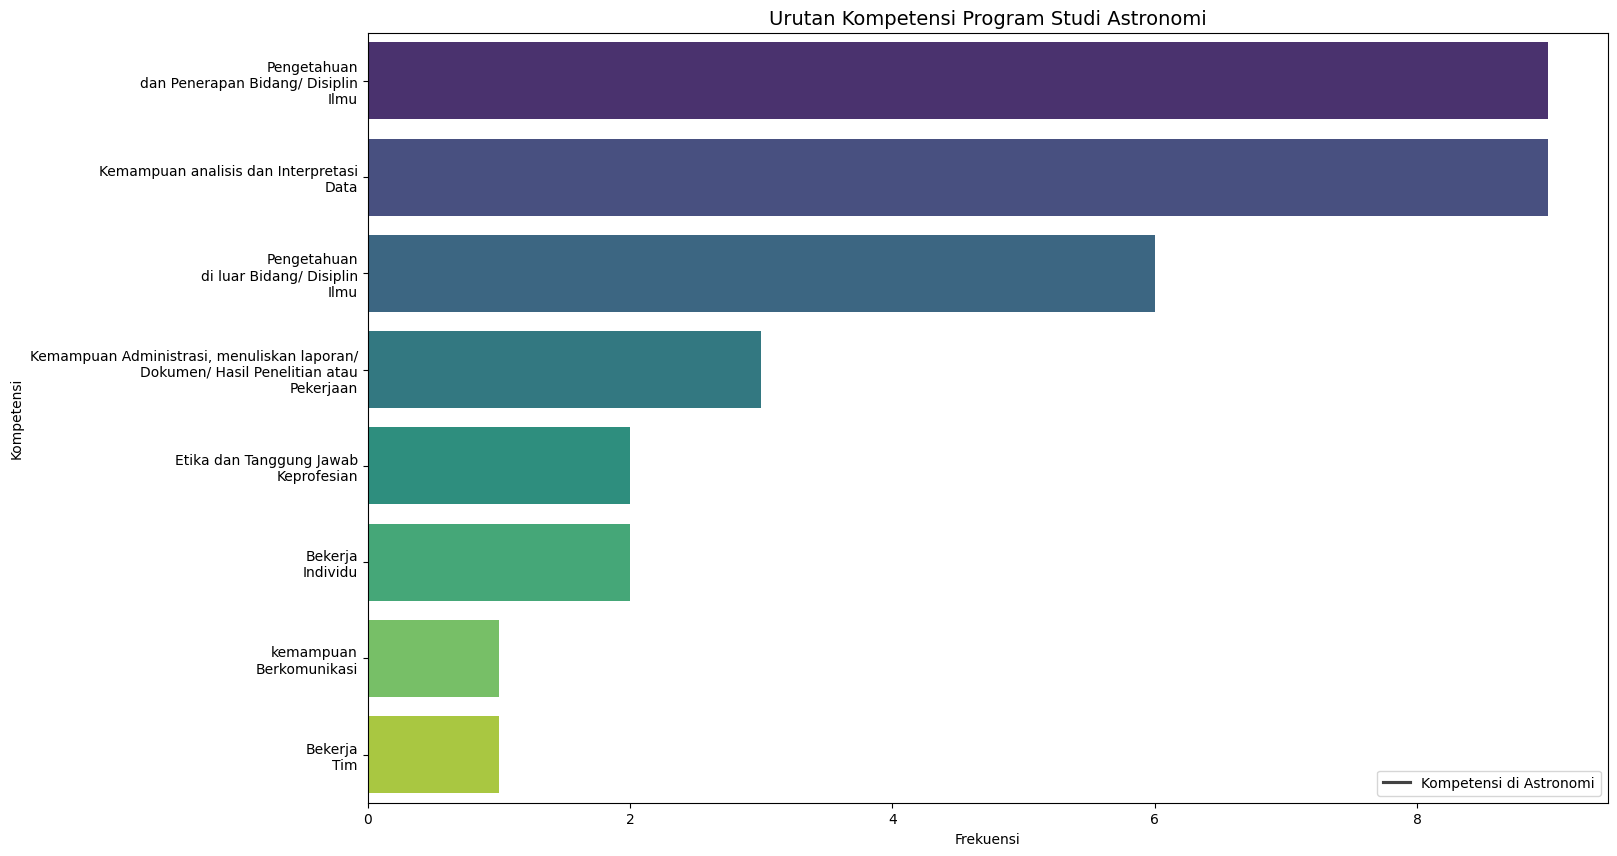

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


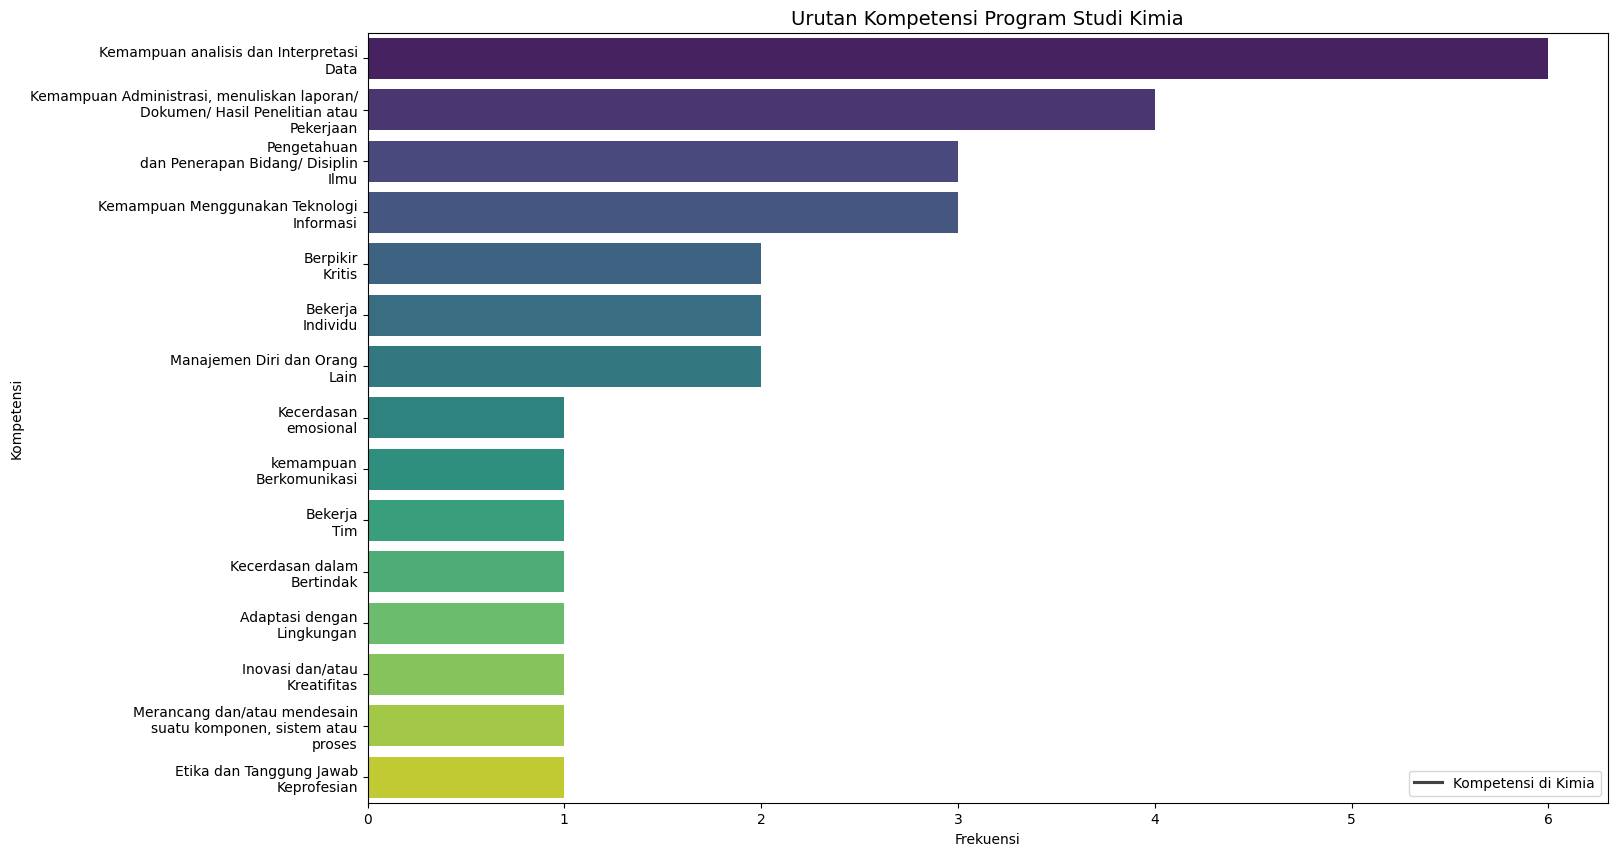

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


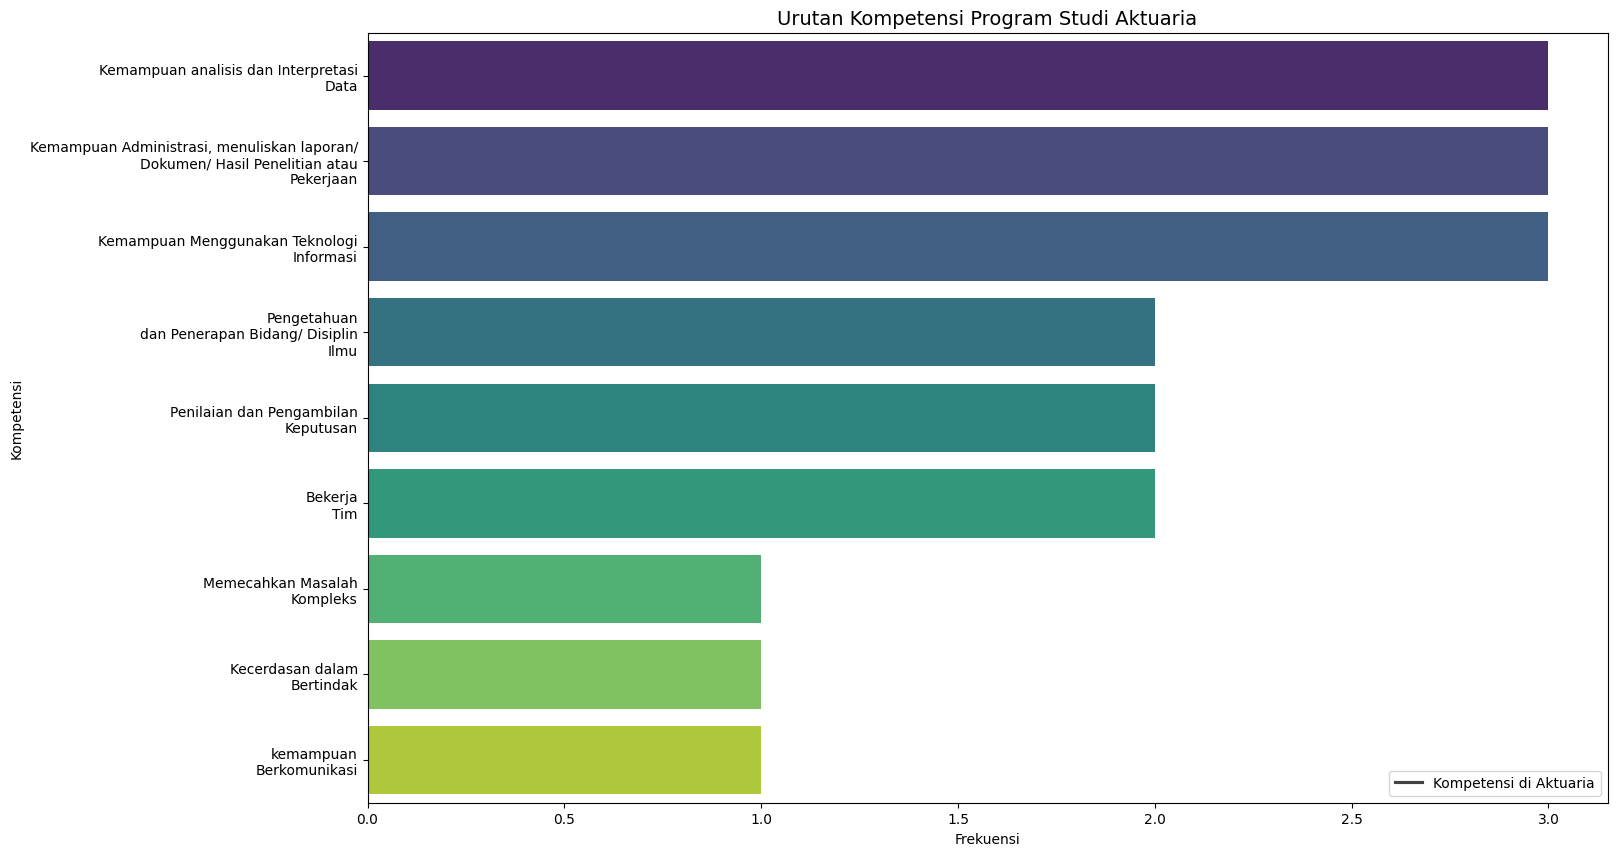

C:\Users\nasha\AppData\Local\Temp\ipykernel_23300\2953150597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val, y=index2, palette="viridis")


KeyboardInterrupt: 

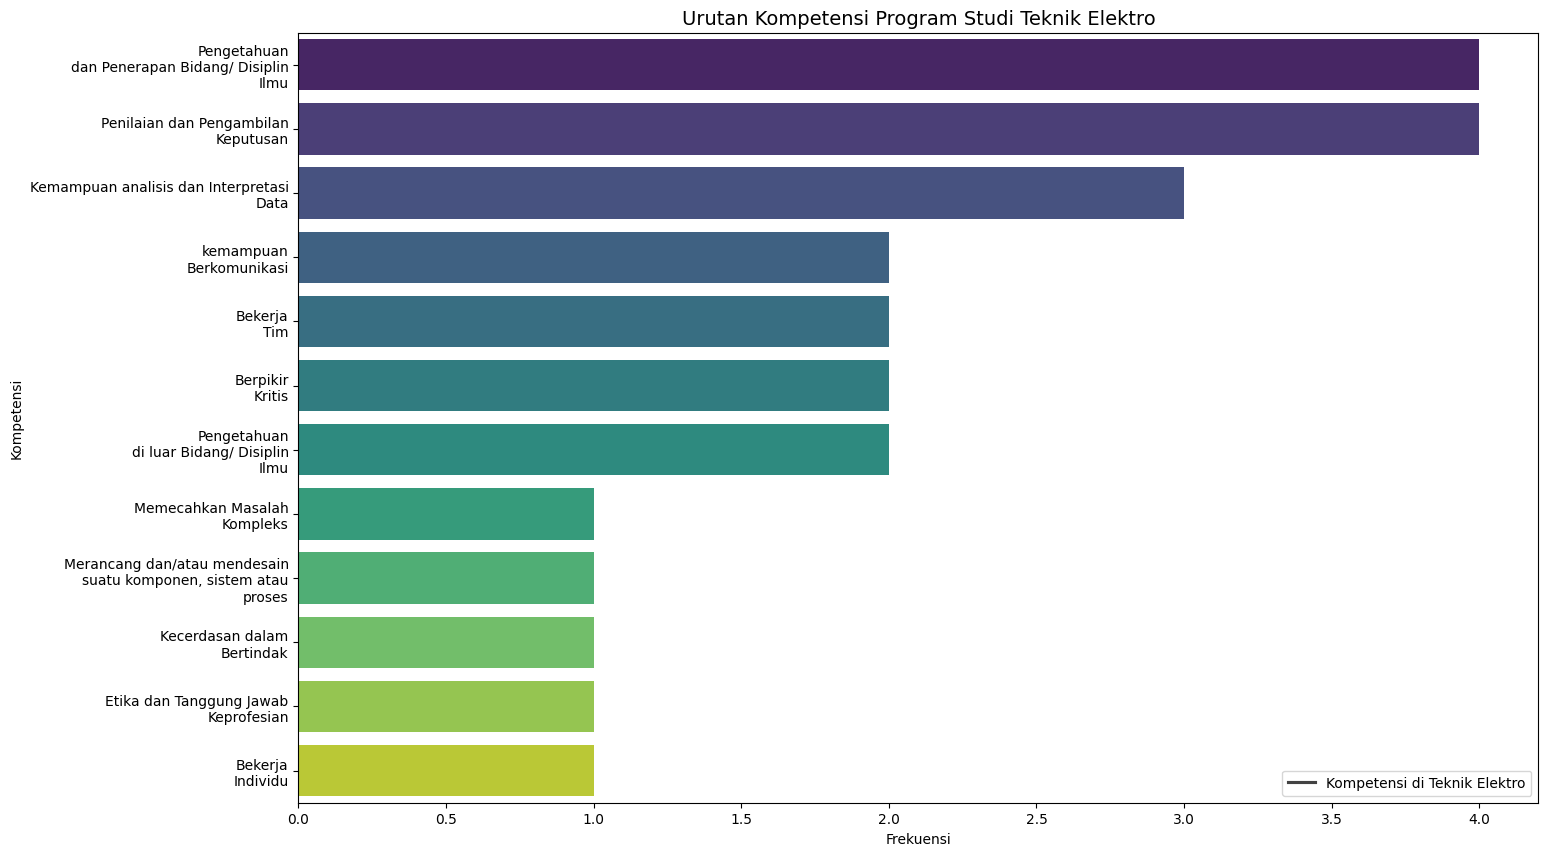

In [32]:
# for j in topthree.Jurusan.unique():
#   show_competencies_count(j)

In [12]:
from google.colab import files

# Replace with the file name you want to download
for j in topthree.Jurusan.unique():
  files.download('D:/{j}_TopCompetencies.png')

FileNotFoundError: Cannot find file: D:/{j}_TopCompetencies.png

# **Data 2015**

## **Weiszfeild**

In [ ]:
import urllib
import numpy as np
import re
import nltk
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Defining the scaling function
def scaling(p):
  p_scaling = []
  for i in p:
    x = (i-1)/(5-1)
    p_scaling.append(x)
  return p_scaling

# Defining the deleting zero function
def delo(vector):
  p = np.array(vector)
  p = np.delete(p, np.where(p == 0))
  return p

# Defining the weight function
def weight(distance):
  distance = np.array(distance)
  # Handling division by zero
  if 0 in distance:
    distance1 = delo(distance)
    dbar = min(distance1)
    idx0 = np.where(distance == 0)[0]
    for i in idx0:
      distance[i] = dbar
  # Getting weight values
  weight = [1/d for d in distance]
  return weight

# Defining Weiszfeld algorithm function
def weiszfeld(p1,T):
  error = 0.00001

  if T == 1: # Scaled
    p = p1
  else:      # Not scaled
    p = scaling(p1)

  x_bar = sum(p)/len(p)
  distance = [abs(x_bar-x) for x in p]
  weight1 = weight(distance)
  x_new = sum([x*w for x,w in zip(p,weight1)]) / sum(weight1)
  while abs(x_new-x_bar) > error:
    x_bar = x_new
    distance = [abs(x_bar-x) for x in p]
    weight1 = weight(distance)
    x_new = sum([x*w for x,w in zip(p,weight1)]) / sum(weight1)
  return x_new

# Defining function to find value of competency
# Using weisfeld algorithm
def value_competency(prodi,df):
  df = df[df['Jurusan']== prodi]

  # Using weiszfeld algorithm to get representative of value of competency
  vc = df.iloc[:,2:25].values
  vc = np.transpose(vc)

  rvc = [] # representative of value of competency using weiszfeld algorithm
  for i in range(23):
    v = weiszfeld(vc[i],0)
    rvc.append(v)
  return rvc

In [ ]:
import gdown

# Load data
file_id = '1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj'
# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'
output = 'competency_all.xlsx'
gdown.download(url, output, quiet=False)

# Load the downloaded Excel file
df = pd.read_excel(output, sheet_name=str("Copy of 5"))
# https://docs.google.com/spreadsheets/d/1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj/edit?gid=456732573#gid=456732573

# Change the column name
df.columns.values[1] = 'Jurusan'
df

Downloading...
From: https://drive.google.com/uc?id=1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj
To: /content/competency_all.xlsx
100%|██████████| 2.18M/2.18M [00:00<00:00, 70.4MB/s]


NIM                       Jurusan  Memecahkan Masalah Kompleks  \
0     12115085           Teknik Pertambangan                            2   
1     13515062            Teknik Informatika                            5   
2     13515133            Teknik Informatika                            5   
3     15115052  Teknik Geodesi dan Geomatika                            5   
4     13515031            Teknik Informatika                            4   
...        ...                           ...                          ...   
2948  13315069                 Teknik Fisika                            4   
2949  10515042                         Kimia                            4   
2950  13615042             Teknik Dirgantara                            4   
2951  10215085                        Fisika                            5   
2952  10115026                    Matematika                            4   

      Berpikir Kritis  Inovasi dan/atau Kreatifitas  \
0                   4                             1   
1                   5                             2   
2                   5                             4   
3                   5                             5   
4                   4                             2   
...               ...                           ...   
2948                4                             4   
2949                4                             4   
2950                5                             2   
2951                5                             5   
2952                4                             4   

      Manajemen Diri dan Orang Lain  Bekerja Tim  Bekerja Individu  \
0                                 2            4                 2   
1                                 4            4                 4   
2                                 2            2                 5   
3                                 4            5                 5   
4                                 4            4                 4   
...                             ...          ...               ...   
2948                              2            2                 4   
2949                              4            4                 4   
2950                              2            4                 5   
2951                              5            5                 5   
2952                              2            2                 4   

      Kecerdasan emosional  Penilaian dan Pengambilan Keputusan  ...  \
0                        4                                    4  ...   
1                        4                                    4  ...   
2                        2                                    4  ...   
3                        2                                    5  ...   
4                        4                                    4  ...   
...                    ...                                  ...  ...   
2948                     4                                    4  ...   
2949                     4                                    4  ...   
2950                     2                                    2  ...   
2951                     5                                    5  ...   
2952                     2                                    2  ...   

      Bekerja dalam Tekanan  Etika dan Tanggung Jawab Keprofesian  \
0                         4                                     4   
1                         5                                     5   
2                         2                                     4   
3                         5                                     5   
4                         4                                     4   
...                     ...                                   ...   
2948                      2                                     4   
2949                      4                                     4   
2950                      2                                     4   
2951                      5  

In [ ]:
listprodi = df['Jurusan'].unique()
listprodi

array(['Teknik Pertambangan', 'Teknik Informatika',
       'Teknik Geodesi dan Geomatika', 'Teknik Elektro', 'Desain Produk',
       'Sistem dan Teknologi Informasi', 'Teknik Perminyakan',
       'Teknik Kimia', 'Sains dan Teknologi Farmasi', 'Matematika',
       'Teknik Dirgantara', 'Teknik Bioenergi dan Kemurgi',
       'Teknik Mesin', 'Teknik Sipil', 'Teknik Industri', 'Kimia',
       'Biologi', 'Manajemen Rekayasa', 'Teknik Telekomunikasi',
       'Manajemen', 'Teknik Fisika', 'Teknik Tenaga Listrik',
       'Teknik Metalurgi', 'Teknik Geofisika', 'Kewirausahaan',
       'Perencanaan Wilayah dan Kota', 'Rekayasa Hayati', 'Arsitektur',
       'Fisika', 'Mikrobiologi', 'Teknik Geologi', 'Teknik Kelautan',
       'Astronomi', 'Teknik Material', 'Teknologi Pasca Panen',
       'Teknik Pangan', 'Rekayasa Kehutanan', 'Teknik Biomedis',
       'Oseanografi', 'Kriya', 'Meteorologi', 'Teknik Lingkungan',
       'Seni Rupa', 'Rekayasa Infrastruktur Lingkungan',
       'Desain Komunikasi Visu

In [ ]:
competencies

array(['Memecahkan Masalah Kompleks', 'Berpikir Kritis',
       'Inovasi dan/atau Kreatifitas', 'Manajemen Diri dan Orang Lain',
       'Bekerja Tim', 'Bekerja Individu', 'Kecerdasan emosional',
       'Penilaian dan Pengambilan Keputusan', 'Negosiasi',
       'Kecerdasan dalam Bertindak', 'Kemampuan Belajar Sepanjang Hayat',
       'Adaptasi dengan Lingkungan',
       'Kejujuran, Loyalitas dan Integritas', 'Bekerja dalam Tekanan',
       'Etika dan Tanggung Jawab Keprofesian', 'kemampuan Berkomunikasi',
       'Pengetahuan dan Penerapan Bidang/ Disiplin Ilmu',
       'Pengetahuan di luar Bidang/ Disiplin Ilmu',
       'Kemampuan analisis dan Interpretasi Data',
       'Kemampuan Administrasi, menuliskan laporan/ Dokumen/ Hasil Penelitian atau Pekerjaan',
       'Kemampuan Menggunakan Teknologi Informasi',
       'Merancang dan/atau mendesain suatu komponen, sistem atau proses',
       'Kemampuan Bahasa Asing'], dtype=object)

In [ ]:
import itertools

# Membuat kombinasi Cartesian antara program studi dan kompetensi
combinations = list(itertools.product(listprodi, competencies))

# Membuat dataframe
all = pd.DataFrame(combinations, columns=['Jurusan', 'Competencies'])

all['Weiszfeild'] = ''

for prodi in listprodi:
  all.loc[all['Jurusan'] == prodi, 'Weiszfeild'] = value_competency(prodi, df)
all

Jurusan                                       Competencies  \
0     Teknik Pertambangan                        Memecahkan Masalah Kompleks   
1     Teknik Pertambangan                                    Berpikir Kritis   
2     Teknik Pertambangan                       Inovasi dan/atau Kreatifitas   
3     Teknik Pertambangan                      Manajemen Diri dan Orang Lain   
4     Teknik Pertambangan                                        Bekerja Tim   
...                   ...                                                ...   
1122   Rekayasa Pertanian           Kemampuan analisis dan Interpretasi Data   
1123   Rekayasa Pertanian  Kemampuan Administrasi, menuliskan laporan/ Do...   
1124   Rekayasa Pertanian          Kemampuan Menggunakan Teknologi Informasi   
1125   Rekayasa Pertanian  Merancang dan/atau mendesain suatu komponen, s...   
1126   Rekayasa Pertanian                             Kemampuan Bahasa Asing   

     Weiszfeild  
0      0.750003  
1      0.750038  
2          0.75  
3      0.750002  
4      0.750015  
...         ...  
1122   0.750006  
1123   0.750014  
1124   0.750011  
1125   0.750003  
1126   0.749999  

[1127 rows x 3 columns]

In [ ]:
merged_df = pd.merge(data, all, on=['Jurusan', 'Competencies'], how='inner')
merged_df

Unnamed: 0 Fakultas          Jurusan  \
0               0     SITH     Mikrobiologi   
1               1     SITH     Mikrobiologi   
2               2     SITH     Mikrobiologi   
3               3     SITH     Mikrobiologi   
4               4     SITH     Mikrobiologi   
...           ...      ...              ...   
10092       10230      FTI  Teknik Industri   
10093       10231      FTI  Teknik Industri   
10094       10232      FTI  Teknik Industri   
10095       10233      FTI  Teknik Industri   
10096       10234      FTI  Teknik Industri   

                                            Competencies  \
0                            Memecahkan Masalah Kompleks   
1                                        Berpikir Kritis   
2                           Inovasi dan/atau Kreatifitas   
3                          Manajemen Diri dan Orang Lain   
4                                            Bekerja Tim   
...                                                  ...   
10092           Kemampuan analisis dan Interpretasi Data   
10093  Kemampuan Administrasi, menuliskan laporan/ Do...   
10094          Kemampuan Menggunakan Teknologi Informasi   
10095  Merancang dan/atau mendesain suatu komponen, s...   
10096                             Kemampuan Bahasa Asing   

                                                      LO    dist  \
0      Every microbiology student have an ability to ...  0.2286   
1      Every microbiology student have an ability to ...  0.1659   
2      Every microbiology student have an ability to ...  0.0593   
3      Every microbiology student have an ability to ...  0.1186   
4      Every microbiology student have an ability to ...  0.1447   
...                                                  ...     ...   
10092  Every industrial engineering student have an a...  0.3251   
10093  Every industrial engineering student have an a...  0.2647   
10094  Every industrial engineering student have an a...  0.2946   
10095  Every industrial engineering student have an a...  0.2012   
10096  Every industrial engineering student have an a...  0.2105   

       normalized_dist Weiszfeild  
0               0.0758       0.75  
1               0.0550   0.750004  
2               0.0197       0.75  
3               0.0393       0.75  
4               0.0480       0.75  
...                ...        ...  
10092           0.0588   0.750005  
10093           0.0478   0.750011  
10094           0.0532    0.75001  
10095           0.0364   0.750004  
10096           0.0380       0.75  

[10097 rows x 8 columns]

In [ ]:
translate = {}
# https://docs.google.com/spreadsheets/d/1SlzxU-xPxfU5-sMbJpogpQEmXb4ntX-gi4kqCAcqh0o/edit?gid=0#gid=0
data_translate = pd.read_csv("https://docs.google.com/spreadsheets/d/1SlzxU-xPxfU5-sMbJpogpQEmXb4ntX-gi4kqCAcqh0o/export?format=csv&gid=0")
for i in range(len(data_translate)):
  row = data_translate.iloc[i]
  translate[row["Inggris"]] = row["Indo"]

In [ ]:
def cos_similarity(jurusan):
  selected = merged_df[merged_df["Jurusan"]==jurusan]
  score = {}
  for LO in selected['LO']:
    selected_LO = selected[selected["LO"]==LO]
    dot = np.dot(selected_LO['dist'],selected_LO['Weiszfeild'])
    norm_dist = np.dot(selected_LO['dist'],selected_LO['dist'])
    norm_weisz = np.dot(selected_LO['Weiszfeild'],selected_LO['Weiszfeild'])
    cos = dot/((norm_dist*norm_weisz)**0.5)
    score[translate[LO]] = cos
  return score

In [ ]:
cos_similarity('Mikrobiologi')

{'Memahami dasar-dasar mikrobiologi dan keterkaitannya dengan matematika dan ilmu pengetahuan alam': 0.8632344804350536,
 'Mengenal keterkaitan antara mikrobiologi dengan big data analysis, artificial intellegence, dan computational thinking': 0.84266517050877,
 'Memahami evolusi pada sel prokariot, proses adaptasi, ketahanan dan diversitasnya, serta dampaknya bagi lingkungan': 0.8132943132422903,
 'Memahami struktur dan fungsi pada sel': 0.9088993533593334,
 'Memahami proses metabolisme mikroba yang terkait dengan energi dan kegunaannya untuk ketahanan, pertumbuhan, serta interaksinya dengan lingkungan': 0.7877687192426086,
 'Memahami alur informasi genetik dan respon terhadap lingkungan': 0.9043868387580073,
 'Memahami sistem mikroba dalam kaitannya dengan diversitas dan dinamika ekosistem': 0.7641751929642211,
 'Memahami dampak mikroorganisme dalam kehidupan': 0.8694435749517678,
 'Mampu menerapkan metode yang berkaitan dengan konsep mikrobiologi dan mengoperasikan peralatan standar

In [ ]:
results = []
for jurusan in listprodi:
    cos_scores = cos_similarity(jurusan)
    # Append results to list with format [(jurusan, LO, cos_score)]
    for LO, score in cos_scores.items():
        results.append((jurusan, LO, score))

database = pd.DataFrame(results, columns=['Jurusan', 'LO', 'Cosine Similarity'])
database

Jurusan                                                 LO  \
0    Teknik Pertambangan  Every mining engineering student have an abili...   
1    Teknik Pertambangan  Every mining engineering student have an abili...   
2    Teknik Pertambangan  Every mining engineering student have an abili...   
3    Teknik Pertambangan  Every mining engineering student have an abili...   
4    Teknik Pertambangan  Every mining engineering student have an abili...   
..                   ...                                                ...   
434   Rekayasa Pertanian  Every agricultural engineering student have an...   
435   Rekayasa Pertanian  Every agricultural engineering student have an...   
436   Rekayasa Pertanian  Every agricultural engineering student have an...   
437   Rekayasa Pertanian  Every agricultural engineering student have an...   
438   Rekayasa Pertanian  Every agricultural engineering student have an...   

     Cosine Similarity  
0             0.890090  
1             0.910623  
2             0.855195  
3             0.947872  
4             0.928203  
..                 ...  
434           0.913860  
435           0.910474  
436           0.909212  
437           0.939599  
438           0.874149  

[439 rows x 3 columns]

In [ ]:
database[database['Jurusan']]

In [ ]:
def show_cos_similarity(jurusan):
  datagacor = database[database['Jurusan'] == jurusan].sort_values('Cosine Similarity',ascending=True)
  los = list(datagacor['LO'])
  css = list(datagacor['Cosine Similarity'])
  los2 = []
  for idx,lo in enumerate(los):
    k = len(lo)
    spaces = []
    for i in range(k):
      if lo[i] == " ":
        spaces.append(i)

    for i in range(len(spaces)-1,-1,-6):
      lo = lo[:spaces[i]] + "\n" + lo[spaces[i]+1:]
    los2.append(lo)

  plt.figure(figsize=[16,14])

  plt.barh(los2,css)
  plt.title(jurusan, fontsize=14) # Adjust fontsize as needed
  # TODO rapihin
  # Show the plot
  plt.show()

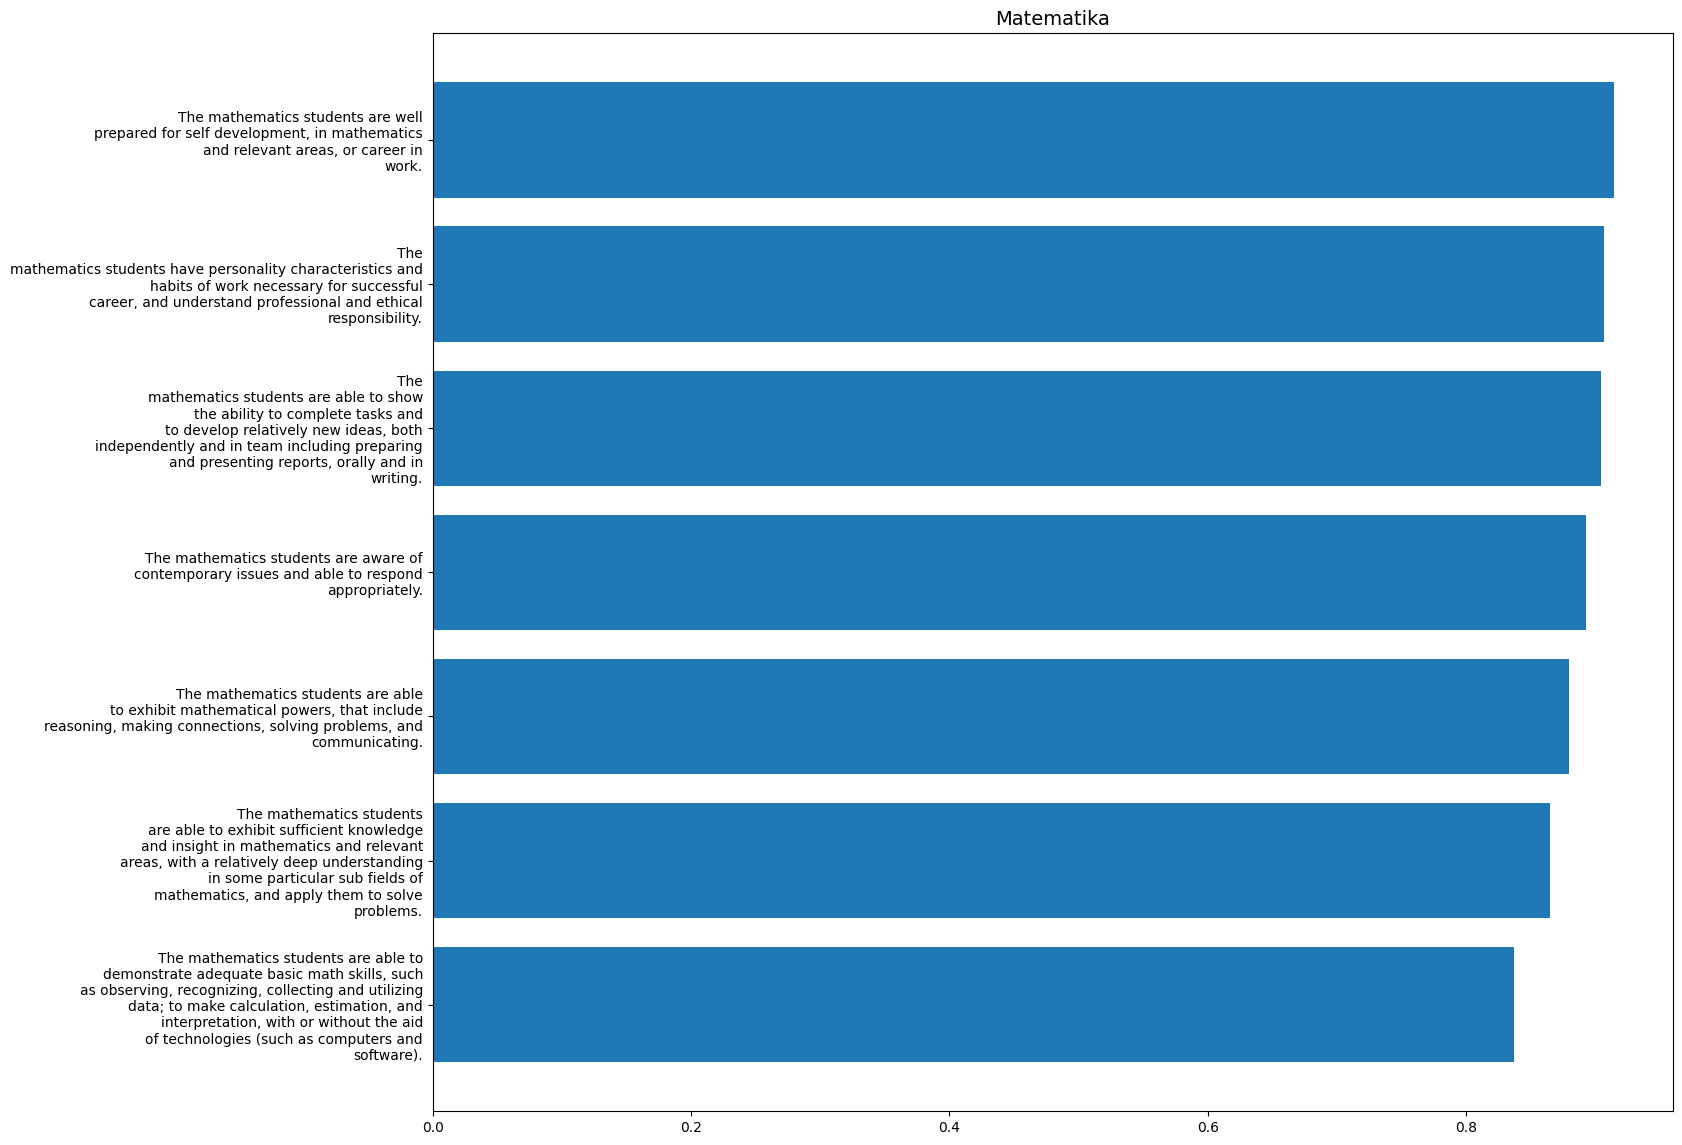

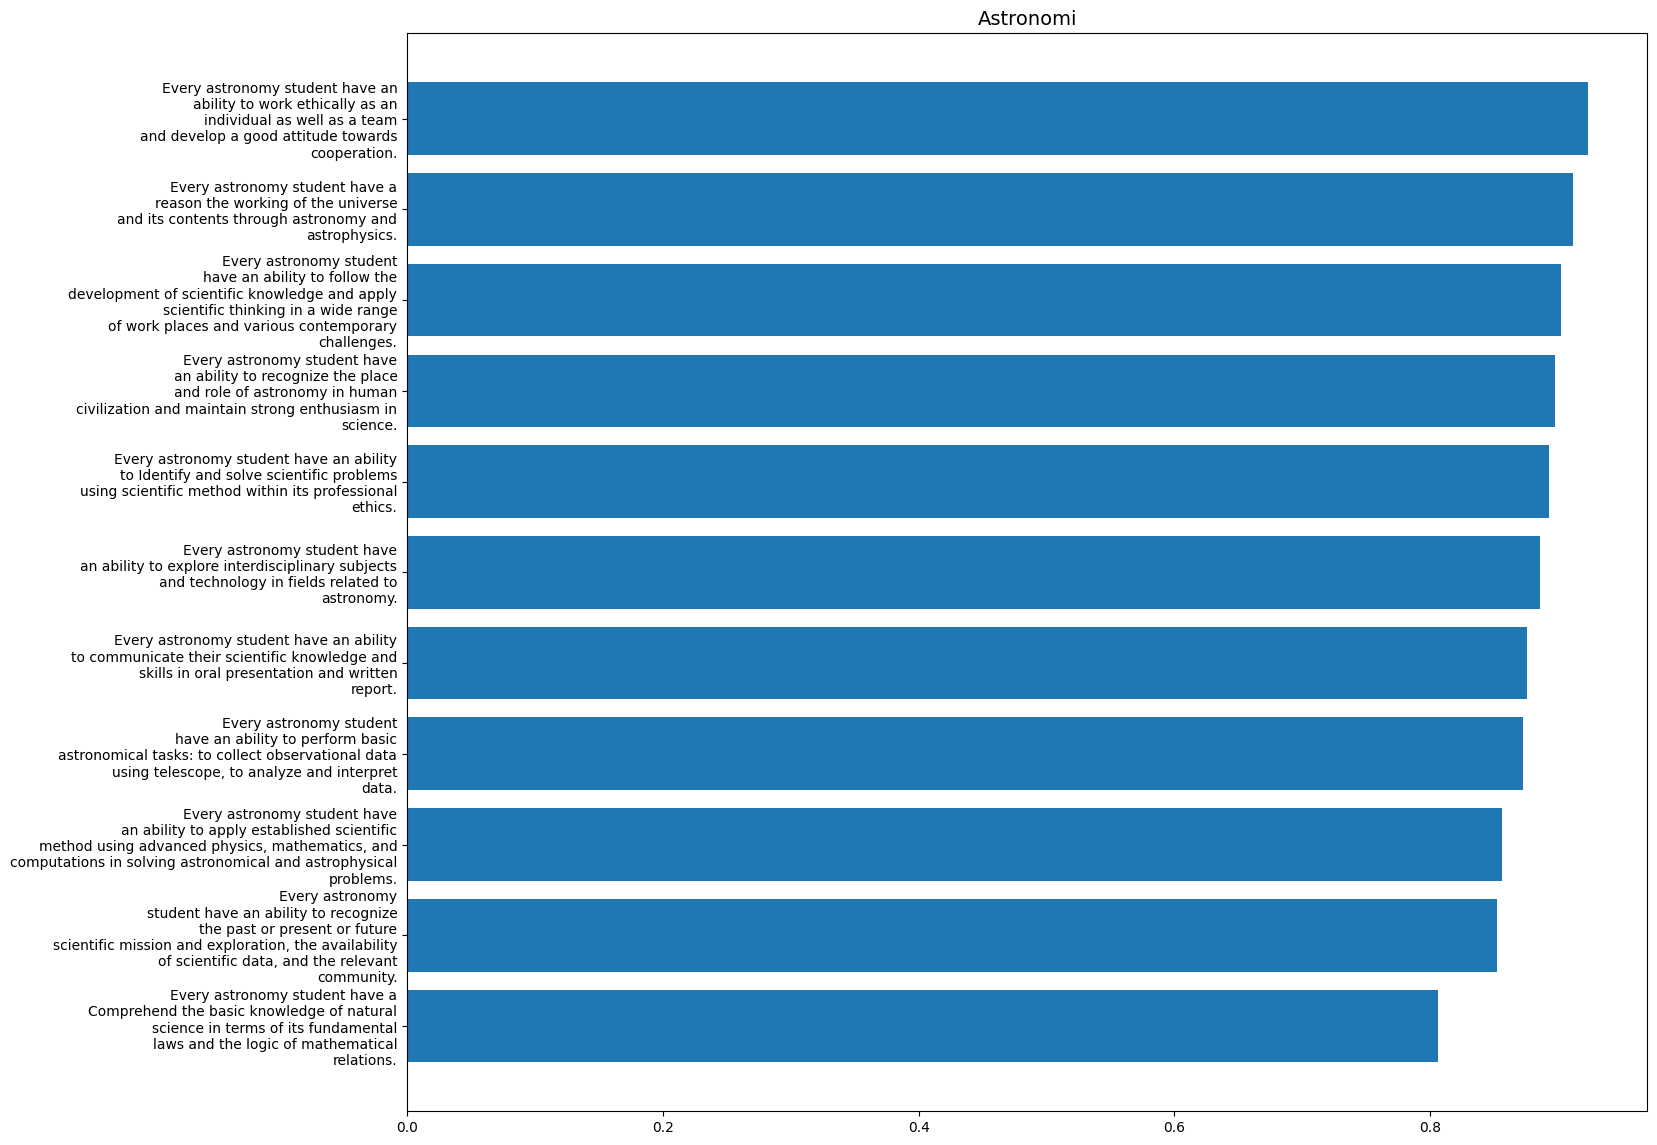

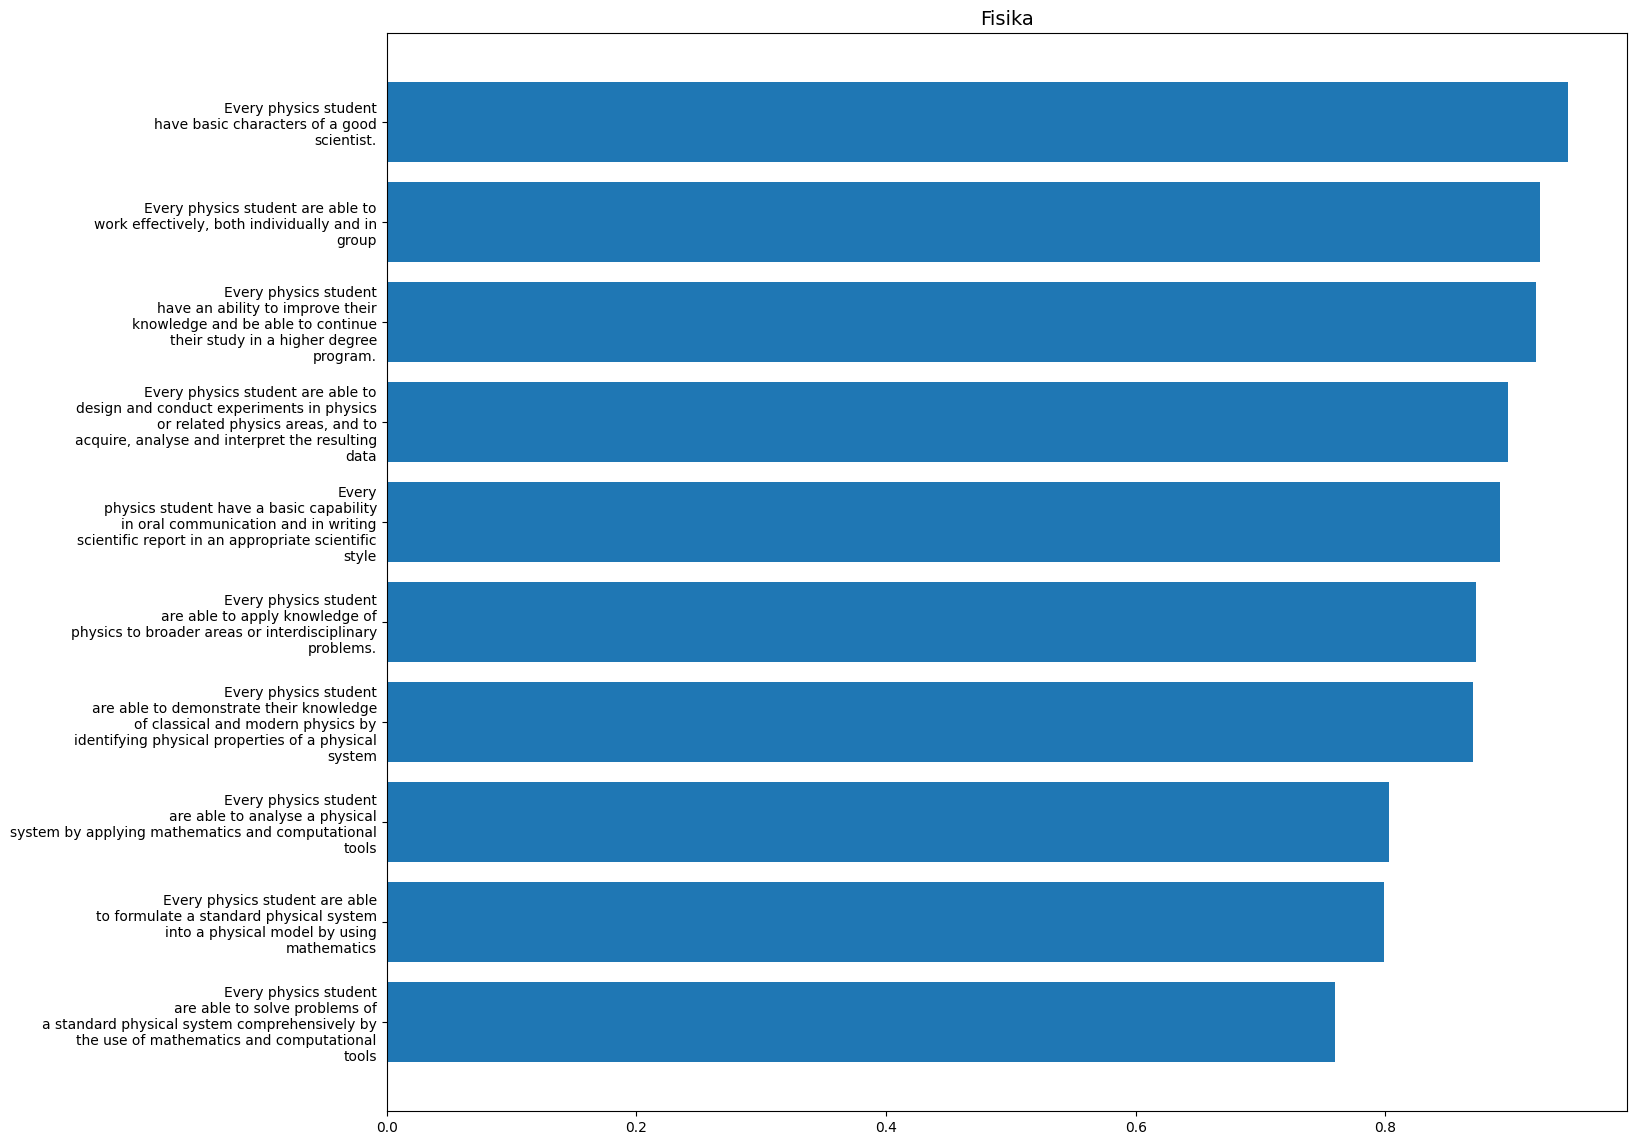

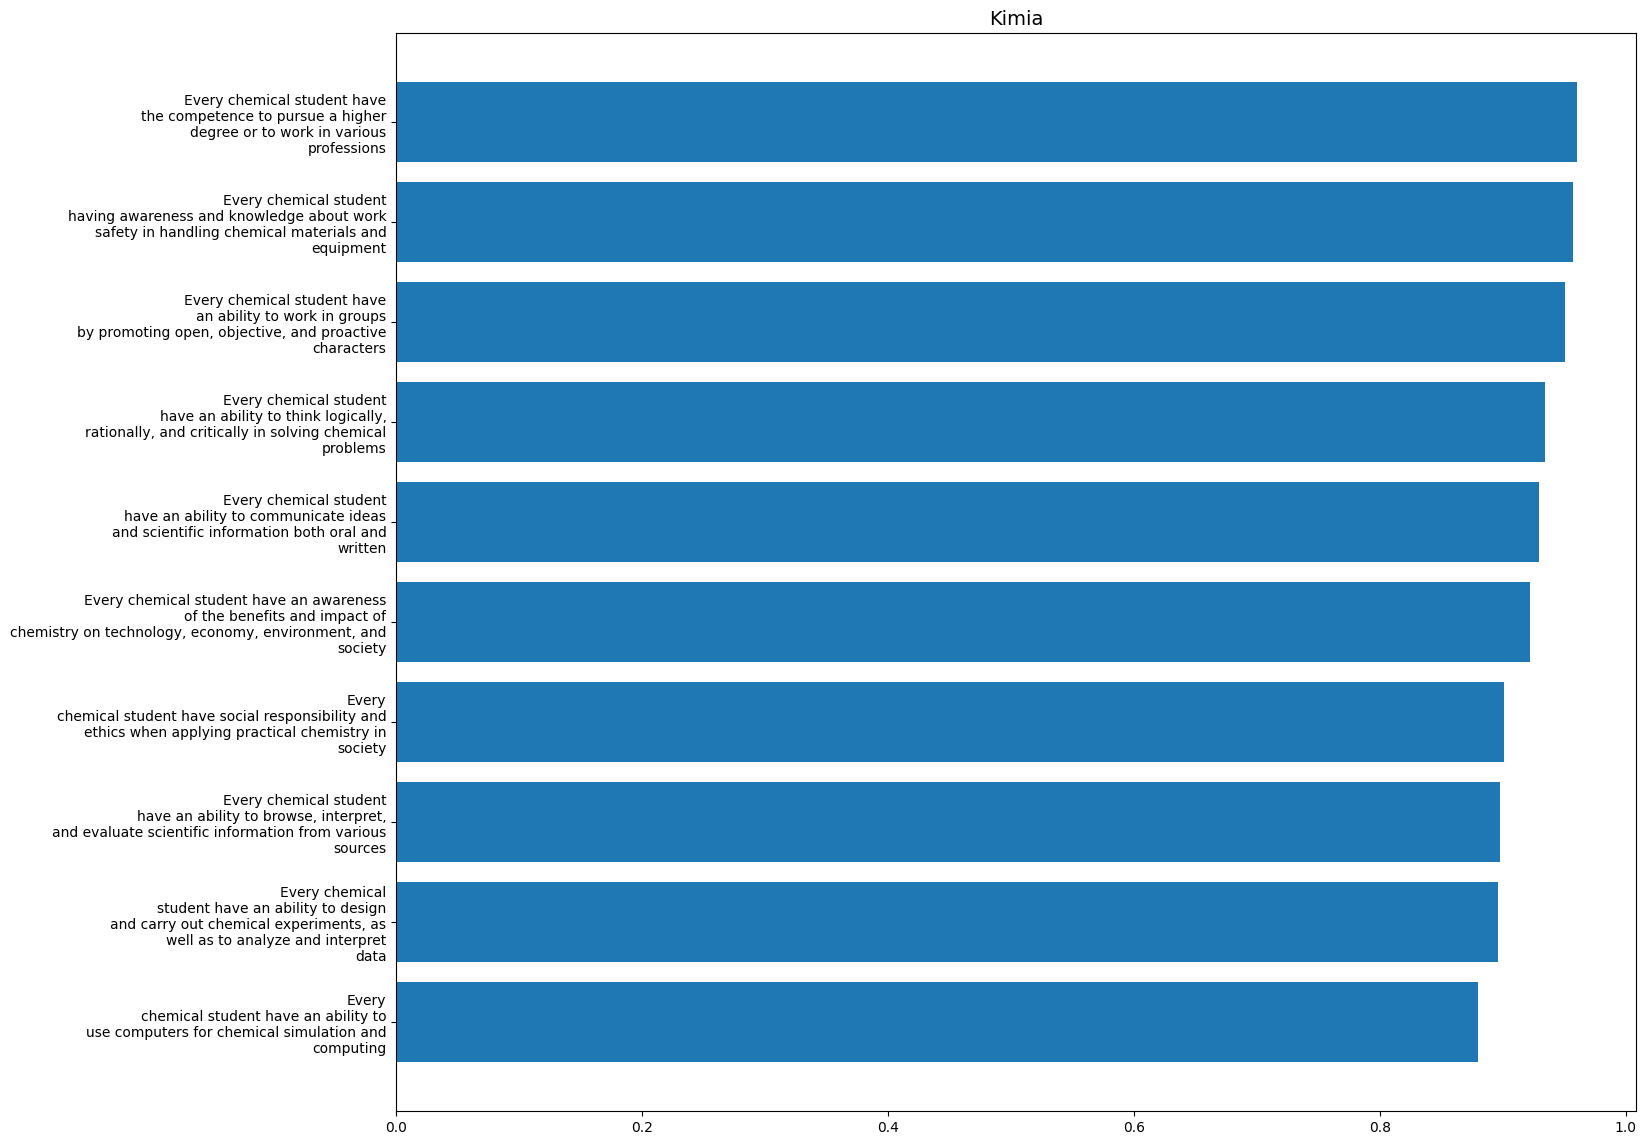

In [ ]:
show_cos_similarity("Matematika")
show_cos_similarity("Astronomi")
show_cos_similarity("Fisika")
show_cos_similarity("Kimia")

# **Data 2016**

## **Weiszfeild**

In [ ]:
import urllib
import numpy as np
import re
import nltk
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Defining the scaling function
def scaling(p):
  p_scaling = []
  for i in p:
    x = (i-1)/(5-1)
    p_scaling.append(x)
  return p_scaling

# Defining the deleting zero function
def delo(vector):
  p = np.array(vector)
  p = np.delete(p, np.where(p == 0))
  return p

# Defining the weight function
def weight(distance):
  distance = np.array(distance)
  # Handling division by zero
  if 0 in distance:
    distance1 = delo(distance)
    dbar = min(distance1)
    idx0 = np.where(distance == 0)[0]
    for i in idx0:
      distance[i] = dbar
  # Getting weight values
  weight = [1/d for d in distance]
  return weight

# Defining Weiszfeld algorithm function
def weiszfeld(p1,T):
  error = 0.00001

  if T == 1: # Scaled
    p = p1
  else:      # Not scaled
    p = scaling(p1)

  x_bar = sum(p)/len(p)
  distance = [abs(x_bar-x) for x in p]
  weight1 = weight(distance)
  x_new = sum([x*w for x,w in zip(p,weight1)]) / sum(weight1)
  while abs(x_new-x_bar) > error:
    x_bar = x_new
    distance = [abs(x_bar-x) for x in p]
    weight1 = weight(distance)
    x_new = sum([x*w for x,w in zip(p,weight1)]) / sum(weight1)
  return x_new

# Defining function to find value of competency
# Using weisfeld algorithm
def value_competency(prodi,df):
  df = df[df['Jurusan']== prodi]

  # Using weiszfeld algorithm to get representative of value of competency
  vc = df.iloc[:,2:25].values
  vc = np.transpose(vc)

  rvc = [] # representative of value of competency using weiszfeld algorithm
  for i in range(23):
    v = weiszfeld(vc[i],0)
    rvc.append(v)
  return rvc

In [ ]:
import gdown

# Load data
file_id = '1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj'
# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'
output = 'competency_all.xlsx'
gdown.download(url, output, quiet=False)

# Load the downloaded Excel file
df = pd.read_excel(output, sheet_name=str("Copy of 16"))
# https://docs.google.com/spreadsheets/d/1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj/edit?gid=456732573#gid=456732573

# Change the column name
df.columns.values[1] = 'Jurusan'
df

Downloading...
From: https://drive.google.com/uc?id=1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj
To: /content/competency_all.xlsx
100%|██████████| 2.18M/2.18M [00:00<00:00, 150MB/s]


NIM                         Jurusan  Memecahkan Masalah Kompleks  \
0     13416601                 Teknik Industri                            4   
1     13416602                 Teknik Industri                            4   
2     10216026                          Fisika                            5   
3     10216032                          Fisika                            4   
4     10216033                          Fisika                            4   
...        ...                             ...                          ...   
3013  17316020                 Desain Interior                            5   
3014  13616043               Teknik Dirgantara                            4   
3015  18216022  Sistem dan Teknologi Informasi                            4   
3016  13216038                  Teknik Elektro                            5   
3017  13216074                  Teknik Elektro                            2   

      Berpikir Kritis  Inovasi dan/atau Kreatifitas  \
0                   4                             4   
1                   4                             4   
2                   5                             5   
3                   4                             4   
4                   5                             1   
...               ...                           ...   
3013                4                             4   
3014                4                             4   
3015                4                             5   
3016                4                             4   
3017                2                             2   

      Manajemen Diri dan Orang Lain  Bekerja Tim  Bekerja Individu  \
0                                 4            4                 4   
1                                 4            4                 4   
2                                 5            5                 5   
3                                 4            4                 4   
4                                 4            2                 5   
...                             ...          ...               ...   
3013                              2            4                 5   
3014                              4            4                 4   
3015                              4            4                 4   
3016                              5            5                 5   
3017                              2            2                 4   

      Kecerdasan dalam Bertindak  Penilaian dan Pengambilan Keputusan  ...  \
0                              4                                    2  ...   
1                              4                                    4  ...   
2                              5                                    5  ...   
3                              4                                    4  ...   
4                              4                                    2  ...   
...                          ...                                  ...  ...   
3013                           5                                    4  ...   
3014                           4                                    4  ...   
3015                           4                                    4  ...   
3016                           5                                    5  ...   
3017                           2                                    1  ...   

      Bekerja dalam Tekanan  Etika dan Tanggung Jawab Keprofesian  \
0                         5                                     5   
1                         4                                     4   
2                         4                                     5   
3                         4                                     4   
4                         2                                     2   
...                     ...                                   ...   
3013                      4                                     5   
3014                      4                                     4   
30

In [ ]:
listprodi = df['Jurusan'].unique()
listprodi

array(['Teknik Industri', 'Fisika', 'Astronomi', 'Mikrobiologi', 'Kimia',
       'Biologi', 'Sains dan Teknologi Farmasi', 'Matematika',
       'Teknik Mesin', 'Rekayasa Hayati', 'Rekayasa Pertanian',
       'Rekayasa Kehutanan', 'Farmasi Klinik dan Komunitas',
       'Teknologi Pasca Panen', 'Teknik Geologi', 'Teknik Pertambangan',
       'Teknik Perminyakan', 'Teknik Geofisika', 'Teknik Metalurgi',
       'Meteorologi', 'Oseanografi', 'Teknik Kimia', 'Teknik Elektro',
       'Teknik Fisika', 'Teknik Informatika', 'Teknik Dirgantara',
       'Teknik Material', 'Teknik Pangan', 'Manajemen Rekayasa',
       'Teknik Bioenergi dan Kemurgi', 'Teknik Sipil',
       'Teknik Geodesi dan Geomatika', 'Arsitektur', 'Teknik Lingkungan',
       'Perencanaan Wilayah dan Kota', 'Teknik Kelautan',
       'Rekayasa Infrastruktur Lingkungan',
       'Teknik dan Pengelolaan Sumber Daya Air', 'Seni Rupa', 'Kriya',
       'Desain Interior', 'Desain Komunikasi Visual', 'Desain Produk',
       'Teknik Tenag

In [ ]:
competencies

array(['Memecahkan Masalah Kompleks', 'Berpikir Kritis',
       'Inovasi dan/atau Kreatifitas', 'Manajemen Diri dan Orang Lain',
       'Bekerja Tim', 'Bekerja Individu', 'Kecerdasan emosional',
       'Penilaian dan Pengambilan Keputusan', 'Negosiasi',
       'Kecerdasan dalam Bertindak', 'Kemampuan Belajar Sepanjang Hayat',
       'Adaptasi dengan Lingkungan',
       'Kejujuran, Loyalitas dan Integritas', 'Bekerja dalam Tekanan',
       'Etika dan Tanggung Jawab Keprofesian', 'kemampuan Berkomunikasi',
       'Pengetahuan dan Penerapan Bidang/ Disiplin Ilmu',
       'Pengetahuan di luar Bidang/ Disiplin Ilmu',
       'Kemampuan analisis dan Interpretasi Data',
       'Kemampuan Administrasi, menuliskan laporan/ Dokumen/ Hasil Penelitian atau Pekerjaan',
       'Kemampuan Menggunakan Teknologi Informasi',
       'Merancang dan/atau mendesain suatu komponen, sistem atau proses',
       'Kemampuan Bahasa Asing'], dtype=object)

In [ ]:
import itertools

# Membuat kombinasi Cartesian antara program studi dan kompetensi
combinations = list(itertools.product(listprodi, competencies))

# Membuat dataframe
all = pd.DataFrame(combinations, columns=['Jurusan', 'Competencies'])

all['Weiszfeild'] = ''

for prodi in listprodi:
  all.loc[all['Jurusan'] == prodi, 'Weiszfeild'] = value_competency(prodi, df)
all

Jurusan                                       Competencies  \
0     Teknik Industri                        Memecahkan Masalah Kompleks   
1     Teknik Industri                                    Berpikir Kritis   
2     Teknik Industri                       Inovasi dan/atau Kreatifitas   
3     Teknik Industri                      Manajemen Diri dan Orang Lain   
4     Teknik Industri                                        Bekerja Tim   
...               ...                                                ...   
1122    Kewirausahaan           Kemampuan analisis dan Interpretasi Data   
1123    Kewirausahaan  Kemampuan Administrasi, menuliskan laporan/ Do...   
1124    Kewirausahaan          Kemampuan Menggunakan Teknologi Informasi   
1125    Kewirausahaan  Merancang dan/atau mendesain suatu komponen, s...   
1126    Kewirausahaan                             Kemampuan Bahasa Asing   

     Weiszfeild  
0      0.750003  
1      0.750003  
2      0.749999  
3      0.750002  
4       0.75001  
...         ...  
1122   0.750001  
1123       0.75  
1124   0.750007  
1125   0.749997  
1126   0.750005  

[1127 rows x 3 columns]

In [ ]:
merged_df = pd.merge(data, all, on=['Jurusan', 'Competencies'], how='inner')
merged_df

Unnamed: 0 Fakultas          Jurusan  \
0               0     SITH     Mikrobiologi   
1               1     SITH     Mikrobiologi   
2               2     SITH     Mikrobiologi   
3               3     SITH     Mikrobiologi   
4               4     SITH     Mikrobiologi   
...           ...      ...              ...   
10092       10230      FTI  Teknik Industri   
10093       10231      FTI  Teknik Industri   
10094       10232      FTI  Teknik Industri   
10095       10233      FTI  Teknik Industri   
10096       10234      FTI  Teknik Industri   

                                            Competencies  \
0                            Memecahkan Masalah Kompleks   
1                                        Berpikir Kritis   
2                           Inovasi dan/atau Kreatifitas   
3                          Manajemen Diri dan Orang Lain   
4                                            Bekerja Tim   
...                                                  ...   
10092           Kemampuan analisis dan Interpretasi Data   
10093  Kemampuan Administrasi, menuliskan laporan/ Do...   
10094          Kemampuan Menggunakan Teknologi Informasi   
10095  Merancang dan/atau mendesain suatu komponen, s...   
10096                             Kemampuan Bahasa Asing   

                                                      LO    dist  \
0      Every microbiology student have an ability to ...  0.2286   
1      Every microbiology student have an ability to ...  0.1659   
2      Every microbiology student have an ability to ...  0.0593   
3      Every microbiology student have an ability to ...  0.1186   
4      Every microbiology student have an ability to ...  0.1447   
...                                                  ...     ...   
10092  Every industrial engineering student have an a...  0.3251   
10093  Every industrial engineering student have an a...  0.2647   
10094  Every industrial engineering student have an a...  0.2946   
10095  Every industrial engineering student have an a...  0.2012   
10096  Every industrial engineering student have an a...  0.2105   

       normalized_dist Weiszfeild  
0               0.0758   0.750001  
1               0.0550   0.750009  
2               0.0197       0.75  
3               0.0393       0.75  
4               0.0480   0.750002  
...                ...        ...  
10092           0.0588   0.750015  
10093           0.0478   0.750004  
10094           0.0532   0.750008  
10095           0.0364   0.750002  
10096           0.0380   0.749999  

[10097 rows x 8 columns]

In [ ]:
def cos_similarity(jurusan):
  selected = merged_df[merged_df["Jurusan"]==jurusan]
  score = {}
  for LO in selected['LO']:
    selected_LO = selected[selected["LO"]==LO]
    dot = np.dot(selected_LO['dist'],selected_LO['Weiszfeild'])
    norm_dist = np.dot(selected_LO['dist'],selected_LO['dist'])
    norm_weisz = np.dot(selected_LO['Weiszfeild'],selected_LO['Weiszfeild'])
    cos = dot/((norm_dist*norm_weisz)**0.5)
    score[LO] = cos
  return score

In [ ]:
cos_similarity('Matematika')

{'The mathematics students are able to exhibit sufficient knowledge and insight in mathematics and relevant areas, with a relatively deep understanding in some particular sub fields of mathematics, and apply them to solve problems.': 0.8708510713263111,
 'The mathematics students are able to demonstrate adequate basic math skills, such as observing, recognizing, collecting and utilizing data; to make calculation, estimation, and interpretation, with or without the aid of technologies (such as computers and software).': 0.839472840951536,
 'The mathematics students are able to exhibit mathematical powers, that include reasoning, making connections, solving problems, and communicating.': 0.8877146402602999,
 'The mathematics students are able to show the ability to complete tasks and to develop relatively new ideas, both independently and in team including preparing and presenting reports, orally and in writing.': 0.9068663216887637,
 'The mathematics students have personality characteri

In [ ]:
results = []
for jurusan in listprodi:
    cos_scores = cos_similarity(jurusan)
    # Append results to list with format [(jurusan, LO, cos_score)]
    for LO, score in cos_scores.items():
        results.append((jurusan, LO, score))

database = pd.DataFrame(results, columns=['Jurusan', 'LO', 'Cosine Similarity'])
database

Jurusan                                                 LO  \
0    Teknik Industri  Every industrial engineering student have an a...   
1    Teknik Industri  Every industrial engineering student have an a...   
2    Teknik Industri  Every industrial engineering student have an a...   
3    Teknik Industri  Every industrial engineering student have an a...   
4    Teknik Industri  Every industrial engineering student have an a...   
..               ...                                                ...   
434    Kewirausahaan  Every entrepreneurship student Have the abilit...   
435    Kewirausahaan  Every entrepreneurship student Have an underst...   
436    Kewirausahaan  Every entrepreneurship student Able to have in...   
437    Kewirausahaan  Every entrepreneurship student Able to develop...   
438    Kewirausahaan  Every entrepreneurship student Able to analyze...   

     Cosine Similarity  
0             0.919109  
1             0.913505  
2             0.872241  
3             0.795503  
4             0.899906  
..                 ...  
434           0.920782  
435           0.912433  
436           0.930569  
437           0.899861  
438           0.898834  

[439 rows x 3 columns]

In [ ]:
def show_cos_similarity(jurusan):
  datagacor = database[database['Jurusan'] == jurusan].sort_values('Cosine Similarity',ascending=True)
  los = list(datagacor['LO'])
  css = list(datagacor['Cosine Similarity'])
  los2 = []

  for lo in los:
    nlo = lo
    spaces = []

    lcount = 0
    for i in range(len(lo)):
      lcount += 1
      if lcount > 50 and lo[i] == " ":
        spaces.append(i)
        lcount = 0

    # for i in range(len(lo)):
    #   if lo[i] == " ":
    #     spaces.append(i)

      for i in range(len(spaces)):
        nlo = nlo[:(spaces[i])] + "#" + nlo[(spaces[i]+1):]

    los2.append(nlo.replace("#","\n"))

  plt.figure(figsize=[16,14])

  plt.barh(los2,css)
  plt.title(jurusan, fontsize=14) # Adjust fontsize as needed
  # TODO rapihin
  # Show the plot
  plt.show()

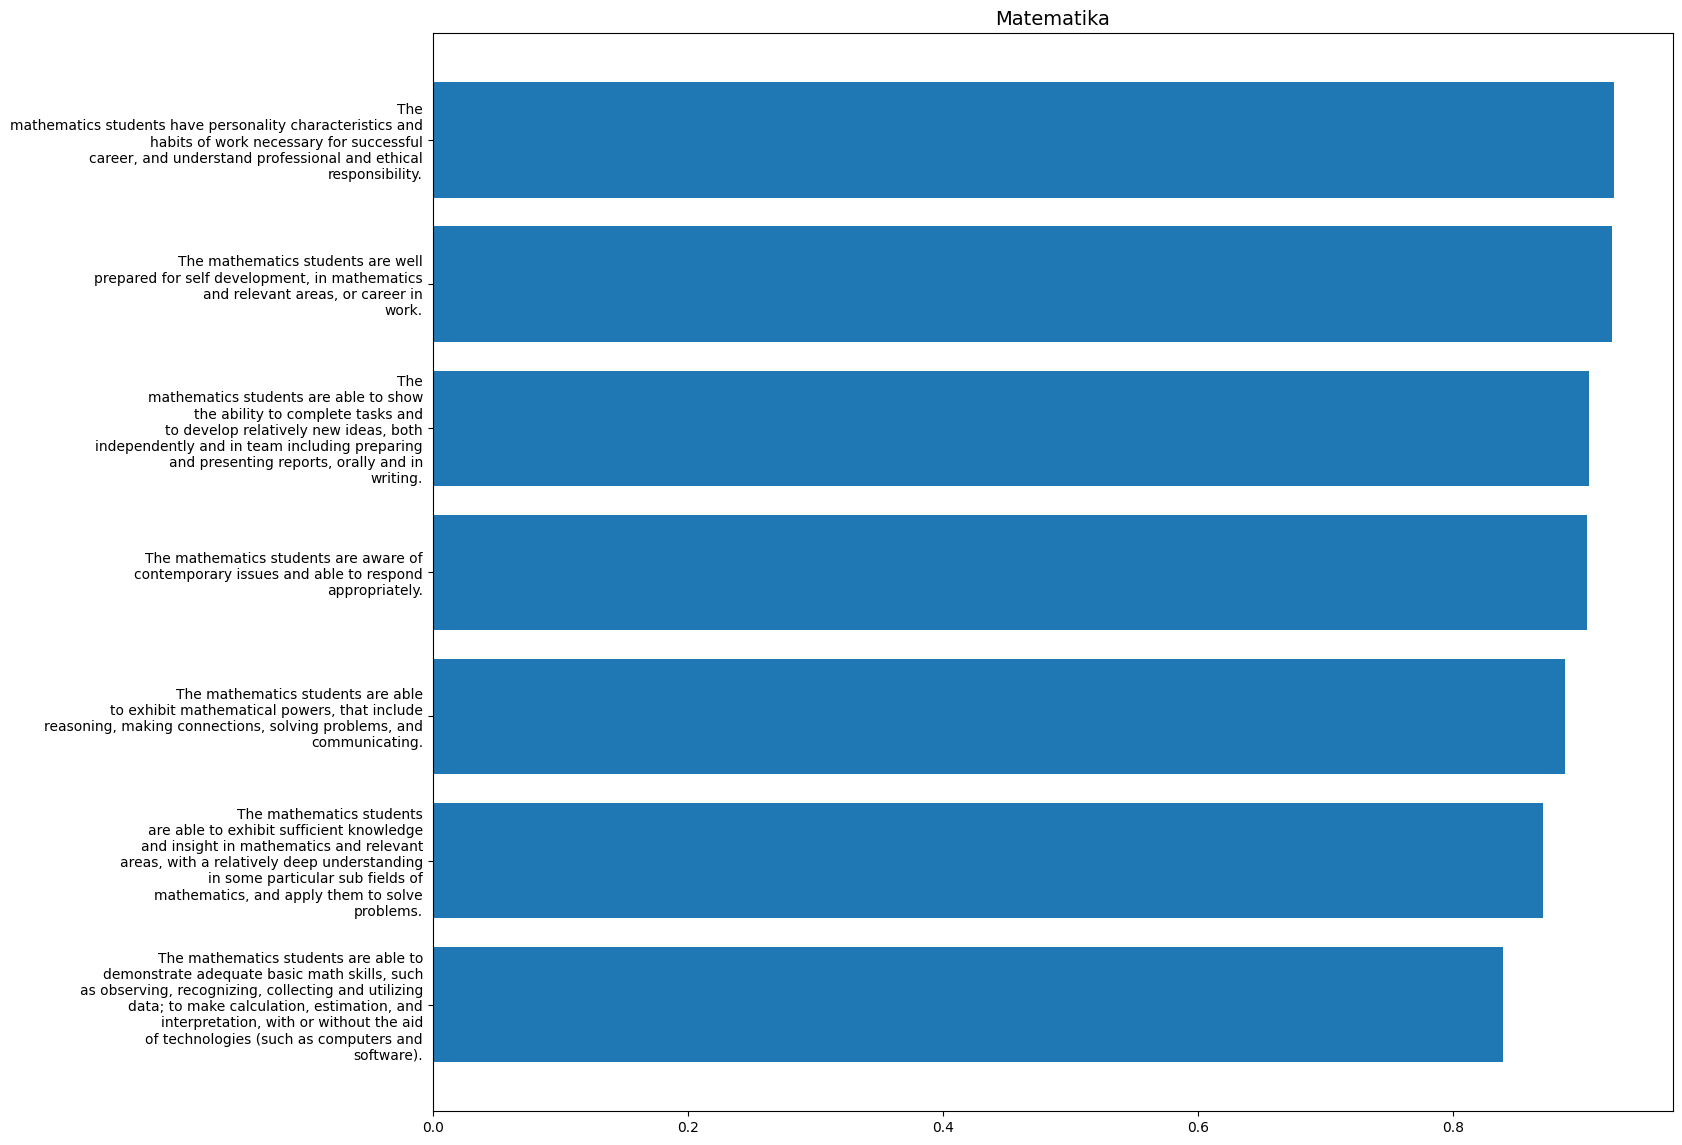

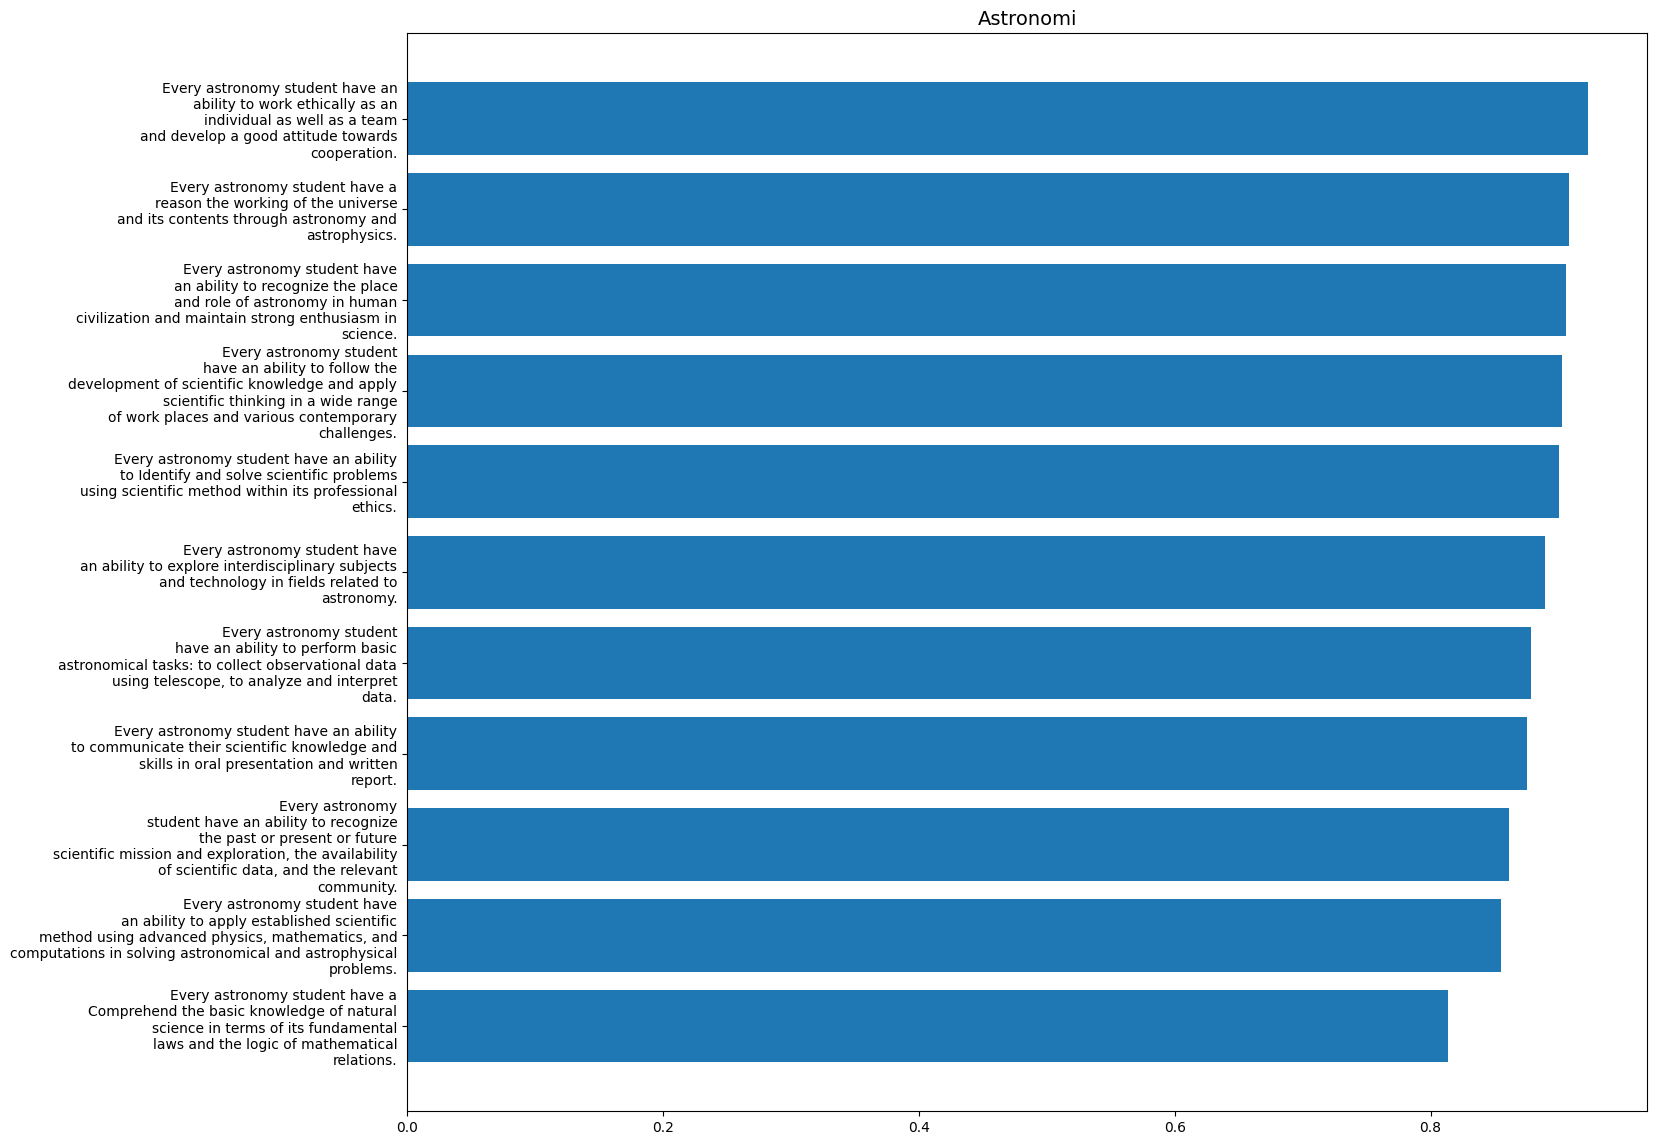

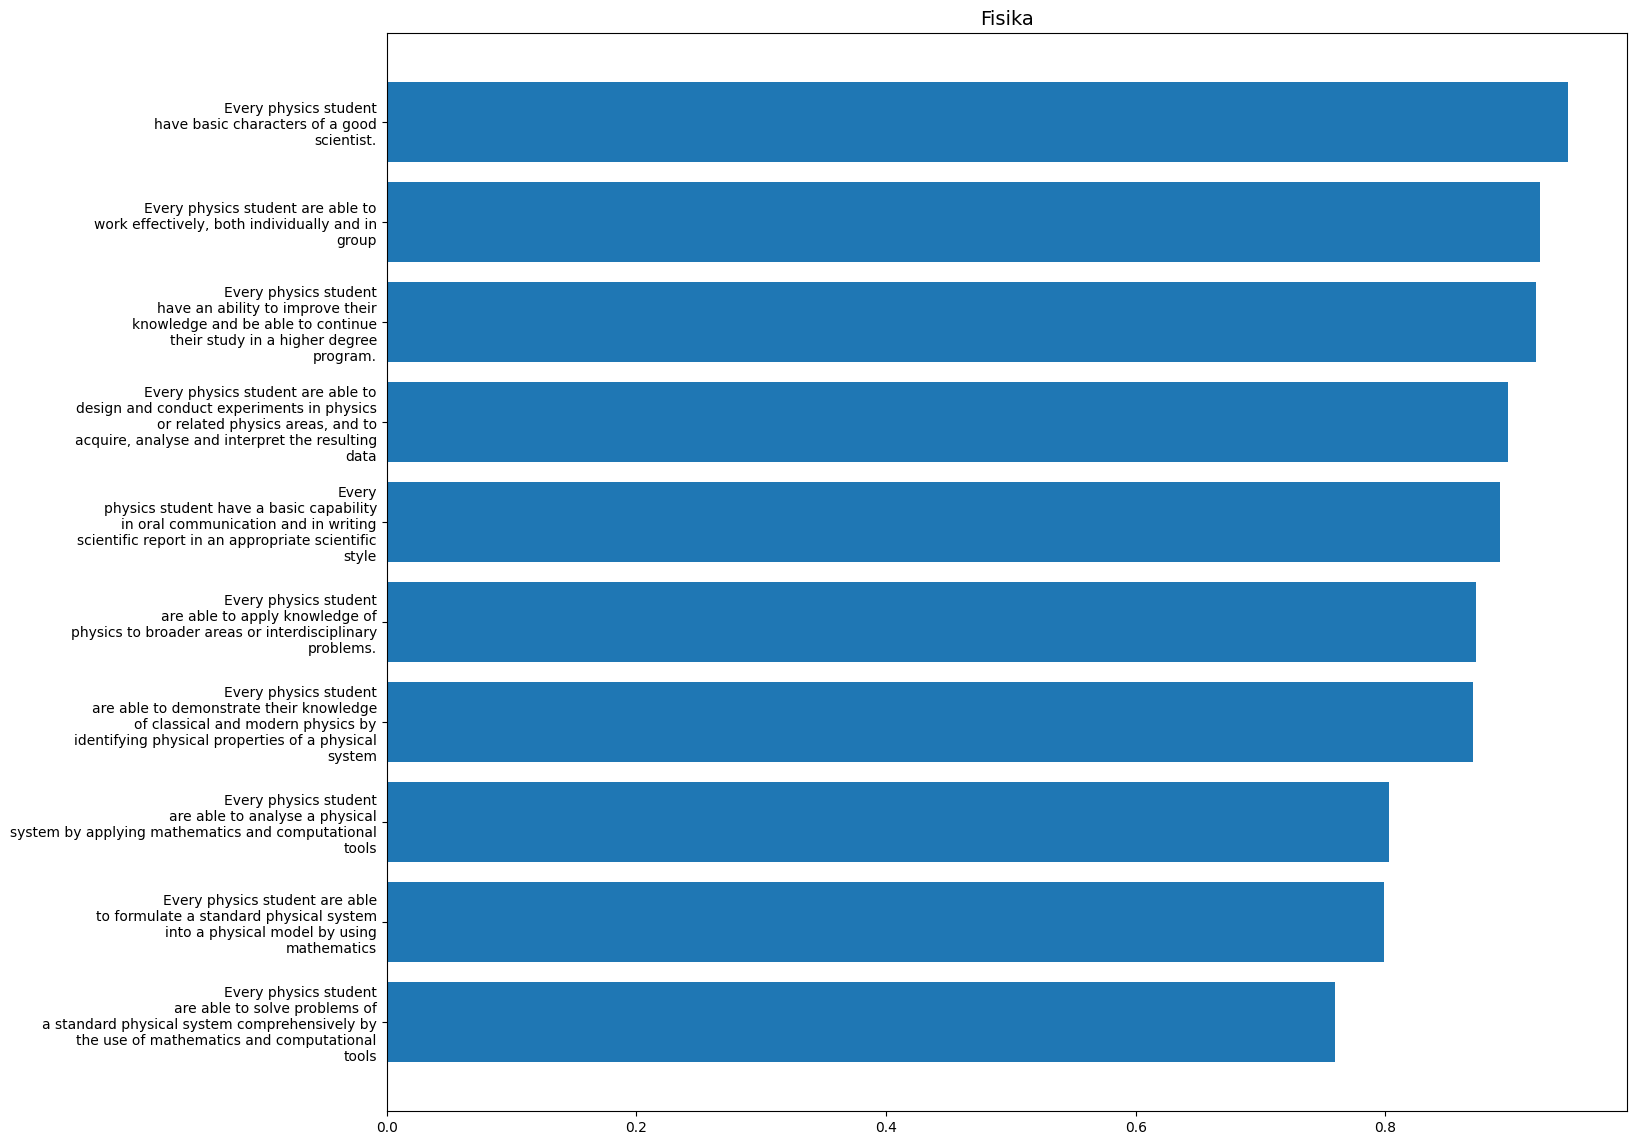

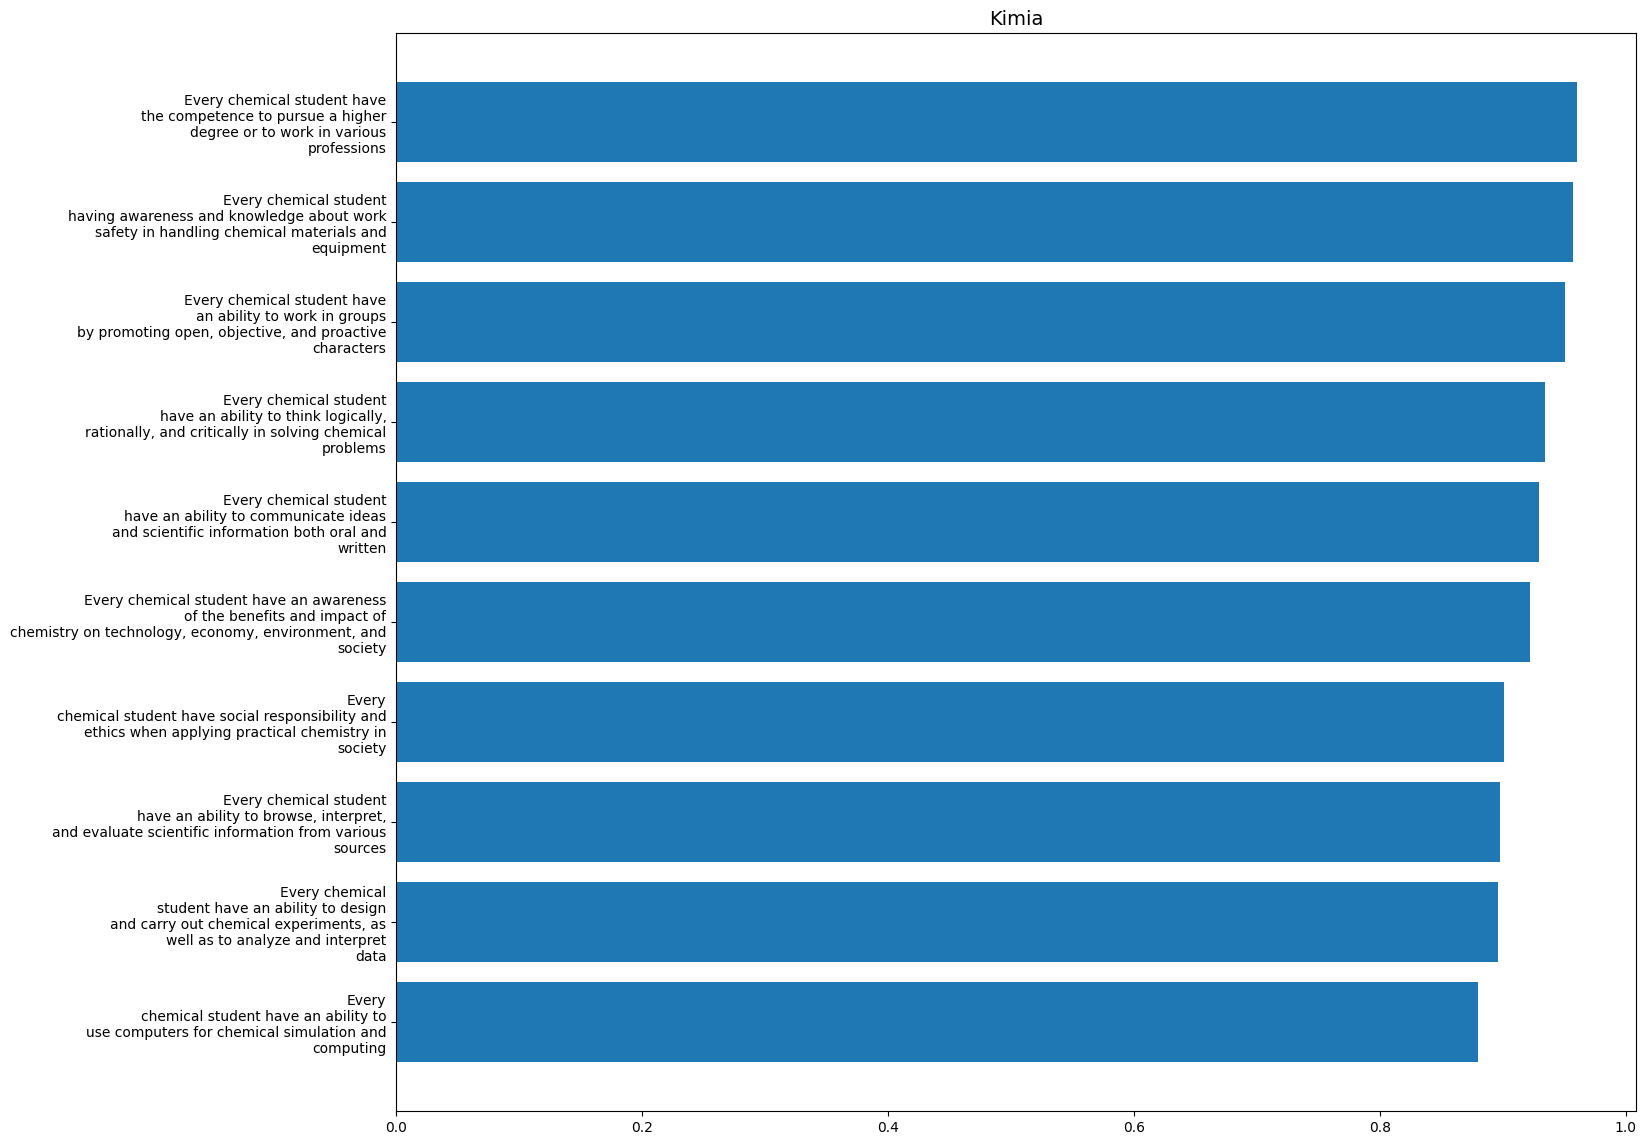

In [ ]:
show_cos_similarity("Matematika")
show_cos_similarity("Astronomi")
show_cos_similarity("Fisika")
show_cos_similarity("Kimia")

# **Data 2017**

## **Weiszfeild**

In [33]:
import urllib
import numpy as np
import re
import nltk
import pandas as pd
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [34]:
# Defining the scaling function
def scaling(p):
  p_scaling = []
  for i in p:
    x = (i-1)/(5-1)
    p_scaling.append(x)
  return p_scaling

# Defining the deleting zero function
def delo(vector):
  p = np.array(vector)
  p = np.delete(p, np.where(p == 0))
  return p

# Defining the weight function
def weight(distance):
  distance = np.array(distance)
  # Handling division by zero
  if 0 in distance:
    distance1 = delo(distance)
    dbar = min(distance1)
    idx0 = np.where(distance == 0)[0]
    for i in idx0:
      distance[i] = dbar
  # Getting weight values
  weight = [1/d for d in distance]
  return weight

# Defining Weiszfeld algorithm function
def weiszfeld(p1,T):
  error = 0.00001

  if T == 1: # Scaled
    p = p1
  else:      # Not scaled
    p = scaling(p1)

  x_bar = sum(p)/len(p)
  distance = [abs(x_bar-x) for x in p]
  weight1 = weight(distance)
  x_new = sum([x*w for x,w in zip(p,weight1)]) / sum(weight1)
  while abs(x_new-x_bar) > error:
    x_bar = x_new
    distance = [abs(x_bar-x) for x in p]
    weight1 = weight(distance)
    x_new = sum([x*w for x,w in zip(p,weight1)]) / sum(weight1)
  return x_new

# Defining function to find value of competency
# Using weisfeld algorithm
def value_competency(prodi,df):
  df = df[df['Jurusan']== prodi]

  # Using weiszfeld algorithm to get representative of value of competency
  vc = df.iloc[:,2:25].values
  vc = np.transpose(vc)

  rvc = [] # representative of value of competency using weiszfeld algorithm
  for i in range(23):
    v = weiszfeld(vc[i],0)
    rvc.append(v)
  return rvc

In [35]:
import gdown

# Load data
file_id = '1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj'
# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'
output = 'competency_all.xlsx'
gdown.download(url, output, quiet=False)

# Load the downloaded Excel file
df = pd.read_excel(output, sheet_name=str("Copy of 17"))
# https://docs.google.com/spreadsheets/d/1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj/edit?gid=456732573#gid=456732573

# Change the column name
df.columns.values[1] = 'Jurusan'
df

Downloading...
From: https://drive.google.com/uc?id=1ZayQZrql2cH2-oAezHIWZB1w9u2qK2Xj
To: d:\101 itu nomor kami\7th on 101\TRACER STUDY\competency_all.xlsx
100%|██████████| 2.18M/2.18M [00:02<00:00, 923kB/s] 


NIM        Jurusan  Memecahkan Masalah Kompleks  Berpikir Kritis  \
0     10117001     Matematika                            4                4   
1     10117003     Matematika                            4                4   
2     10117004     Matematika                            4                4   
3     10117005     Matematika                            4                4   
4     10117006     Matematika                            2                2   
...        ...            ...                          ...              ...   
3252  19217075  Kewirausahaan                            4                4   
3253  19217076  Kewirausahaan                            5                5   
3254  19217078  Kewirausahaan                            4                4   
3255  19217079  Kewirausahaan                            5                5   
3256  19217080  Kewirausahaan                            5                5   

      Inovasi dan/atau Kreatifitas  Manajemen Diri dan Orang Lain  \
0                                4                              4   
1                                4                              4   
2                                5                              5   
3                                5                              2   
4                                2                              2   
...                            ...                            ...   
3252                             4                              2   
3253                             4                              4   
3254                             4                              5   
3255                             5                              5   
3256                             5                              5   

      Bekerja Tim  Bekerja Individu  Kecerdasan emosional  \
0               4                 4                     4   
1               4                 4                     4   
2               4                 5                     4   
3               2                 4                     2   
4               2                 4                     2   
...           ...               ...                   ...   
3252            4                 4                     4   
3253            4                 5                     5   
3254            4                 5                     4   
3255            5                 5                     5   
3256            5                 5                     5   

      Penilaian dan Pengambilan Keputusan  ...  Bekerja dalam Tekanan  \
0                                       5  ...                      5   
1                                       4  ...                      4   
2                                       5  ...                      4   
3                                       5  ...                      5   
4                                       4  ...                      4   
...                                   ...  ...                    ...   
3252                                    4  ...                      4   
3253                                    5  ...                      4   
3254                                    5  ...                      4   
3255                                    4  ...                      5   
3256                                    5  ...                      5   

      Etika dan Tanggung Jawab Keprofesian  kemampuan Berkomunikasi  \
0                                        4                        4   
1                                        4                        4   
2                                        4                        4   
3                                        4                        2   
4                                        2                        1   
...                                    ...                      ...   
3252                                     4                        4   
3253                                     4             

In [36]:
listprodi = df['Jurusan'].unique()
listprodi

array(['Matematika', 'Fisika', 'Astronomi', 'Mikrobiologi', 'Kimia',
       'Biologi', 'Sains dan Teknologi Farmasi', 'Rekayasa Hayati',
       'Rekayasa Pertanian', 'Rekayasa Kehutanan',
       'Farmasi Klinik dan Komunitas', 'Teknologi Pasca Panen',
       'Teknik Geologi', 'Teknik Pertambangan', 'Teknik Perminyakan',
       'Teknik Geofisika', 'Teknik Metalurgi', 'Meteorologi',
       'Oseanografi', 'Teknik Kimia', 'Teknik Mesin', 'Teknik Elektro',
       'Teknik Fisika', 'Teknik Industri', 'Teknik Informatika',
       'Teknik Dirgantara', 'Teknik Material', 'Teknik Pangan',
       'Manajemen Rekayasa', 'Teknik Bioenergi dan Kemurgi',
       'Teknik Sipil', 'Teknik Geodesi dan Geomatika', 'Arsitektur',
       'Teknik Lingkungan', 'Perencanaan Wilayah dan Kota',
       'Teknik Kelautan', 'Rekayasa Infrastruktur Lingkungan',
       'Teknik dan Pengelolaan Sumber Daya Air', 'Seni Rupa', 'Kriya',
       'Desain Interior', 'Desain Komunikasi Visual', 'Desain Produk',
       'Teknik Tenag

In [37]:
competencies

array(['Memecahkan Masalah Kompleks', 'Berpikir Kritis',
       'Inovasi dan/atau Kreatifitas', 'Manajemen Diri dan Orang Lain',
       'Bekerja Tim', 'Bekerja Individu', 'Kecerdasan emosional',
       'Penilaian dan Pengambilan Keputusan', 'Negosiasi',
       'Kecerdasan dalam Bertindak', 'Kemampuan Belajar Sepanjang Hayat',
       'Adaptasi dengan Lingkungan',
       'Kejujuran, Loyalitas dan Integritas', 'Bekerja dalam Tekanan',
       'Etika dan Tanggung Jawab Keprofesian', 'kemampuan Berkomunikasi',
       'Pengetahuan dan Penerapan Bidang/ Disiplin Ilmu',
       'Pengetahuan di luar Bidang/ Disiplin Ilmu',
       'Kemampuan analisis dan Interpretasi Data',
       'Kemampuan Administrasi, menuliskan laporan/ Dokumen/ Hasil Penelitian atau Pekerjaan',
       'Kemampuan Menggunakan Teknologi Informasi',
       'Merancang dan/atau mendesain suatu komponen, sistem atau proses',
       'Kemampuan Bahasa Asing'], dtype=object)

In [38]:
import itertools

# Membuat kombinasi Cartesian antara program studi dan kompetensi
combinations = list(itertools.product(listprodi, competencies))

# Membuat dataframe
all = pd.DataFrame(combinations, columns=['Jurusan', 'Competencies'])

all['Weiszfeild'] = ''

for prodi in listprodi:
  all.loc[all['Jurusan'] == prodi, 'Weiszfeild'] = value_competency(prodi, df)
all

Jurusan                                       Competencies  \
0        Matematika                        Memecahkan Masalah Kompleks   
1        Matematika                                    Berpikir Kritis   
2        Matematika                       Inovasi dan/atau Kreatifitas   
3        Matematika                      Manajemen Diri dan Orang Lain   
4        Matematika                                        Bekerja Tim   
...             ...                                                ...   
1122  Kewirausahaan           Kemampuan analisis dan Interpretasi Data   
1123  Kewirausahaan  Kemampuan Administrasi, menuliskan laporan/ Do...   
1124  Kewirausahaan          Kemampuan Menggunakan Teknologi Informasi   
1125  Kewirausahaan  Merancang dan/atau mendesain suatu komponen, s...   
1126  Kewirausahaan                             Kemampuan Bahasa Asing   

     Weiszfeild  
0          0.75  
1          0.75  
2      0.750046  
3      0.749999  
4          0.75  
...         ...  
1122    0.75001  
1123    0.75005  
1124   0.999945  
1125   0.750019  
1126   0.750011  

[1127 rows x 3 columns]

In [39]:
merged_df = pd.merge(data, all, on=['Jurusan', 'Competencies'], how='inner')
merged_df

Unnamed: 0 Fakultas             Jurusan  \
0               0     SITH        Mikrobiologi   
1               1     SITH        Mikrobiologi   
2               2     SITH        Mikrobiologi   
3               3     SITH        Mikrobiologi   
4               4     SITH        Mikrobiologi   
...           ...      ...                 ...   
10322       10460      FTI  Manajemen Rekayasa   
10323       10461      FTI  Manajemen Rekayasa   
10324       10462      FTI  Manajemen Rekayasa   
10325       10463      FTI  Manajemen Rekayasa   
10326       10464      FTI  Manajemen Rekayasa   

                                            Competencies  \
0                            Memecahkan Masalah Kompleks   
1                                        Berpikir Kritis   
2                           Inovasi dan/atau Kreatifitas   
3                          Manajemen Diri dan Orang Lain   
4                                            Bekerja Tim   
...                                                  ...   
10322           Kemampuan analisis dan Interpretasi Data   
10323  Kemampuan Administrasi, menuliskan laporan/ Do...   
10324          Kemampuan Menggunakan Teknologi Informasi   
10325  Merancang dan/atau mendesain suatu komponen, s...   
10326                             Kemampuan Bahasa Asing   

                                                      LO    dist  \
0      Every microbiology student have an ability to ...  0.2286   
1      Every microbiology student have an ability to ...  0.1659   
2      Every microbiology student have an ability to ...  0.0593   
3      Every microbiology student have an ability to ...  0.1186   
4      Every microbiology student have an ability to ...  0.1447   
...                                                  ...     ...   
10322  Every industrial engineering management studen...  0.2717   
10323  Every industrial engineering management studen...  0.2267   
10324  Every industrial engineering management studen...  0.2404   
10325  Every industrial engineering management studen...  0.1527   
10326  Every industrial engineering management studen...  0.1309   

       normalized_dist Weiszfeild  
0               0.0758   0.750003  
1               0.0550   0.750011  
2               0.0197   0.750005  
3               0.0393       0.75  
4               0.0480   0.999856  
...                ...        ...  
10322           0.0596   0.749994  
10323           0.0497   0.750001  
10324           0.0527   0.750009  
10325           0.0335       0.75  
10326           0.0287   0.750003  

[10327 rows x 8 columns]

In [40]:
translate = {}
# https://docs.google.com/spreadsheets/d/1SlzxU-xPxfU5-sMbJpogpQEmXb4ntX-gi4kqCAcqh0o/edit?gid=0#gid=0
data_translate = pd.read_csv("https://docs.google.com/spreadsheets/d/1SlzxU-xPxfU5-sMbJpogpQEmXb4ntX-gi4kqCAcqh0o/export?format=csv&gid=0")
for i in range(len(data_translate)):
  row = data_translate.iloc[i]
  translate[row["Inggris"]] = row["Indo"]

In [41]:
def cos_similarity(jurusan):
  selected = merged_df[merged_df["Jurusan"]==jurusan]
  score = {}
  for LO in selected['LO']:
    selected_LO = selected[selected["LO"]==LO]
    dot = np.dot(selected_LO['dist'],selected_LO['Weiszfeild'])
    norm_dist = np.dot(selected_LO['dist'],selected_LO['dist'])
    norm_weisz = np.dot(selected_LO['Weiszfeild'],selected_LO['Weiszfeild'])
    cos = dot/((norm_dist*norm_weisz)**0.5)
    score[translate[LO]] = cos
  return score

In [42]:
cos_similarity('Matematika')

{'Lulusan memiliki pengetahuan dan wawasan yang memadai tentang matematika dan bidang ilmu lainnya yang relevan, dengan pemahaman yang relatif mendalam dalam sub-bidang matematika tertentu serta mampu menerapkannya dalam penyelesaian masalah.': 0.8473164038751103,
 'Lulusan memiliki keterampilan dasar matematika yang memadai, seperti mengamati, mengenali, mengoleksi dan memanfaatkan data,serta menghitung, mengestimasi, menginterpretasi, dan keterampilan teknis baku lainnya yang terkait dengan tiap matakuliah, baik dengan maupun tanpa bantuan teknologi pendukung (seperti komputer dan piranti lunak).': 0.8106947991058119,
 'Lulusan memiliki daya matematika yang memadai, yang mencakup kemampuan bernalar, membuat kaitan, memecahkan masalah dan berkomunikasi.': 0.8675802453616716,
 'Lulusan mampu melaksanakan dan menyelesaian suatu pekerjaan/tugas serta mengembangkan sesuatu yang relatif baru, baik secara mandiri maupun dalam tim/kelompok matematikawan maupun lintas keahlian, termasuk membu

In [43]:
results = []
for jurusan in listprodi:
    cos_scores = cos_similarity(jurusan)
    # Append results to list with format [(jurusan, LO, cos_score)]
    for LO, score in cos_scores.items():
        results.append((jurusan, LO, score))

database = pd.DataFrame(results, columns=['Jurusan', 'LO', 'Cosine Similarity'])
database

Jurusan                                                 LO  \
0       Matematika  Lulusan memiliki pengetahuan dan wawasan yang ...   
1       Matematika  Lulusan memiliki keterampilan dasar matematika...   
2       Matematika  Lulusan memiliki daya matematika yang memadai,...   
3       Matematika  Lulusan mampu melaksanakan dan menyelesaian su...   
4       Matematika  Lulusan memiliki perilaku belajar, etos kerja,...   
..             ...                                                ...   
444  Kewirausahaan  Every entrepreneurship student Have the abilit...   
445  Kewirausahaan  Every entrepreneurship student Have an underst...   
446  Kewirausahaan  Every entrepreneurship student Able to have in...   
447  Kewirausahaan  Every entrepreneurship student Able to develop...   
448  Kewirausahaan  Every entrepreneurship student Able to analyze...   

     Cosine Similarity  
0             0.847316  
1             0.810695  
2             0.867580  
3             0.892212  
4             0.892236  
..                 ...  
444           0.906961  
445           0.893957  
446           0.915665  
447           0.883782  
448           0.881693  

[449 rows x 3 columns]

In [44]:
database.to_csv('2017-tr.csv')

In [34]:
def show_cos_similarity(jurusan):
  datagacor = database[database['Jurusan'] == jurusan].sort_values('Cosine Similarity',ascending=True)
  los = list(datagacor['LO'])
  css = list(datagacor['Cosine Similarity'])
  los2 = []
  for idx,lo in enumerate(los):
    k = len(lo)
    spaces = []
    for i in range(k):
      if lo[i] == " ":
        spaces.append(i)

    for i in range(len(spaces)-1,-1,-6):
      lo = lo[:spaces[i]] + "\n" + lo[spaces[i]+1:]
    los2.append(lo)

  plt.figure(figsize=[16,14])

  plt.barh(los2,css)
  plt.title(jurusan, fontsize=14) # Adjust fontsize as needed
  # TODO rapihin
  # Show the plot
  plt.show()

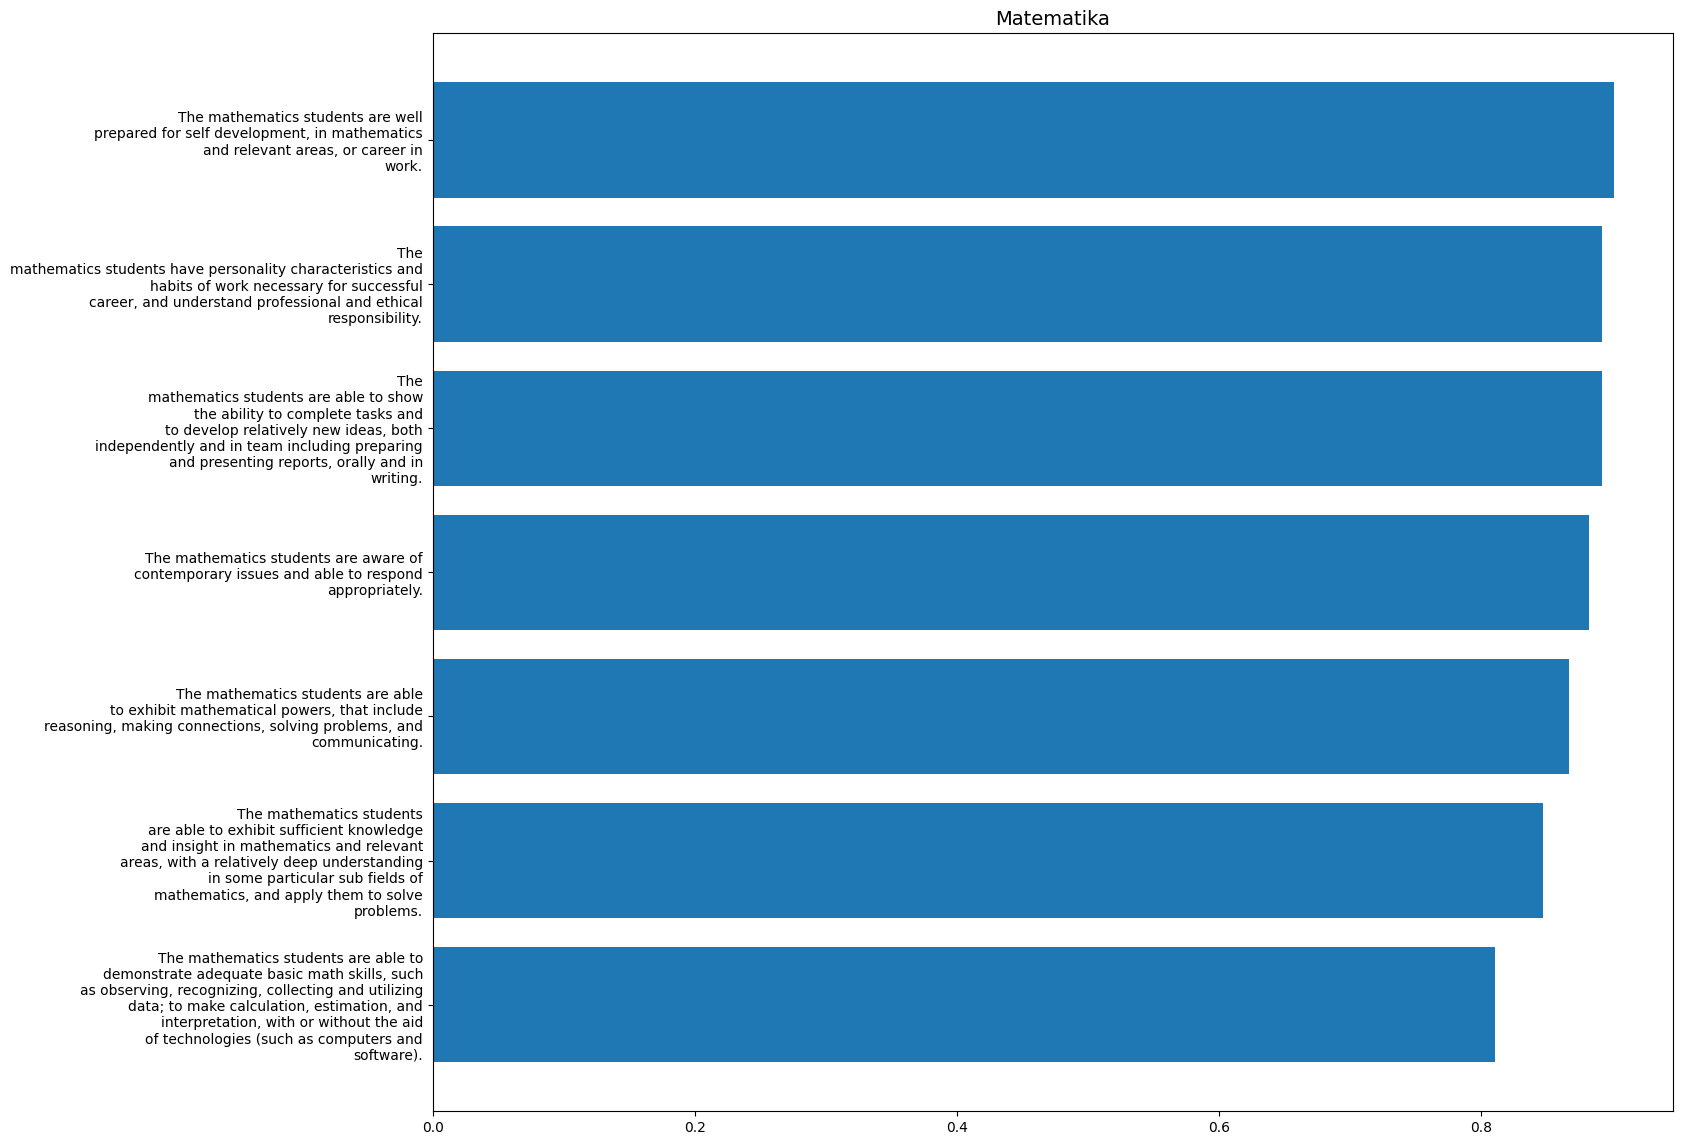

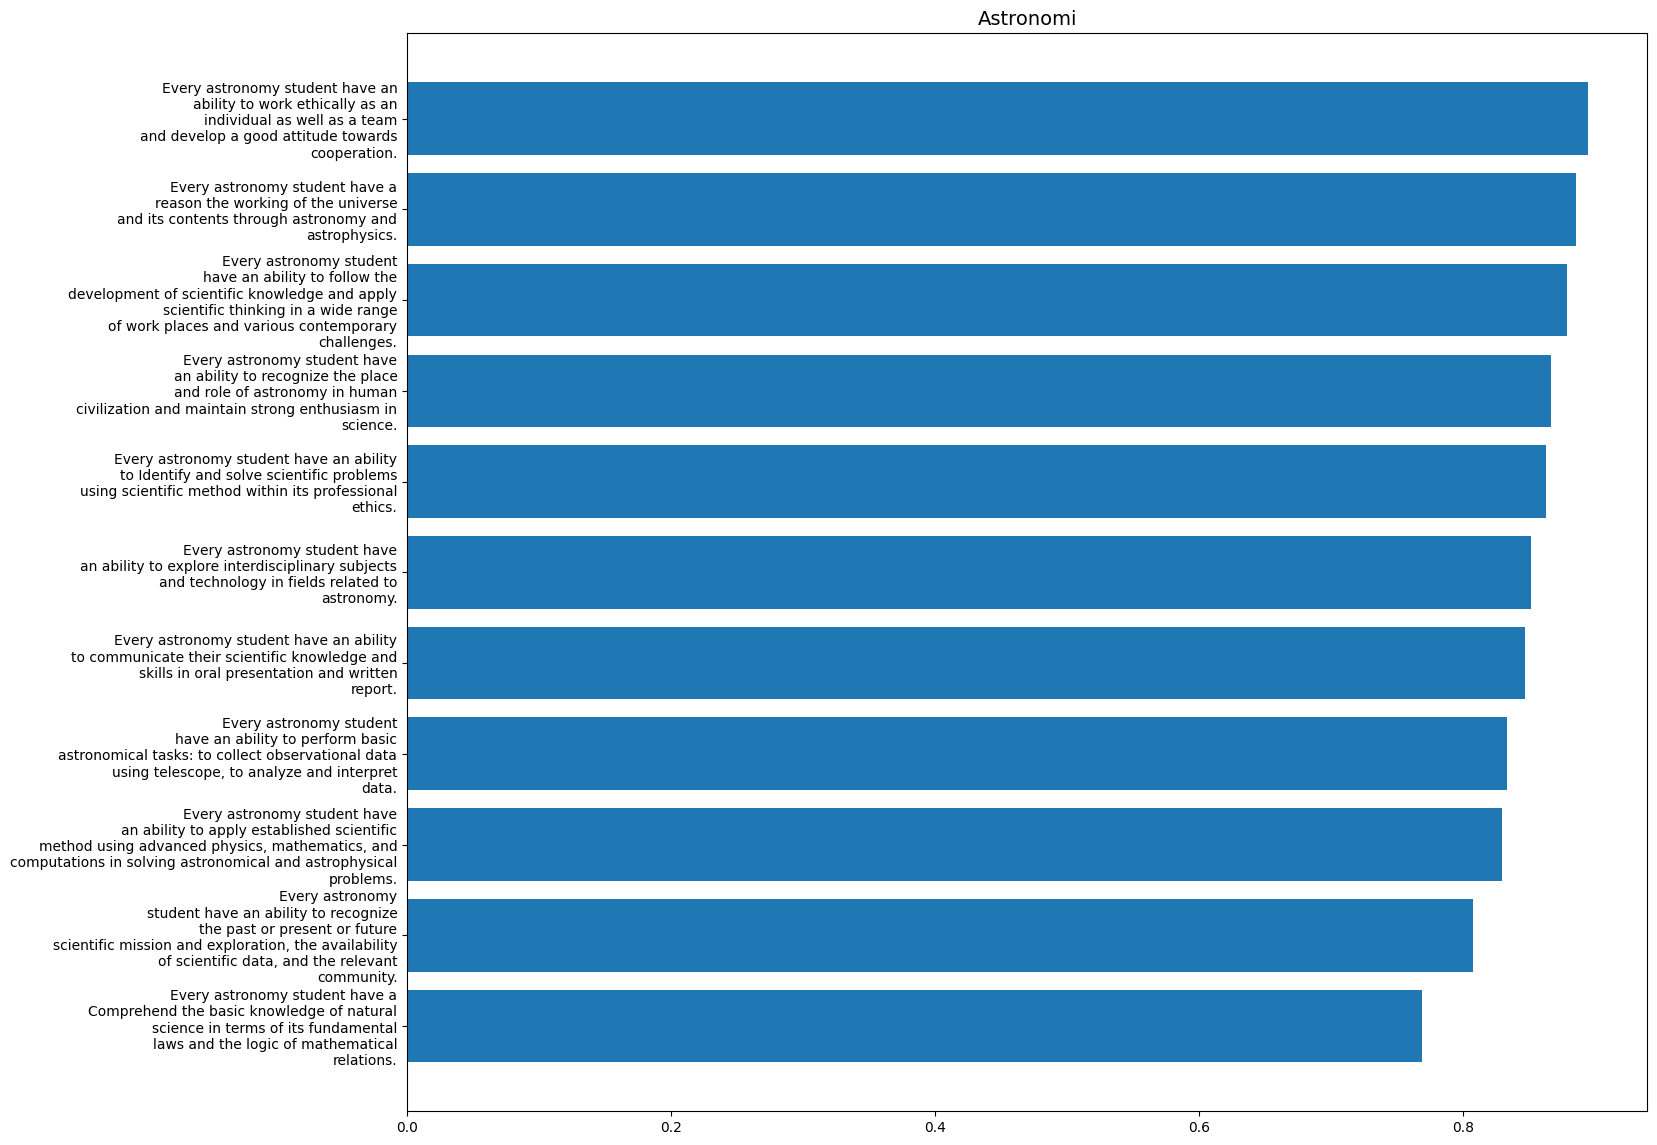

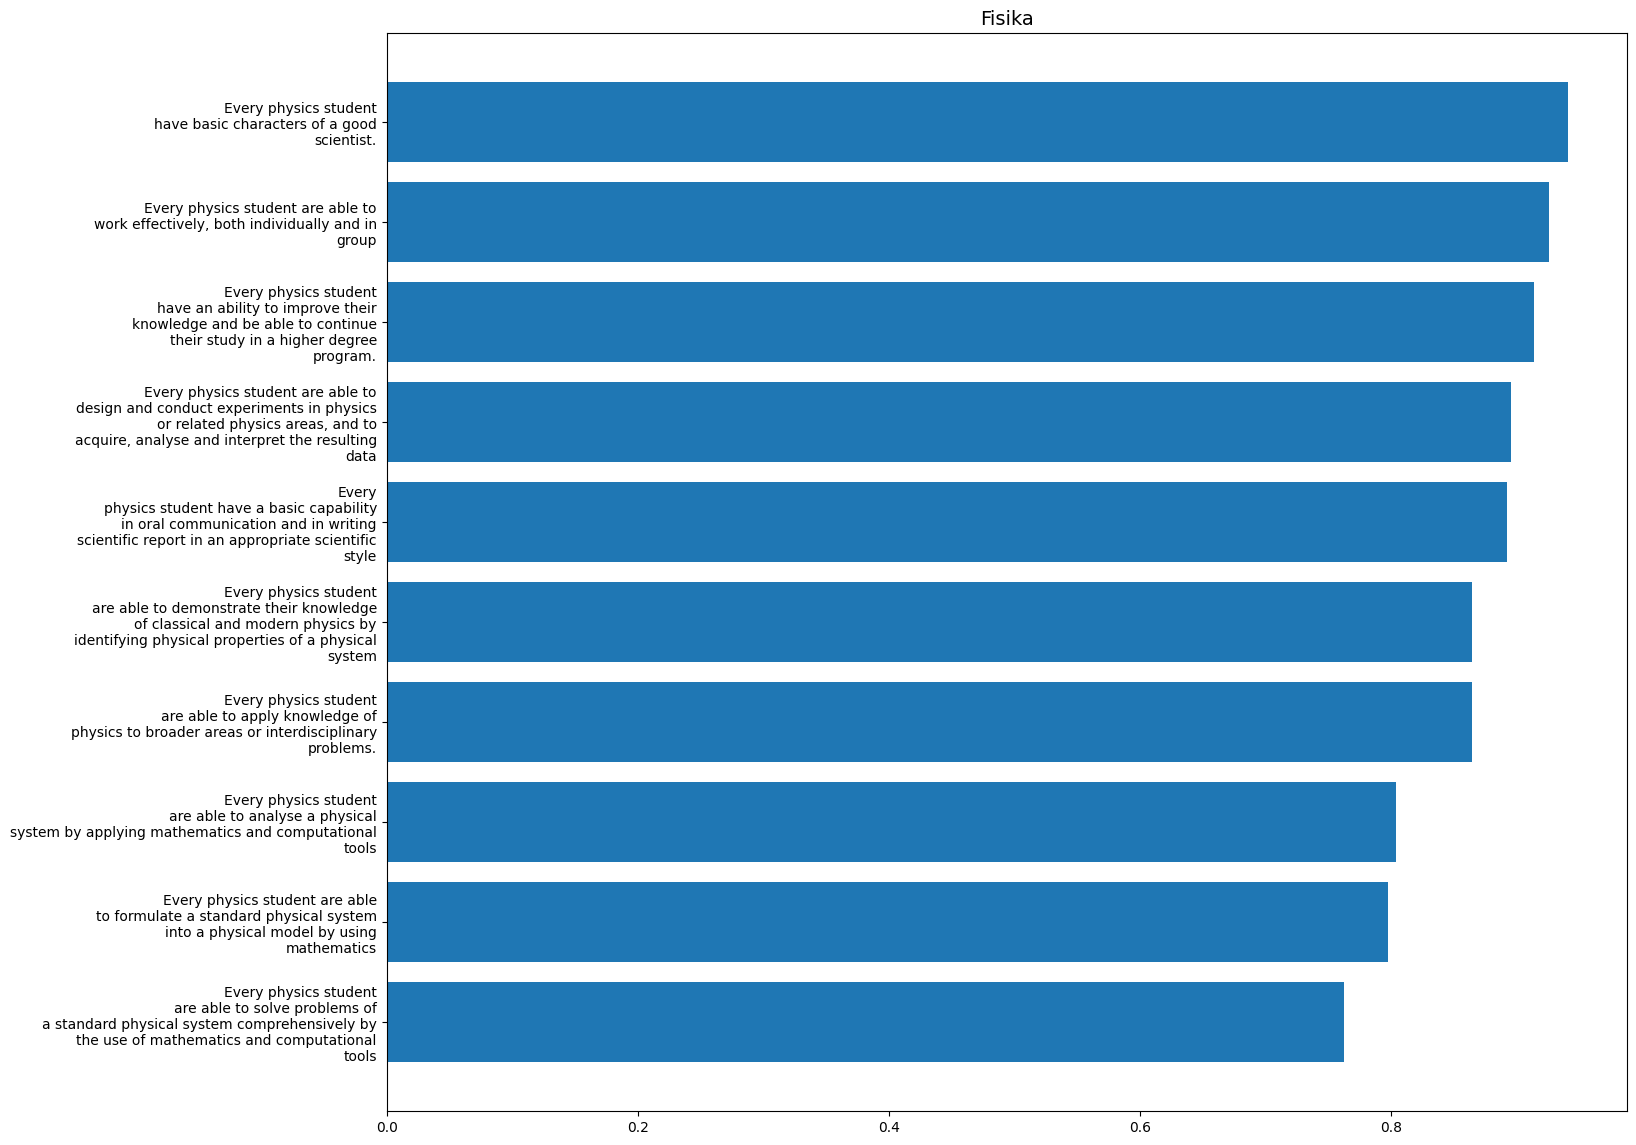

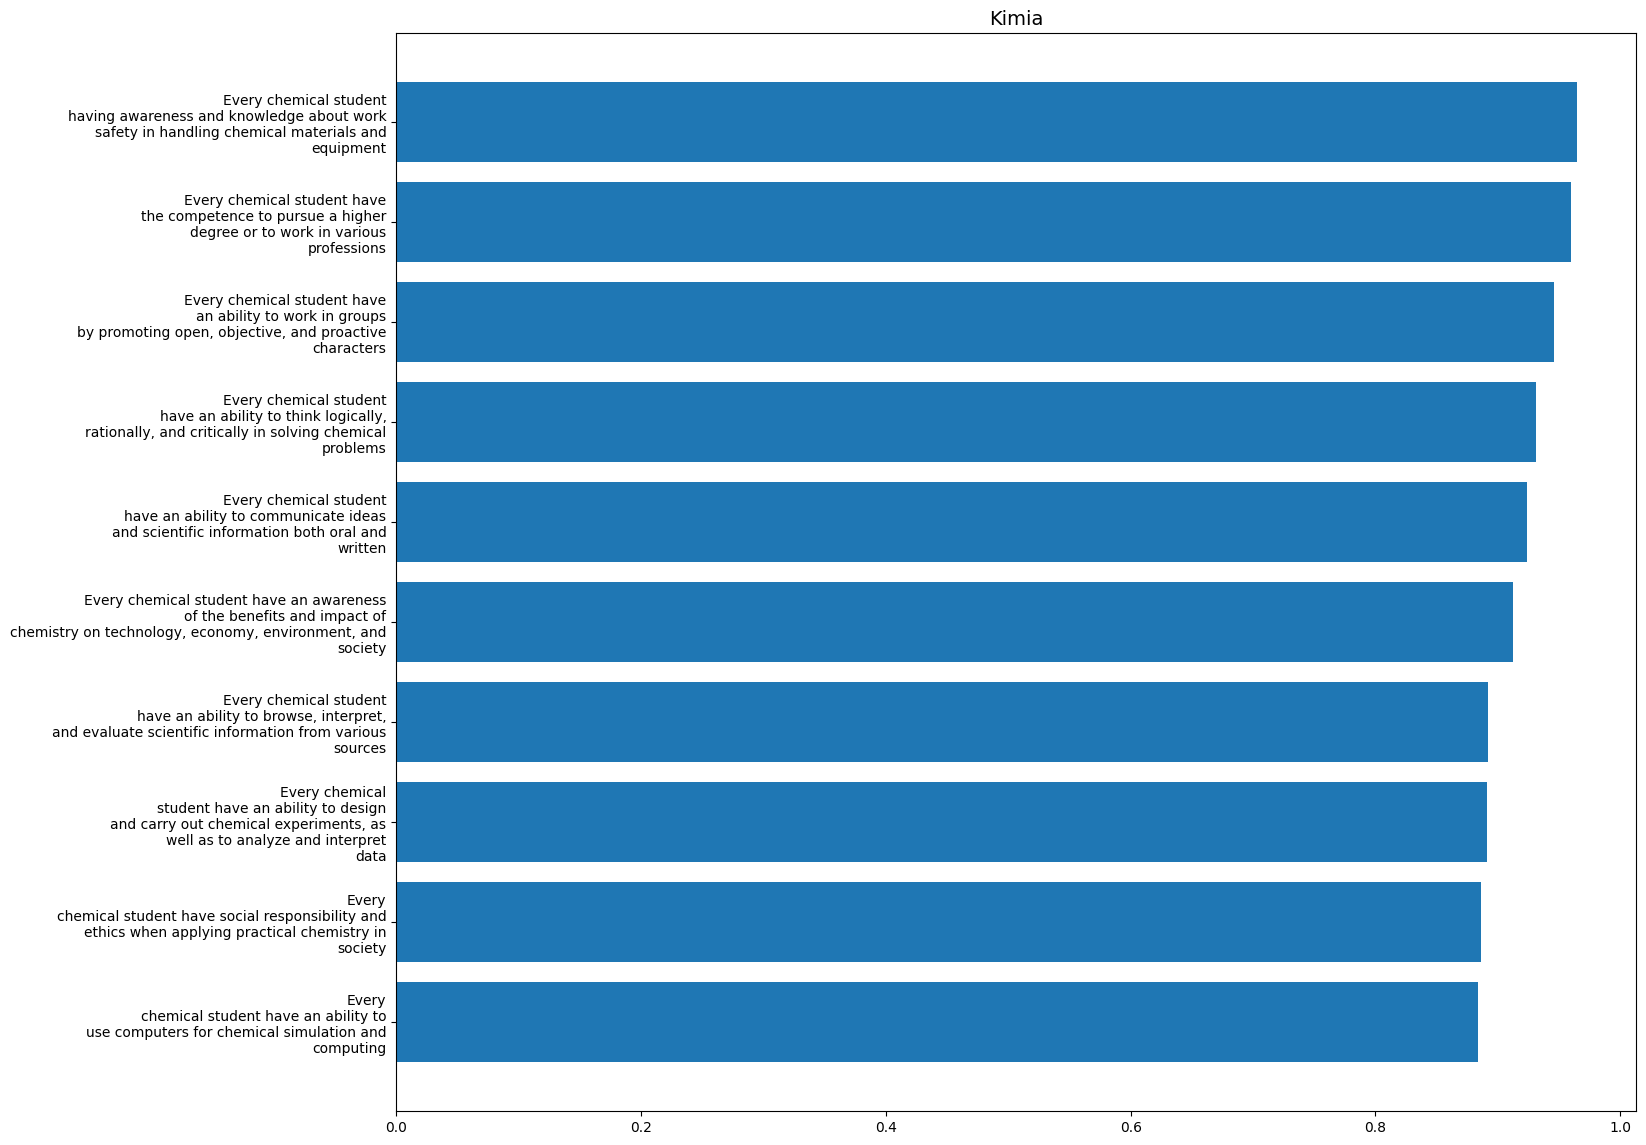

In [35]:
show_cos_similarity("Matematika")
show_cos_similarity("Astronomi")
show_cos_similarity("Fisika")
show_cos_similarity("Kimia")